<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/TEST_2451-2500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4565]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [4566]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

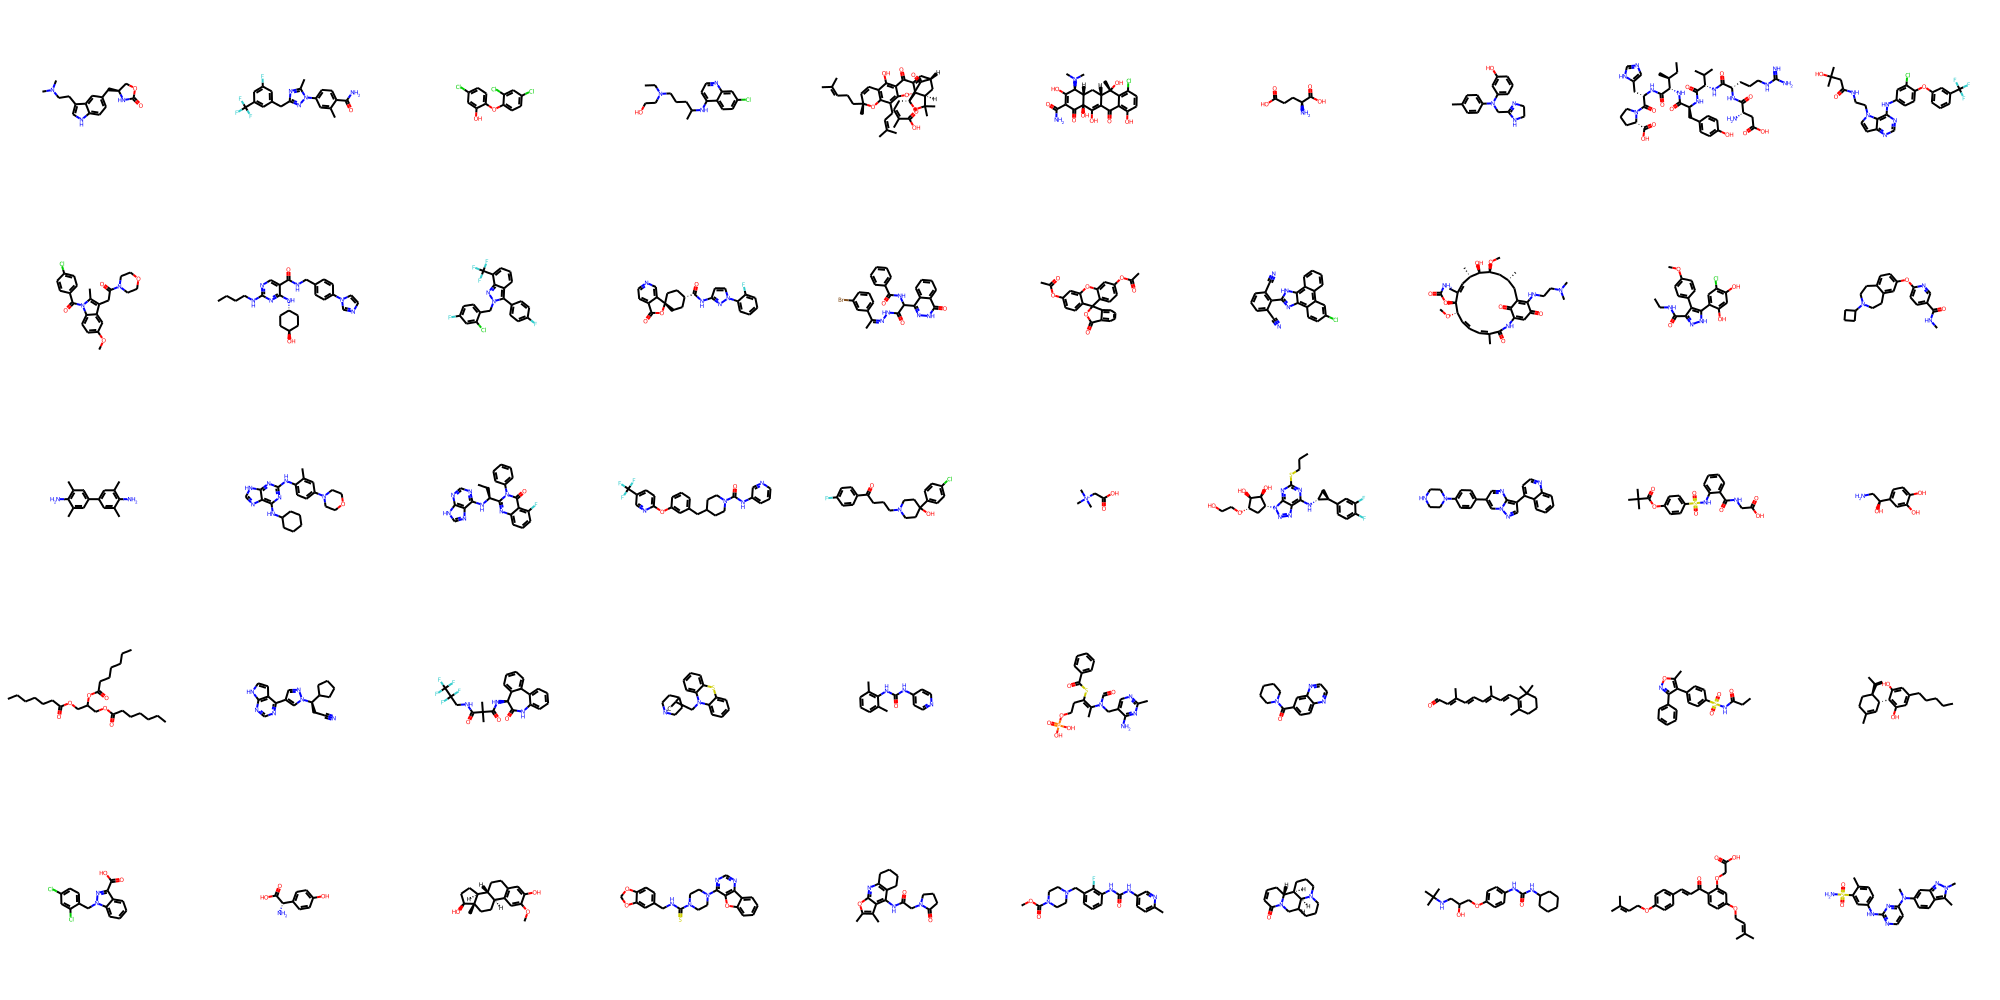

In [4567]:
smiles_list = [

'CN(C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12',
'Cc1cc(-n2nc(Cc3cc(F)cc(C(F)(F)F)c3)nc2C)ccc1C(N)=O',
'Oc1cc(Cl)ccc1Oc1ccc(Cl)cc1Cl',
'CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12',
'CC(C)=CCC[C@]1(C)C=Cc2c(O)c3c(c(CC=C(C)C)c2O1)O[C@]12C(=C[C@@H]4C[C@H]1C(C)(C)O[C@@]2(C/C=C(/C)C(=O)O)C4=O)C3=O',
'CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3C(=O)c4c(O)ccc(Cl)c4[C@@](C)(O)[C@H]3C[C@@H]12',
'N[C@@H](CCC(=O)O)C(=O)O',
'Cc1ccc(N(CC2=NCCN2)c2cccc(O)c2)cc1',
'CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H](N)CC(=O)O)C(C)C)C(=O)N[C@@H](Cc1cnc[nH]1)C(=O)N1CCC[C@H]1C(=O)O',
'CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(F)F)c4)c(Cl)c3)c21',
'COc1ccc2c(c1)c(CC(=O)N1CCOCC1)c(C)n2C(=O)c1ccc(Cl)cc1',
'CCCCNc1ncc(C(=O)NCc2ccc(-n3ccnc3)cc2)c(N[C@H]2CC[C@H](O)CC2)n1',
'Fc1ccc(-c2c3cccc(C(F)(F)F)c3nn2Cc2ccc(F)cc2Cl)cc1',
'O=C1O[C@]2(CC[C@@H](C(=O)Nc3ccn(-c4ccccc4F)n3)CC2)c2cnccc21',
'C/C(=NNC(=O)C(NC(=O)c1ccccc1)c1n[nH]c(=O)c2ccccc12)c1cccc(Br)c1',
'CC(=O)Oc1ccc2c(c1)Oc1cc(OC(C)=O)ccc1C21OC(=O)c2ccccc21',
'N#Cc1cccc(C#N)c1-c1nc2c3ccc(Cl)cc3c3ccccc3c2[nH]1',
'CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)=C(C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C=C(\C)[C@@H]1OC(N)=O)C2=O',
'CCNC(=O)c1n[nH]c(-c2cc(Cl)c(O)cc2O)c1-c1ccc(OC)cc1',
'CNC(=O)c1ccc(Oc2ccc3c(c2)CCN(C2CCC2)CC3)nc1',
'Cc1cc(-c2cc(C)c(N)c(C)c2)cc(C)c1N',
'Cc1cc(N2CCOCC2)ccc1Nc1nc(NC2CCCCC2)c2nc[nH]c2n1',
'CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n1-c1ccccc1',
'O=C(Nc1cccnc1)N1CCC(Cc2cccc(Oc3ccc(C(F)(F)F)cn3)c2)CC1',
'O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1',
'C[N+](C)(C)CC(=O)O',
'CCCSc1nc(N[C@@H]2C[C@H]2c2ccc(F)c(F)c2)c2nnn([C@@H]3C[C@H](OCCO)[C@@H](O)[C@H]3O)c2n1',
'c1ccc2c(-c3cnn4cc(-c5ccc(N6CCNCC6)cc5)cnc34)ccnc2c1',
'CC(C)(C)C(=O)Oc1ccc(S(=O)(=O)Nc2ccccc2C(=O)NCC(=O)O)cc1',
'NC[C@H](O)c1ccc(O)c(O)c1',
'CCCCCCC(=O)OCC(COC(=O)CCCCCC)OC(=O)CCCCCC',
'N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1',
'CC(C)(C(=O)NCC(F)(F)C(F)(F)F)C(=O)N[C@@H]1C(=O)Nc2ccccc2-c2ccccc21',
'c1ccc2c(c1)Sc1ccccc1N2CC1CN2CCC1CC2',
'Cc1cccc(C)c1NC(=O)Nc1ccncc1',
'C/C(=C(\CCOP(=O)(O)O)SC(=O)c1ccccc1)N(C=O)Cc1cnc(C)nc1N',
'O=C(c1ccc2nccnc2c1)N1CCCCC1',
'CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=O)C(C)(C)CCC1',
'CCC(=O)NS(=O)(=O)c1ccc(-c2c(-c3ccccc3)noc2C)cc1',
'C=C(C)[C@@H]1CCC(C)=C[C@H]1c1c(O)cc(CCCCC)cc1O',
'O=C(O)c1nn(Cc2ccc(Cl)cc2Cl)c2ccccc12',
'N[C@H](C(=O)O)c1ccc(O)cc1',
'COc1cc2c(cc1O)CC[C@@H]1[C@@H]2CC[C@]2(C)[C@@H](O)CC[C@@H]12',
'S=C(NCc1ccc2c(c1)OCO2)N1CCN(c2ncnc3c2oc2ccccc23)CC1',
'Cc1oc2nc3c(c(NC(=O)CN4CCCC4=O)c2c1C)CCCC3',
'COC(=O)N1CCN(Cc2cccc(NC(=O)Nc3ccc(C)nc3)c2F)CC1',
'O=C1C=CC[C@@H]2[C@H]3CCCN4CCC[C@@H](CN12)[C@@H]34',
'CC(C)(C)NCC(O)COc1ccc(NC(=O)NC2CCCCC2)cc1',
'CC(C)=CCOc1ccc(/C=C/C(=O)c2ccc(OCC=C(C)C)cc2OCC(=O)O)cc1',
'Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



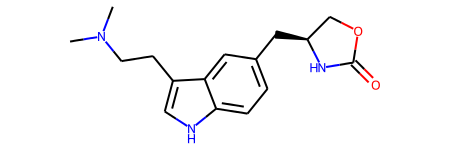

In [4568]:
M1 = mol_list [0]
M1

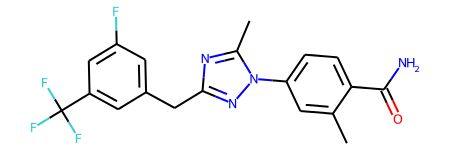

In [4569]:
M2 = mol_list [1]
M2

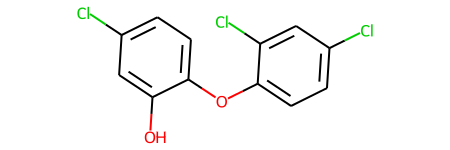

In [4570]:
M3 = mol_list [2]
M3

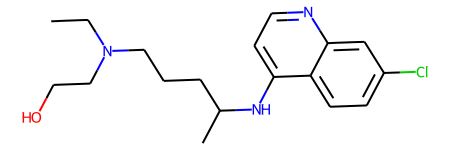

In [4571]:
M4 = mol_list [3]
M4

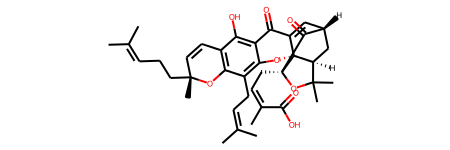

In [4572]:
M5 = mol_list [4]
M5

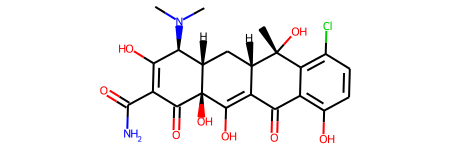

In [4573]:
M6 = mol_list [5]
M6

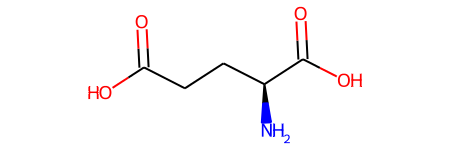

In [4574]:
M7 = mol_list [6]
M7

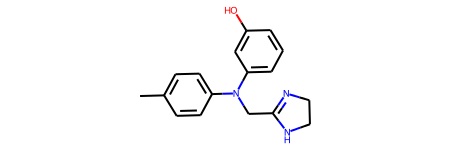

In [4575]:
M8 = mol_list [7]
M8

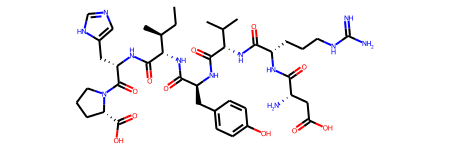

In [4576]:
M9 = mol_list [8]
M9

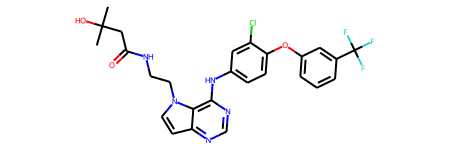

In [4577]:
M10 = mol_list [9]
M10

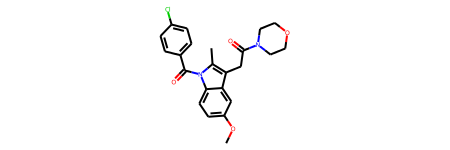

In [4578]:
M11 = mol_list [10]
M11

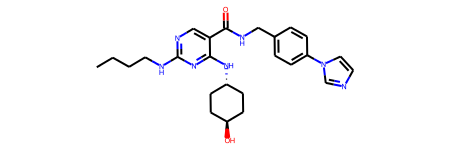

In [4579]:
M12 = mol_list [11]
M12

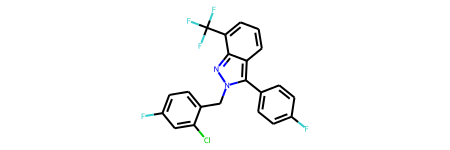

In [4580]:
M13 = mol_list [12]
M13

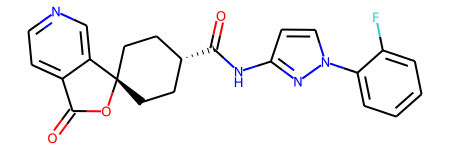

In [4581]:
M14 = mol_list [13]
M14

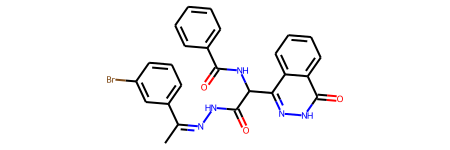

In [4582]:
M15 = mol_list [14]
M15

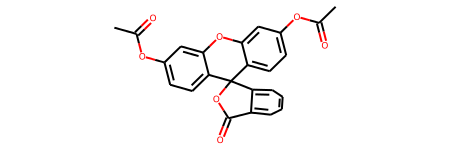

In [4583]:
M16 = mol_list [15]
M16

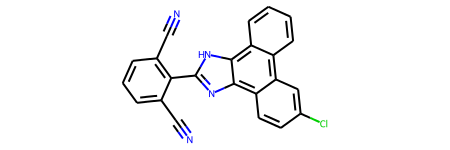

In [4584]:
M17 = mol_list [16]
M17

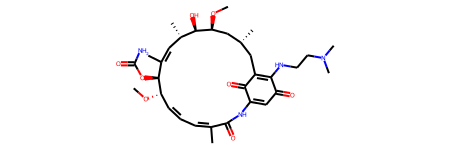

In [4585]:
M18 = mol_list [17]
M18

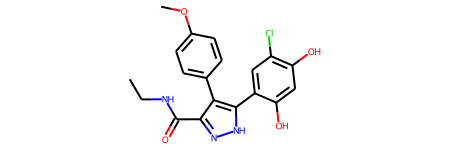

In [4586]:
M19 = mol_list [18]
M19

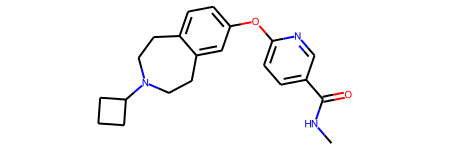

In [4587]:
M20 = mol_list [19]
M20

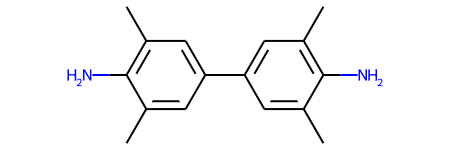

In [4588]:
M21 = mol_list [20]
M21

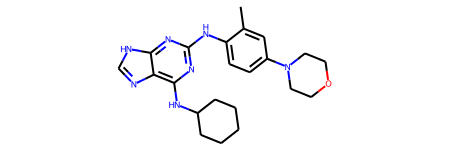

In [4589]:
M22 = mol_list [21]
M22

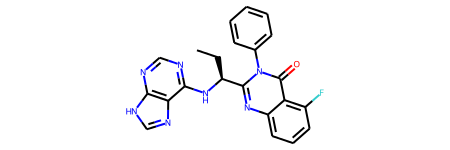

In [4590]:
M23 = mol_list [22]
M23

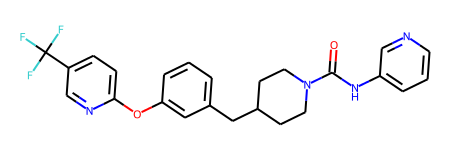

In [4591]:
M24 = mol_list [23]
M24

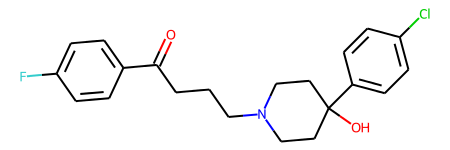

In [4592]:
M25 = mol_list [24]
M25

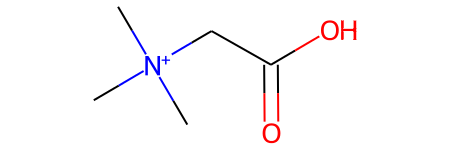

In [4593]:
M26 = mol_list [25]
M26

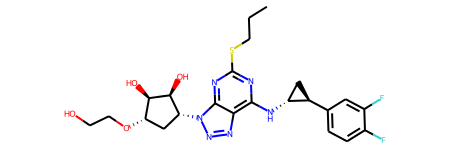

In [4594]:
M27 = mol_list [26]
M27

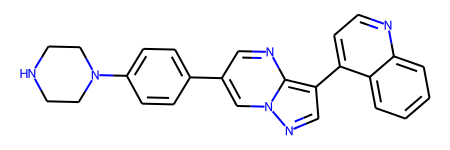

In [4595]:
M28 = mol_list [27]
M28

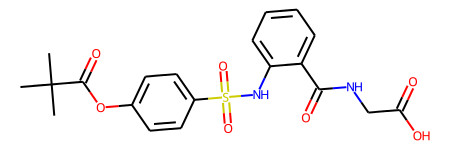

In [4596]:
M29 = mol_list [28]
M29

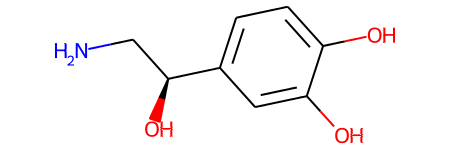

In [4597]:
M30 = mol_list [29]
M30

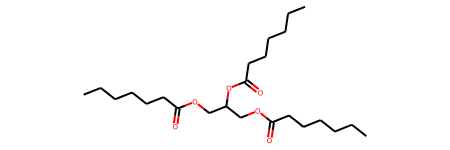

In [4598]:
M31 = mol_list [30]
M31

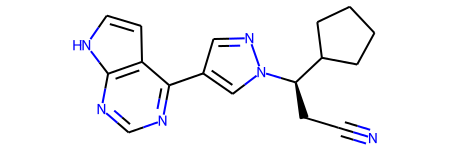

In [4599]:
M32 = mol_list [31]
M32

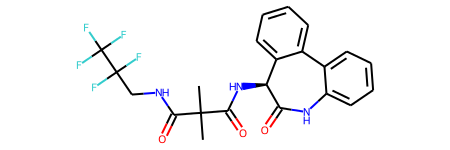

In [4600]:
M33 = mol_list [32]
M33

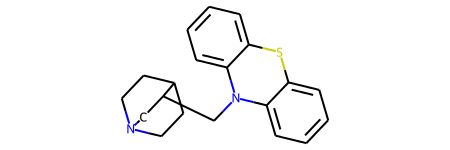

In [4601]:
M34 = mol_list [33]
M34

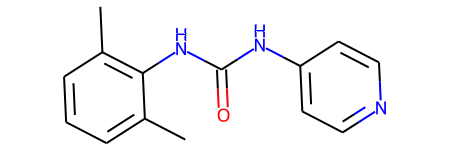

In [4602]:
M35 = mol_list [34]
M35

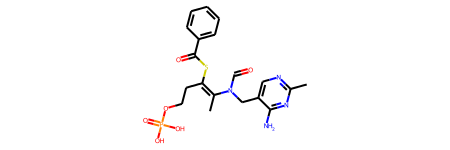

In [4603]:
M36 = mol_list [35]
M36

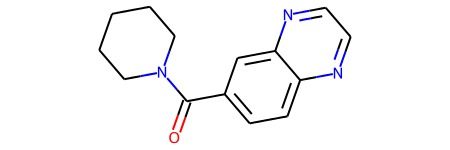

In [4604]:
M37= mol_list [36]
M37

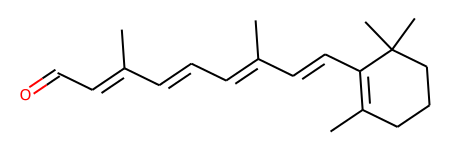

In [4605]:
M38= mol_list [37]
M38

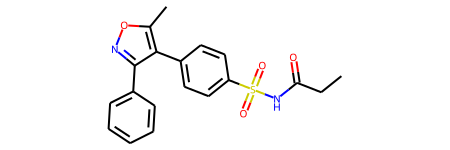

In [4606]:
M39= mol_list [38]
M39

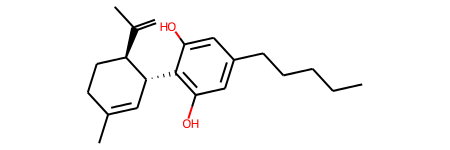

In [4607]:
M40= mol_list [39]
M40

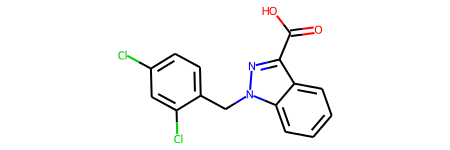

In [4608]:
M41= mol_list [40]
M41

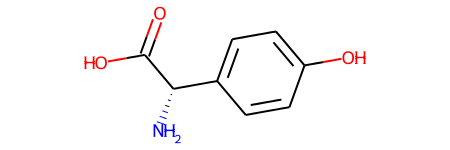

In [4609]:
M42= mol_list [41]
M42

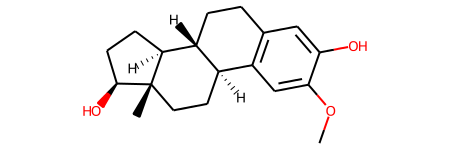

In [4610]:
M43= mol_list [42]
M43

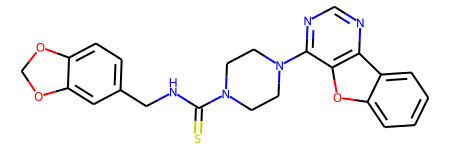

In [4611]:
M44= mol_list [43]
M44

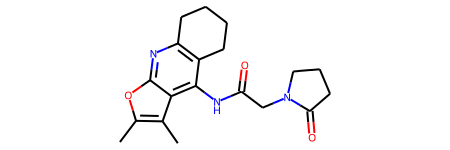

In [4612]:
M45= mol_list [44]
M45

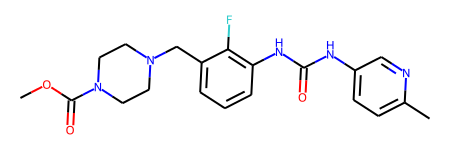

In [4613]:
M46= mol_list [45]
M46

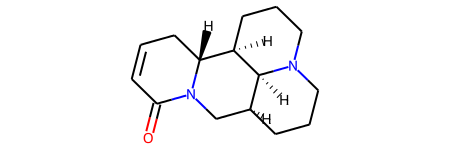

In [4614]:
M47= mol_list [46]
M47

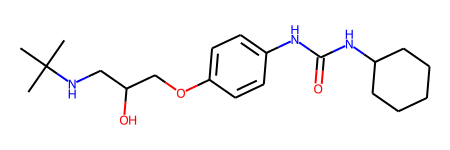

In [4615]:
M48= mol_list [47]
M48

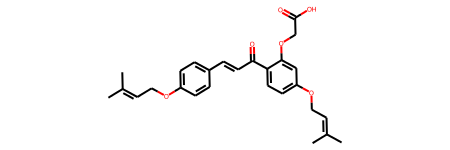

In [4616]:
M49= mol_list [48]
M49

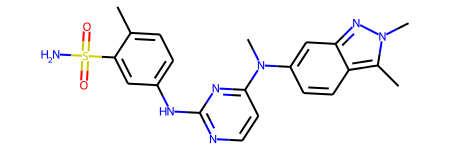

In [4617]:
M50= mol_list [49]
M50

In [4618]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 80,
 90,
 119,
 139,
 213,
 219,
 254,
 264,
 273,
 290,
 301,
 310,
 314,
 325,
 328,
 333,
 356,
 364,
 370,
 441,
 458,
 476,
 515,
 568,
 575,
 650,
 651,
 652,
 656,
 693,
 709,
 726,
 728,
 730,
 756,
 806,
 849,
 855,
 875,
 881,
 899,
 913,
 915,
 926,
 927,
 1019]

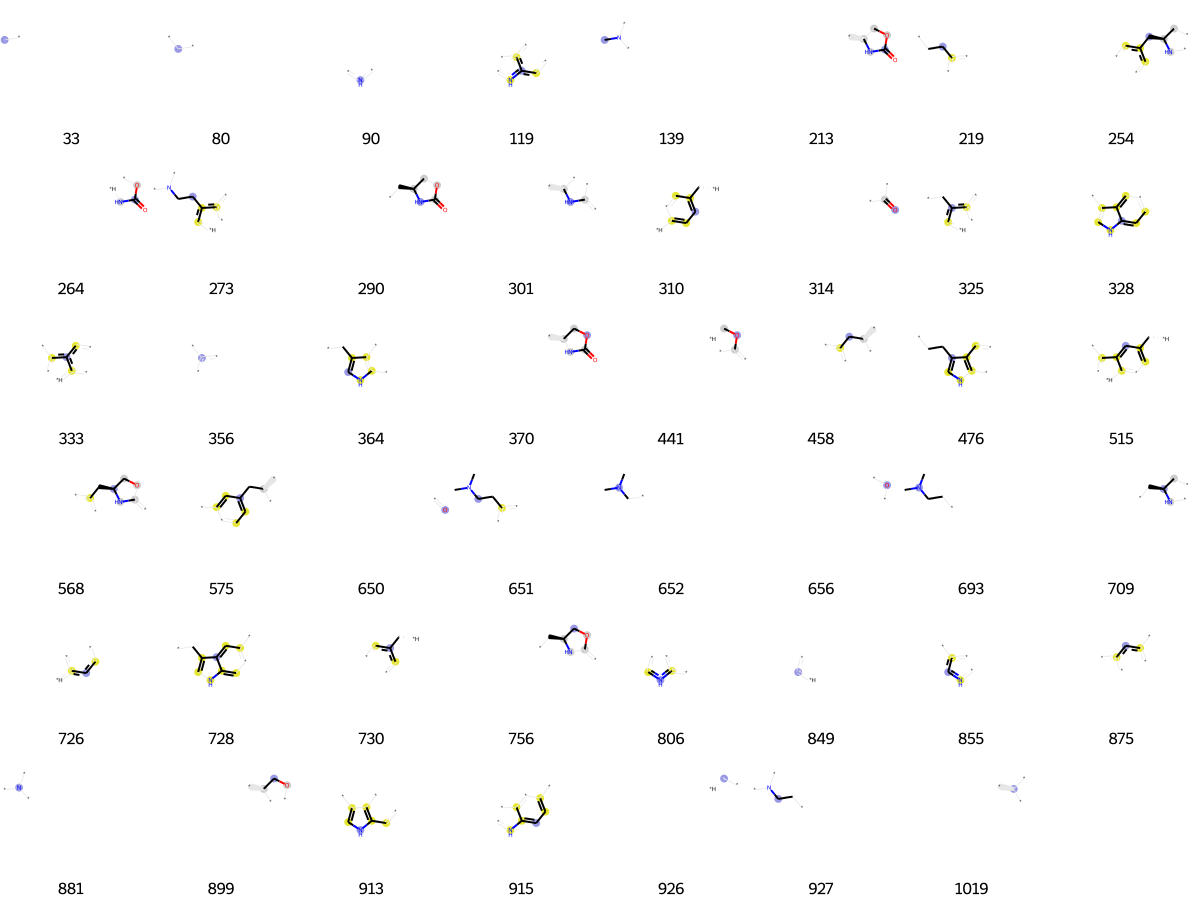

In [4619]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [4620]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[2,
 28,
 33,
 67,
 80,
 110,
 114,
 134,
 140,
 147,
 233,
 236,
 259,
 261,
 277,
 309,
 327,
 344,
 356,
 367,
 378,
 393,
 406,
 417,
 429,
 501,
 646,
 650,
 673,
 695,
 698,
 699,
 720,
 726,
 730,
 761,
 767,
 801,
 807,
 809,
 828,
 831,
 849,
 875,
 883,
 893,
 904,
 917,
 918,
 932,
 935,
 967]

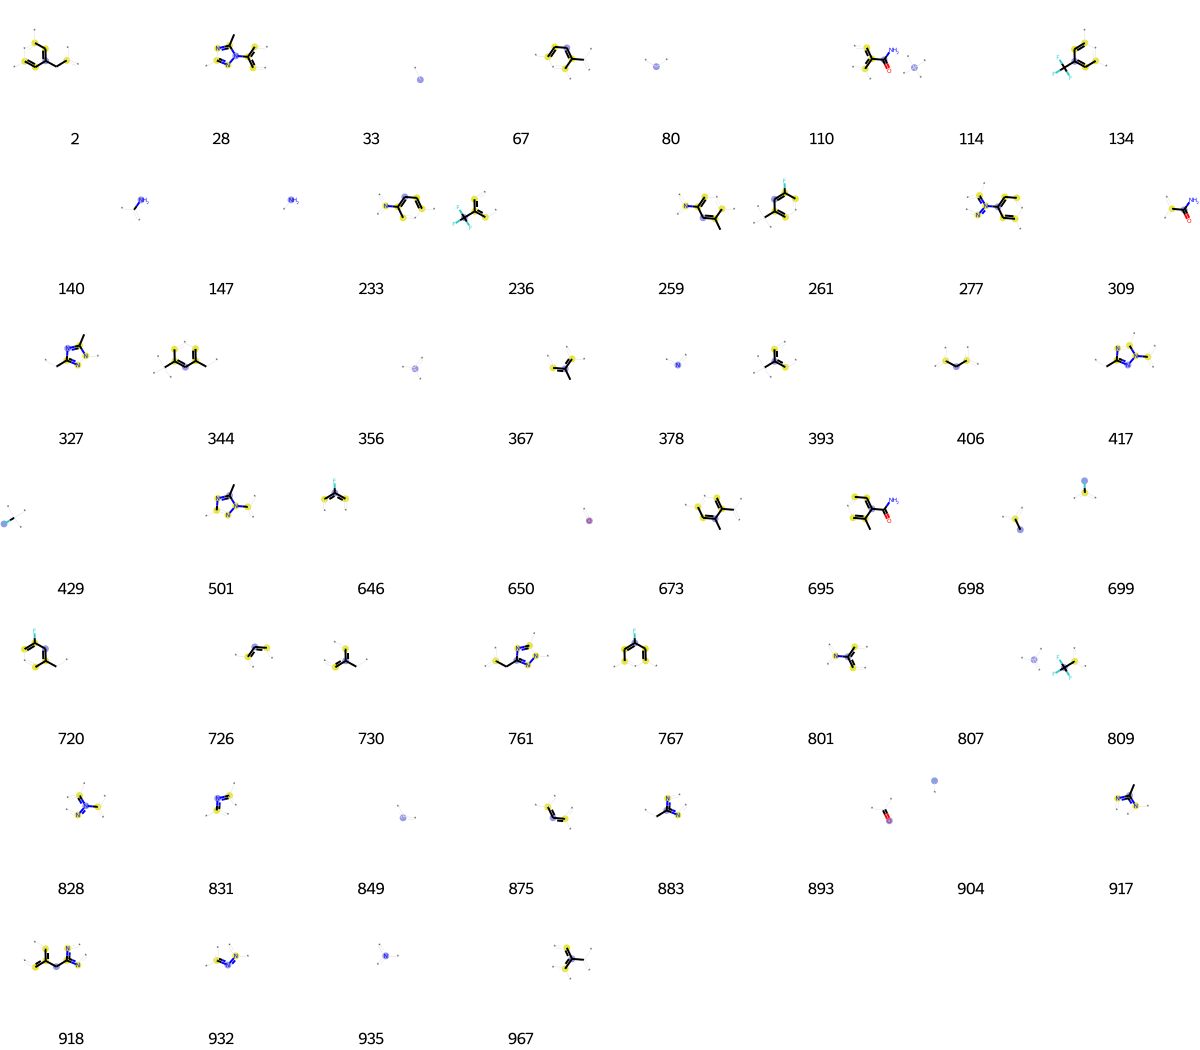

In [4621]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [4622]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[40,
 86,
 94,
 154,
 165,
 185,
 216,
 307,
 356,
 366,
 561,
 576,
 578,
 583,
 593,
 659,
 695,
 726,
 807,
 816,
 849,
 875,
 946,
 992]

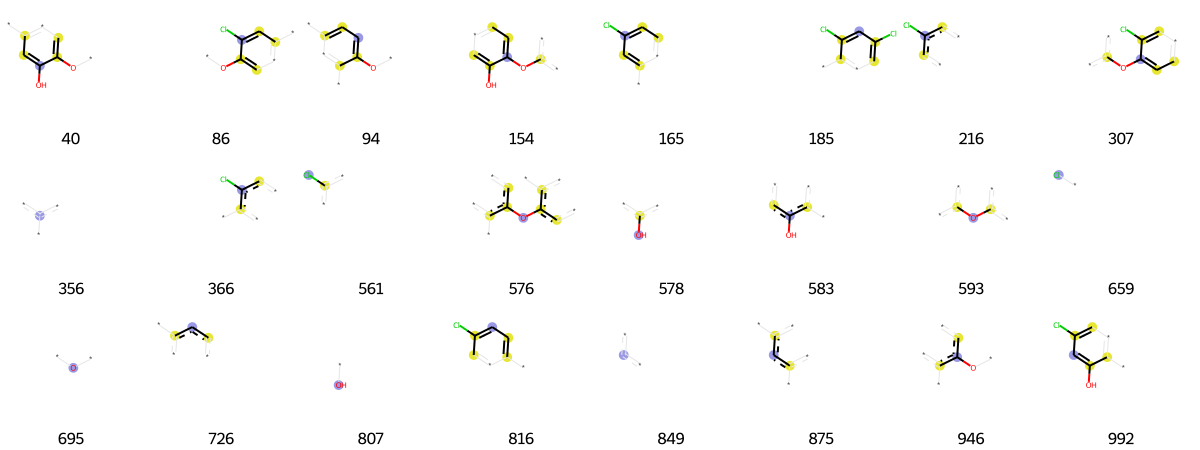

In [4623]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [4624]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 28,
 33,
 73,
 80,
 103,
 128,
 165,
 200,
 216,
 222,
 251,
 273,
 283,
 294,
 333,
 356,
 378,
 428,
 473,
 482,
 496,
 557,
 561,
 613,
 615,
 640,
 642,
 651,
 659,
 673,
 687,
 690,
 709,
 726,
 739,
 787,
 807,
 816,
 842,
 849,
 875,
 881,
 887,
 927,
 932,
 957,
 975,
 994]

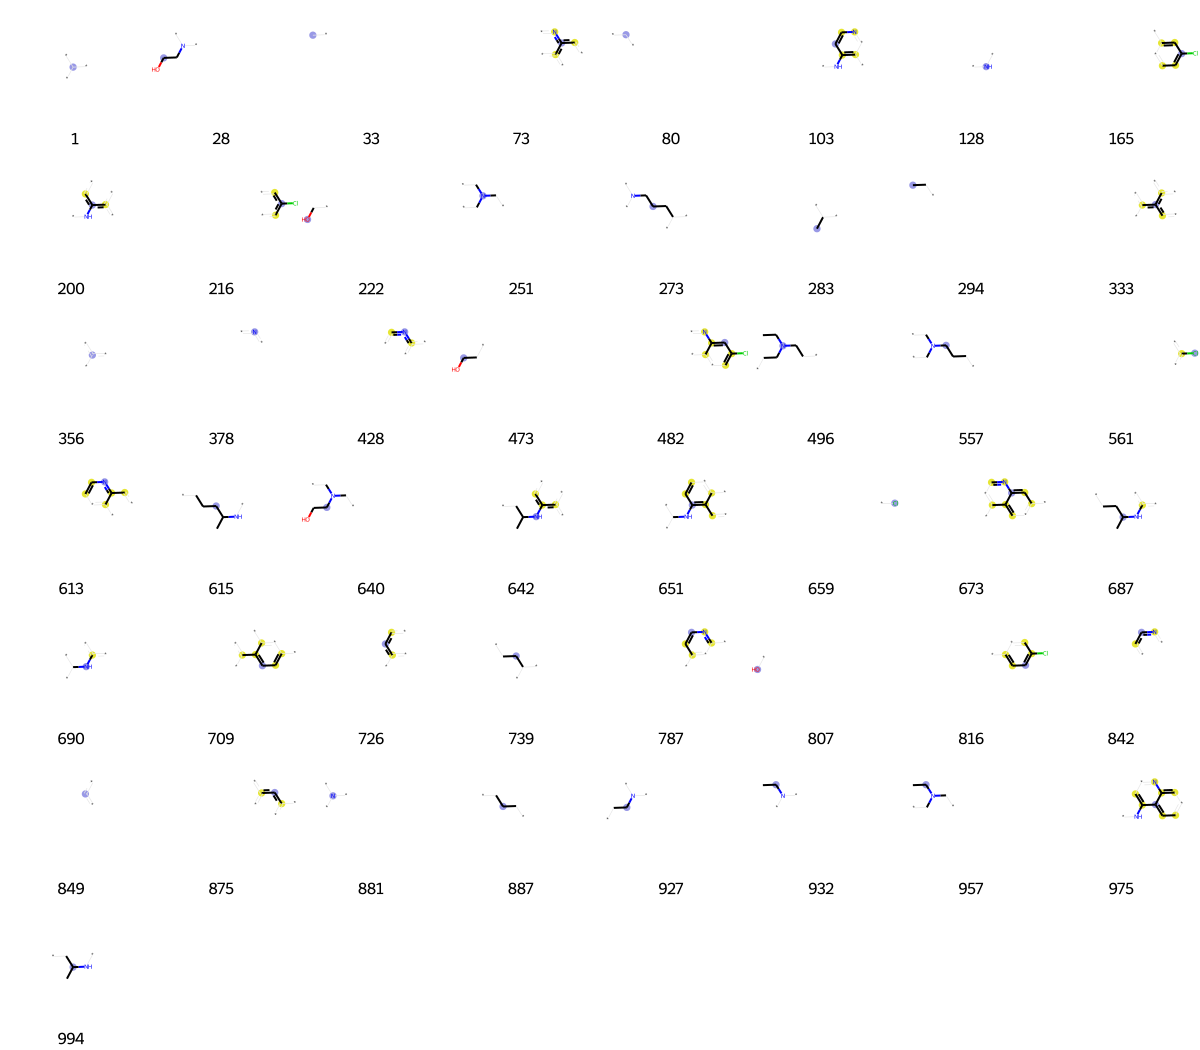

In [4625]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [4626]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 6,
 33,
 36,
 61,
 80,
 86,
 112,
 118,
 132,
 136,
 143,
 196,
 202,
 219,
 233,
 250,
 258,
 268,
 270,
 298,
 314,
 315,
 332,
 345,
 349,
 356,
 383,
 385,
 389,
 400,
 401,
 431,
 435,
 446,
 452,
 478,
 479,
 495,
 547,
 550,
 558,
 578,
 610,
 612,
 623,
 650,
 656,
 674,
 694,
 705,
 706,
 707,
 723,
 728,
 735,
 787,
 795,
 807,
 822,
 827,
 833,
 849,
 861,
 893,
 918,
 926,
 929,
 956,
 987,
 988,
 1009,
 1010,
 1017,
 1019]

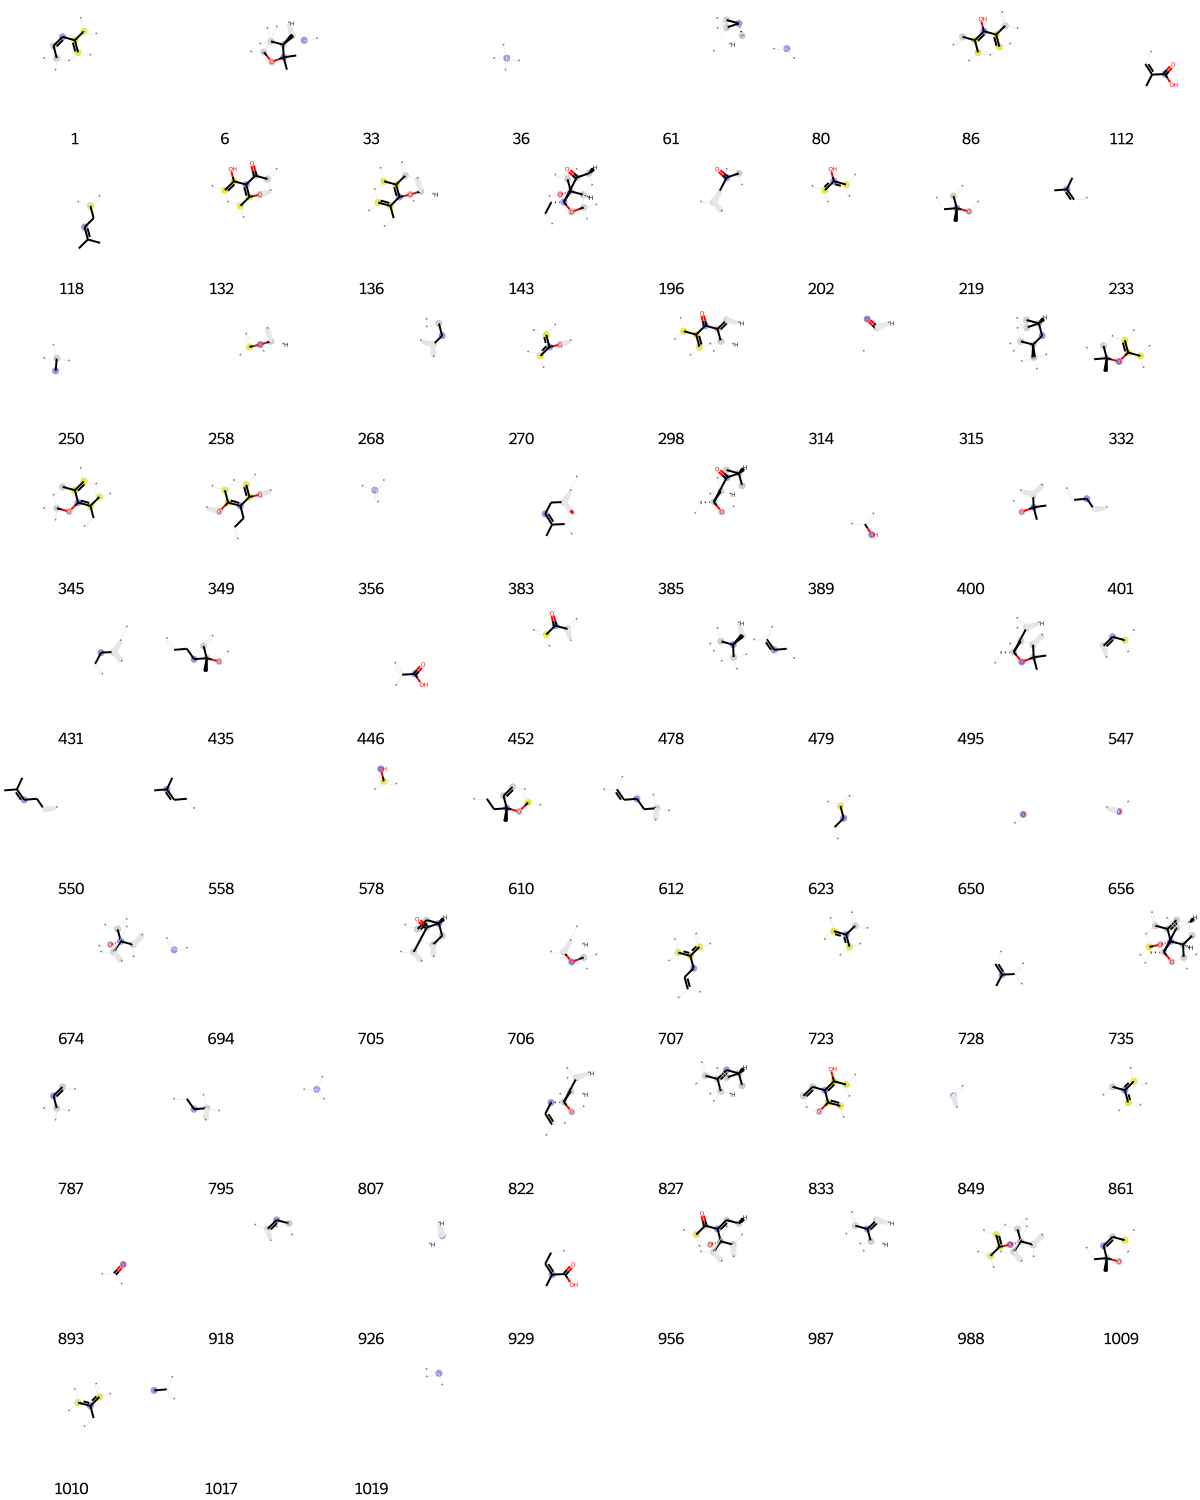

In [4627]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [4628]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[15,
 33,
 36,
 68,
 130,
 139,
 140,
 147,
 153,
 176,
 250,
 253,
 268,
 272,
 309,
 314,
 317,
 356,
 366,
 371,
 423,
 432,
 447,
 451,
 452,
 464,
 519,
 525,
 558,
 561,
 578,
 583,
 606,
 611,
 650,
 658,
 659,
 666,
 673,
 723,
 726,
 736,
 764,
 769,
 776,
 799,
 807,
 824,
 829,
 849,
 874,
 881,
 893,
 926,
 1005,
 1007,
 1019]

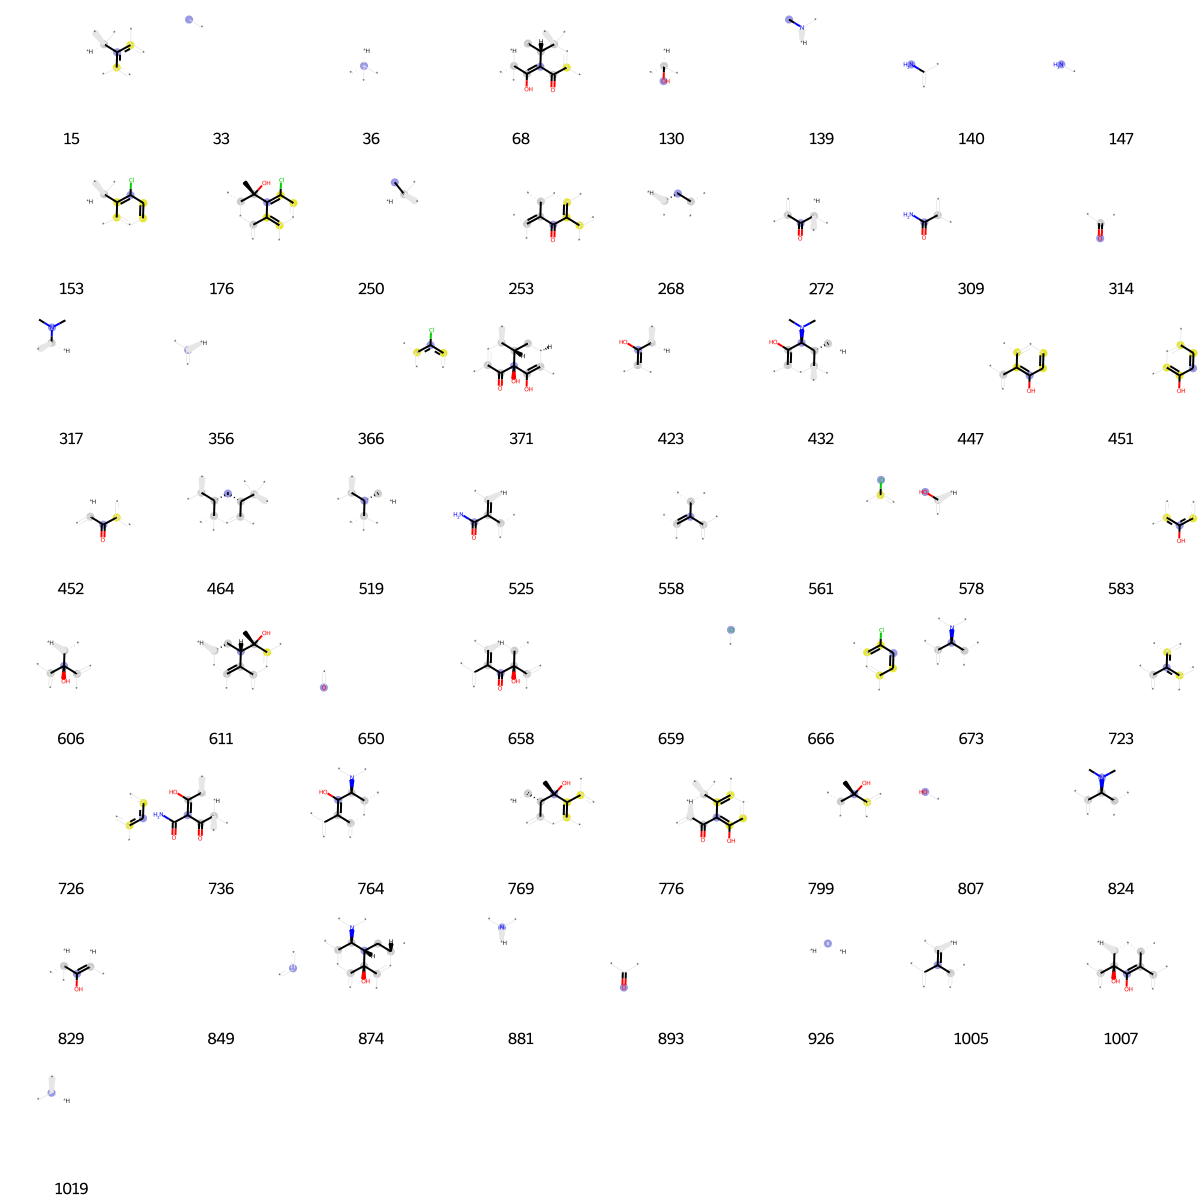

In [4629]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [4630]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 80,
 147,
 263,
 389,
 403,
 540,
 650,
 713,
 739,
 767,
 786,
 807,
 820,
 825,
 893,
 900,
 955]

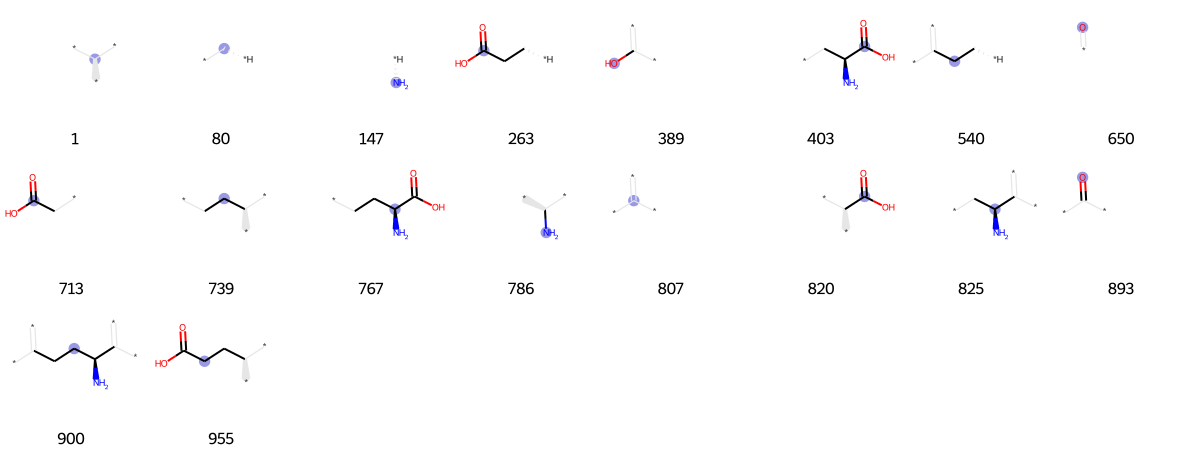

In [4631]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [4632]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[15,
 33,
 49,
 64,
 65,
 72,
 80,
 89,
 90,
 92,
 235,
 288,
 305,
 313,
 356,
 378,
 381,
 507,
 542,
 578,
 621,
 639,
 662,
 696,
 698,
 726,
 736,
 745,
 799,
 807,
 836,
 842,
 849,
 872,
 875,
 881,
 896,
 924,
 926,
 960]

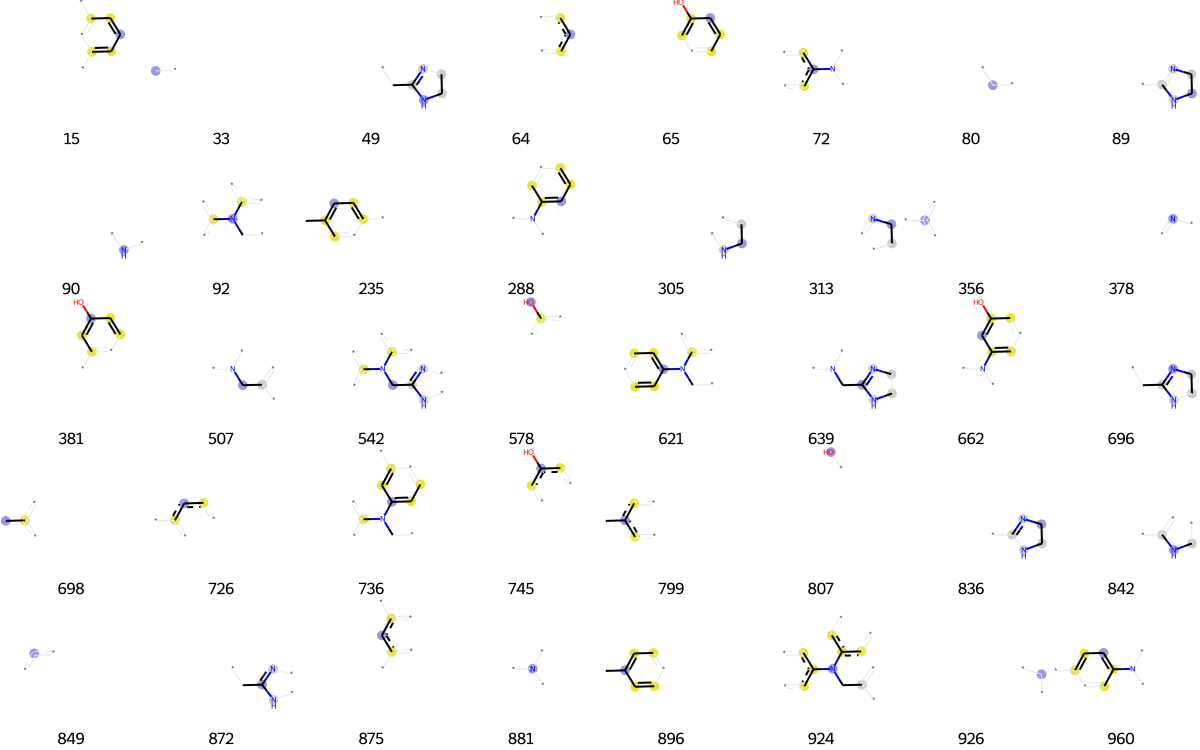

In [4633]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [4634]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 4,
 33,
 70,
 79,
 80,
 86,
 90,
 94,
 108,
 117,
 128,
 140,
 147,
 188,
 193,
 197,
 242,
 266,
 283,
 289,
 294,
 301,
 310,
 354,
 356,
 369,
 378,
 389,
 407,
 409,
 411,
 427,
 436,
 446,
 456,
 488,
 506,
 507,
 511,
 520,
 523,
 531,
 559,
 572,
 573,
 578,
 579,
 584,
 592,
 594,
 623,
 650,
 667,
 695,
 708,
 713,
 726,
 730,
 736,
 739,
 745,
 749,
 754,
 761,
 786,
 799,
 806,
 807,
 825,
 849,
 852,
 857,
 867,
 887,
 890,
 892,
 893,
 894,
 918,
 926,
 935,
 963,
 973,
 982,
 983,
 992,
 1015,
 1019]

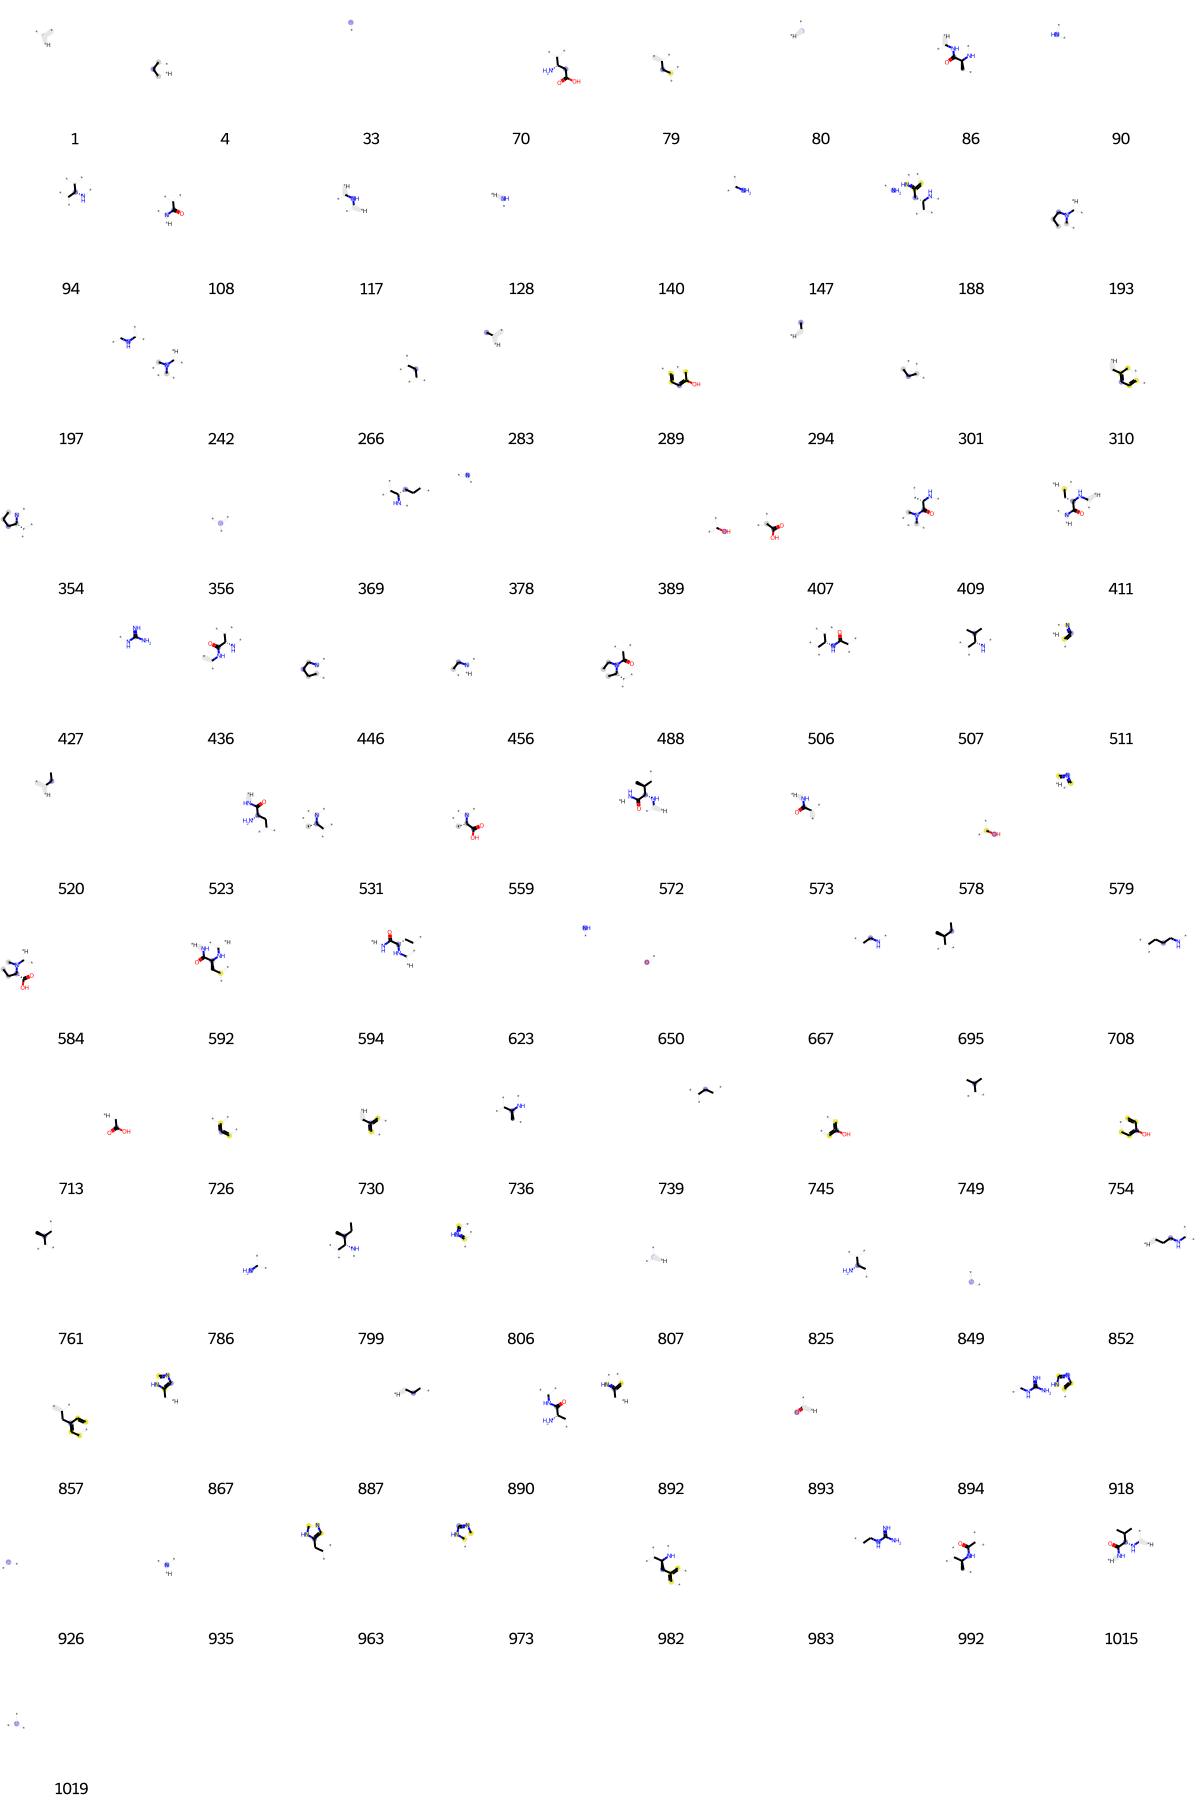

In [4635]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [4636]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[15,
 33,
 37,
 41,
 64,
 73,
 77,
 80,
 86,
 94,
 114,
 120,
 121,
 128,
 191,
 197,
 202,
 236,
 238,
 240,
 250,
 307,
 322,
 329,
 343,
 346,
 356,
 366,
 374,
 378,
 392,
 393,
 401,
 416,
 428,
 429,
 431,
 489,
 491,
 498,
 557,
 559,
 561,
 562,
 586,
 593,
 597,
 650,
 655,
 659,
 667,
 695,
 708,
 726,
 740,
 786,
 790,
 807,
 809,
 843,
 849,
 855,
 875,
 884,
 888,
 893,
 904,
 935,
 946,
 993,
 995]

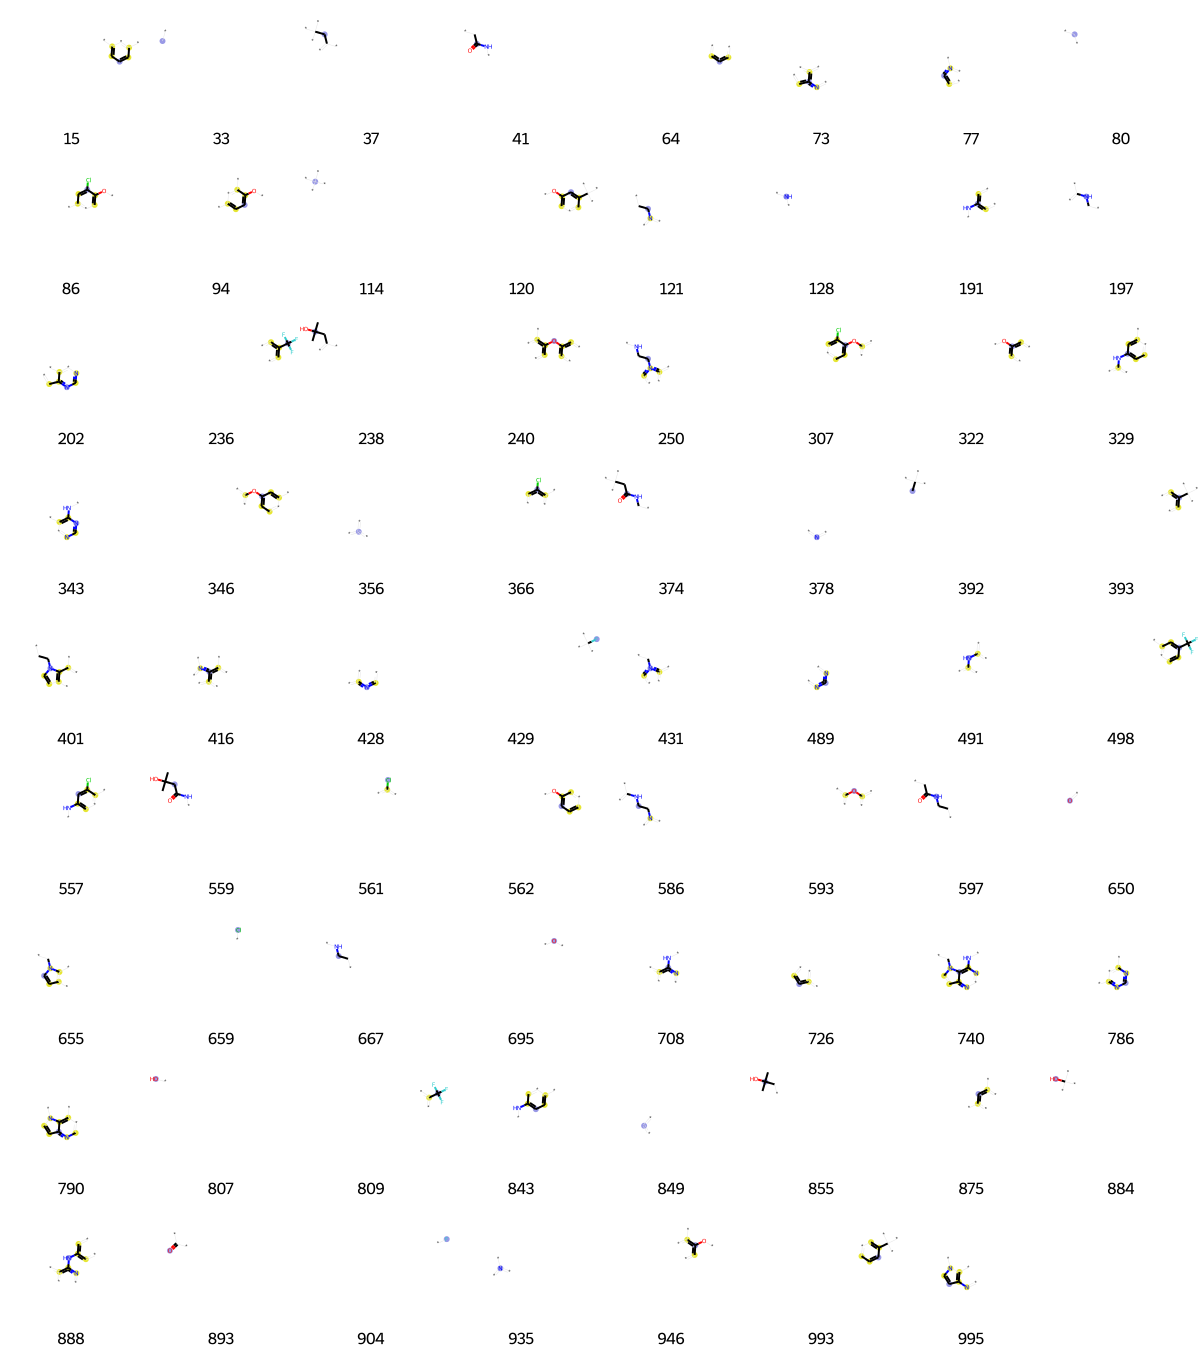

In [4637]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [4638]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[11,
 33,
 45,
 46,
 60,
 80,
 100,
 116,
 145,
 216,
 239,
 258,
 319,
 322,
 325,
 333,
 356,
 359,
 361,
 381,
 417,
 456,
 480,
 487,
 512,
 523,
 561,
 609,
 650,
 656,
 659,
 673,
 695,
 698,
 718,
 726,
 742,
 760,
 781,
 807,
 816,
 841,
 849,
 858,
 875,
 893,
 926,
 935,
 948,
 950,
 985,
 997,
 1009,
 1010]

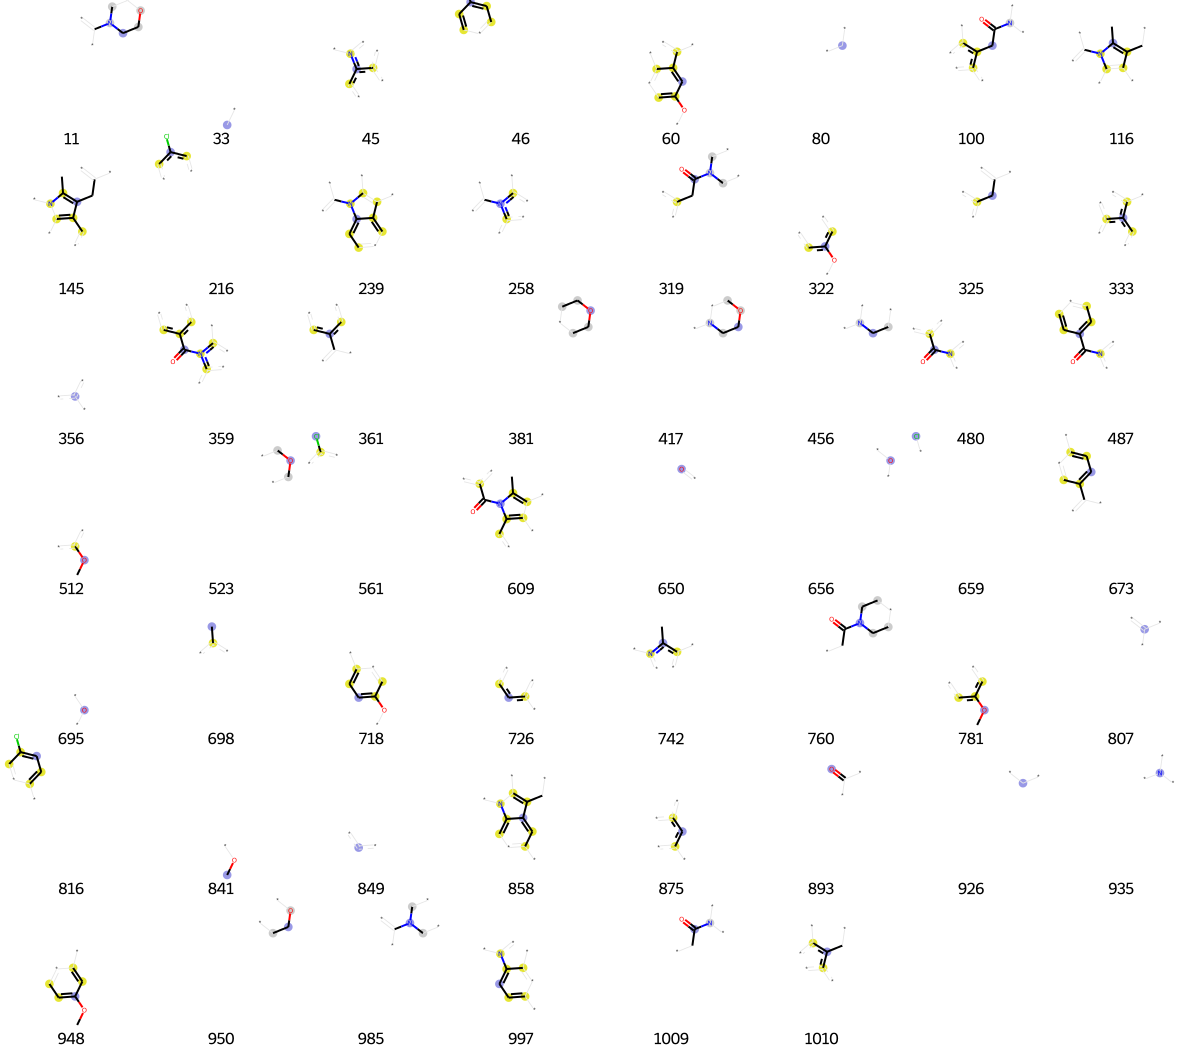

In [4639]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [4640]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[8,
 9,
 33,
 61,
 77,
 80,
 119,
 128,
 138,
 197,
 219,
 233,
 255,
 282,
 293,
 294,
 301,
 310,
 342,
 356,
 378,
 392,
 396,
 428,
 486,
 511,
 544,
 549,
 558,
 565,
 579,
 590,
 591,
 610,
 630,
 638,
 650,
 667,
 708,
 726,
 730,
 774,
 794,
 801,
 802,
 806,
 807,
 813,
 818,
 831,
 842,
 843,
 848,
 849,
 860,
 887,
 893,
 895,
 926,
 932,
 935,
 948,
 967,
 1019]

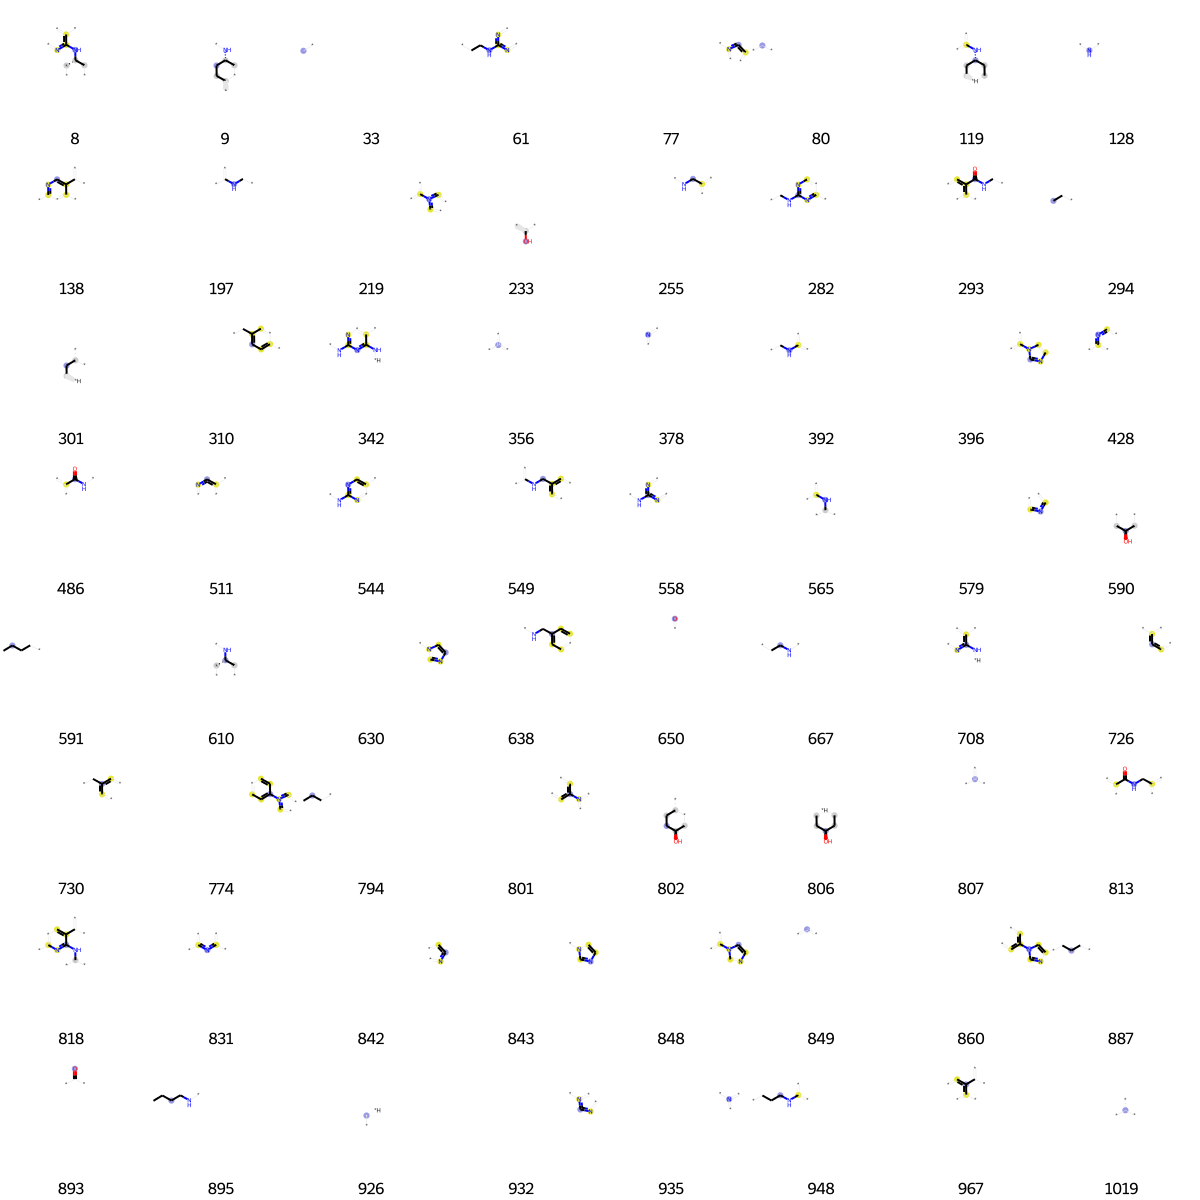

In [4641]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [4642]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 33,
 64,
 73,
 75,
 80,
 90,
 114,
 136,
 158,
 168,
 262,
 289,
 300,
 325,
 333,
 351,
 356,
 366,
 378,
 386,
 419,
 429,
 430,
 463,
 469,
 549,
 561,
 603,
 646,
 659,
 699,
 700,
 717,
 726,
 741,
 809,
 849,
 875,
 896,
 904,
 915,
 932,
 935,
 965,
 966]

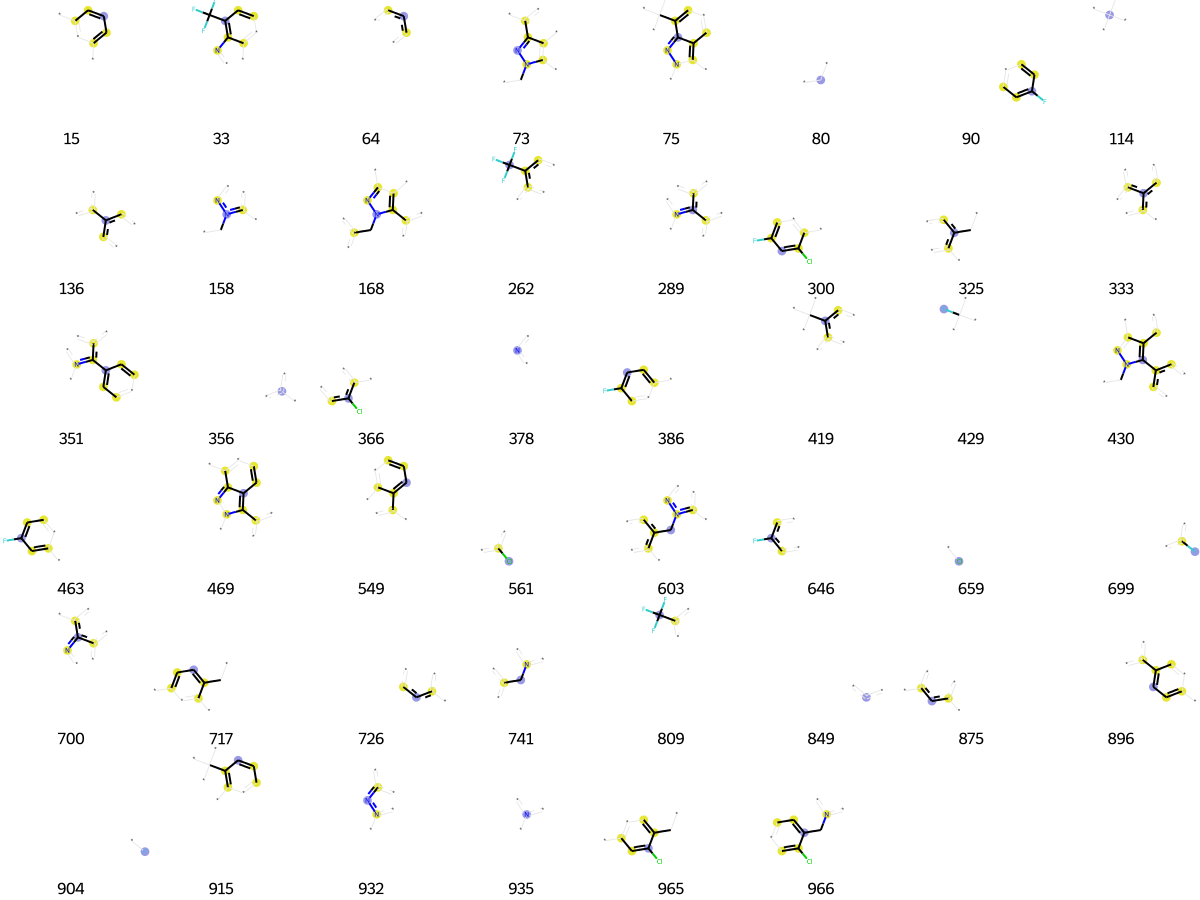

In [4643]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [4644]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[8,
 36,
 62,
 64,
 75,
 77,
 126,
 128,
 138,
 148,
 175,
 184,
 251,
 258,
 271,
 301,
 314,
 352,
 356,
 368,
 378,
 398,
 431,
 466,
 475,
 511,
 562,
 579,
 623,
 650,
 655,
 656,
 664,
 689,
 699,
 726,
 785,
 792,
 807,
 808,
 816,
 836,
 842,
 849,
 874,
 893,
 904,
 906,
 926,
 927,
 932,
 935,
 956,
 972,
 974,
 999,
 1019,
 1021]

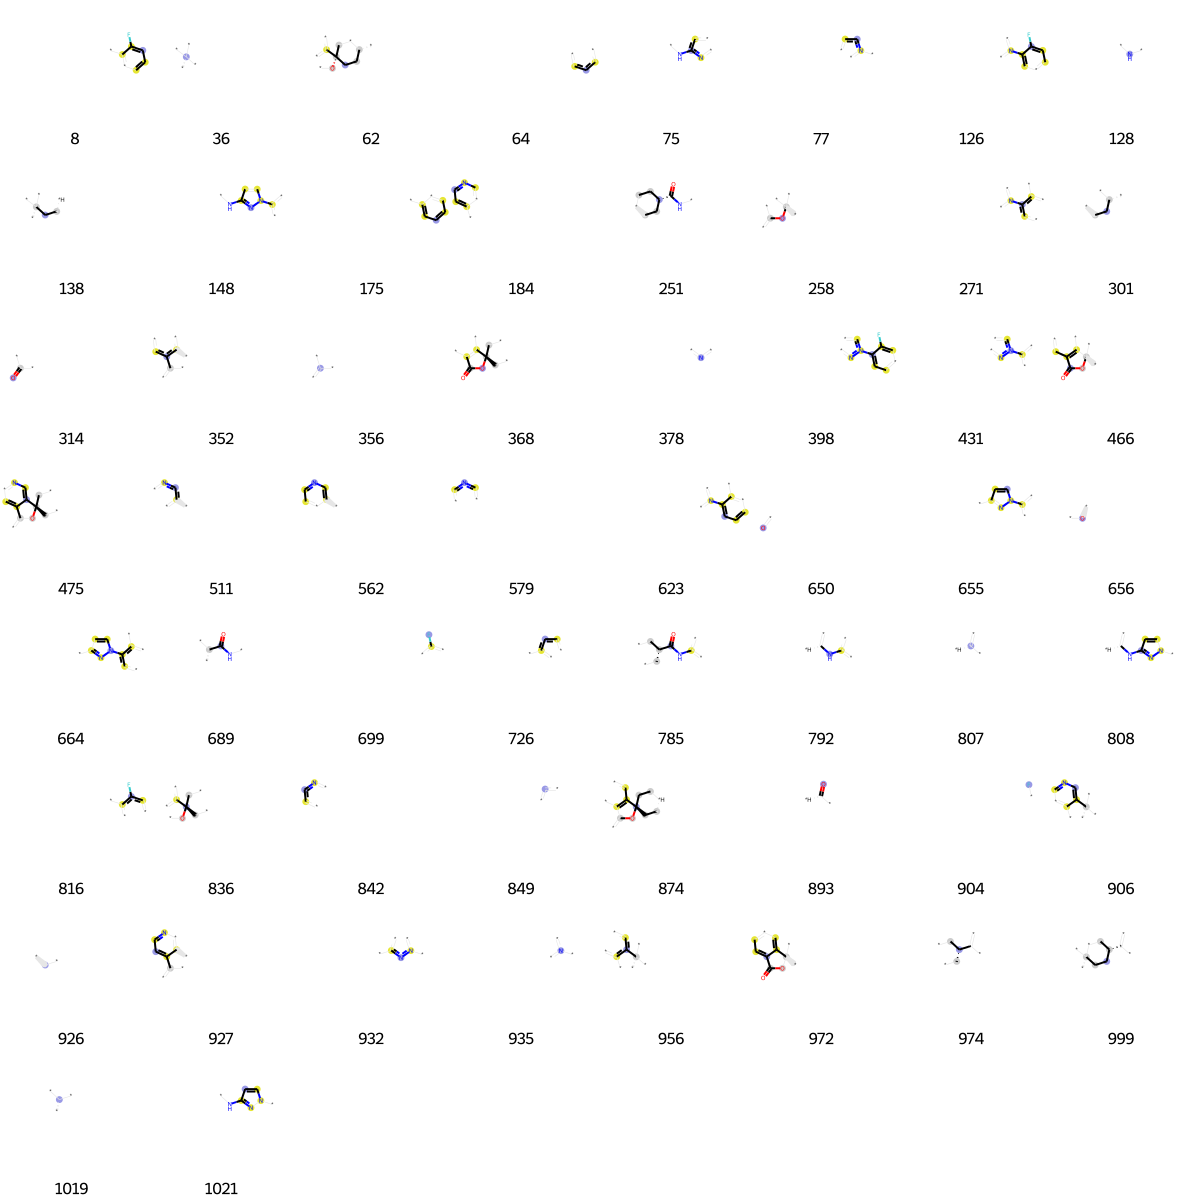

In [4645]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [4646]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[0,
 1,
 15,
 33,
 64,
 74,
 78,
 90,
 110,
 117,
 128,
 175,
 223,
 284,
 294,
 312,
 314,
 318,
 333,
 356,
 361,
 378,
 389,
 485,
 486,
 537,
 549,
 573,
 607,
 641,
 650,
 659,
 700,
 725,
 726,
 728,
 731,
 750,
 755,
 766,
 807,
 847,
 849,
 875,
 893,
 902,
 906,
 909,
 940,
 961,
 980,
 985,
 991,
 1017]

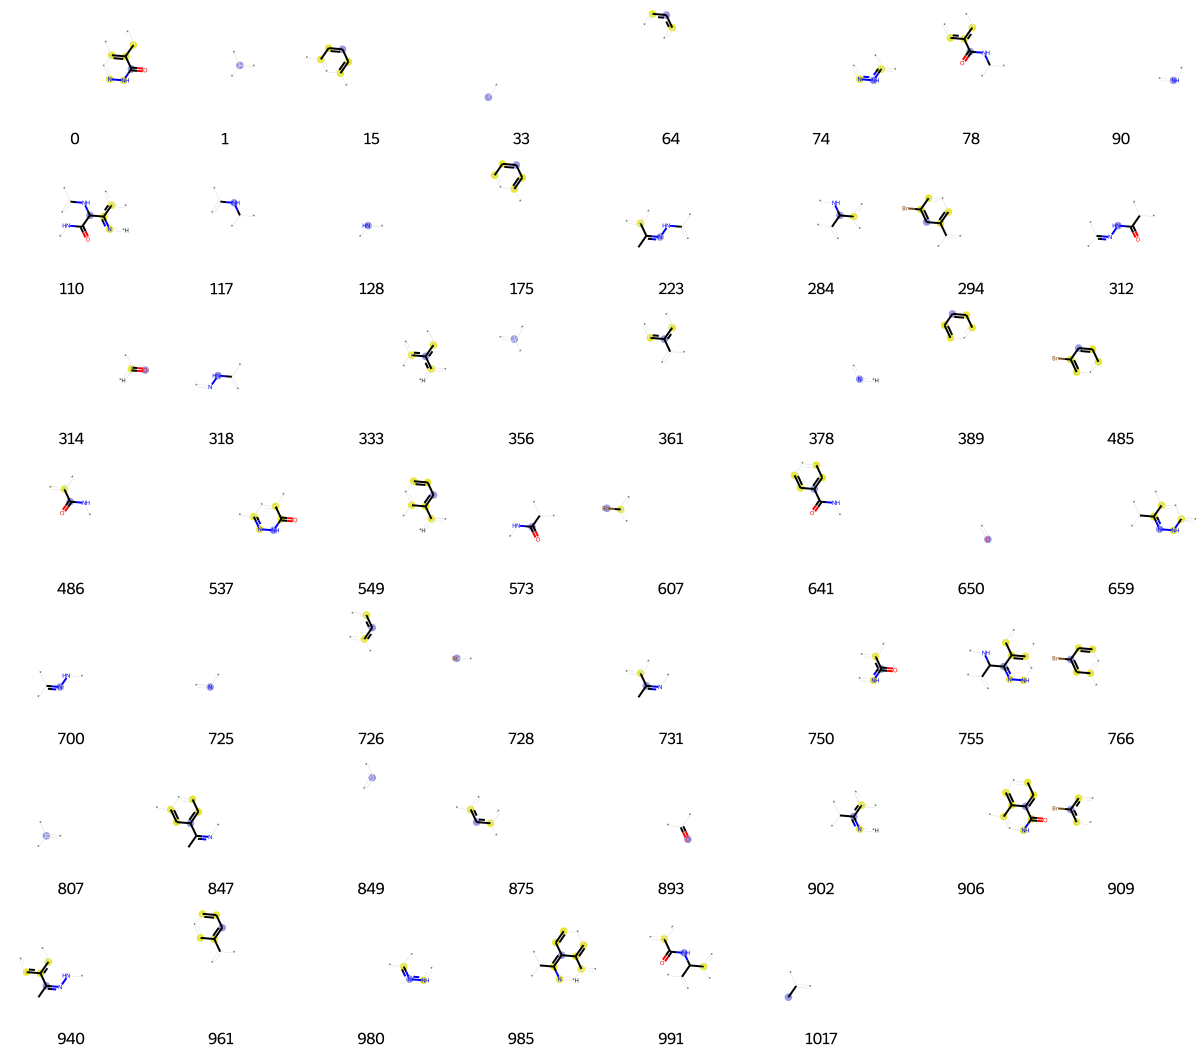

In [4647]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [4648]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[11,
 33,
 36,
 64,
 76,
 84,
 165,
 175,
 258,
 298,
 314,
 322,
 325,
 352,
 356,
 436,
 466,
 555,
 650,
 656,
 695,
 705,
 718,
 726,
 751,
 759,
 786,
 807,
 840,
 849,
 875,
 881,
 893,
 936,
 956,
 972,
 984,
 1010,
 1017]

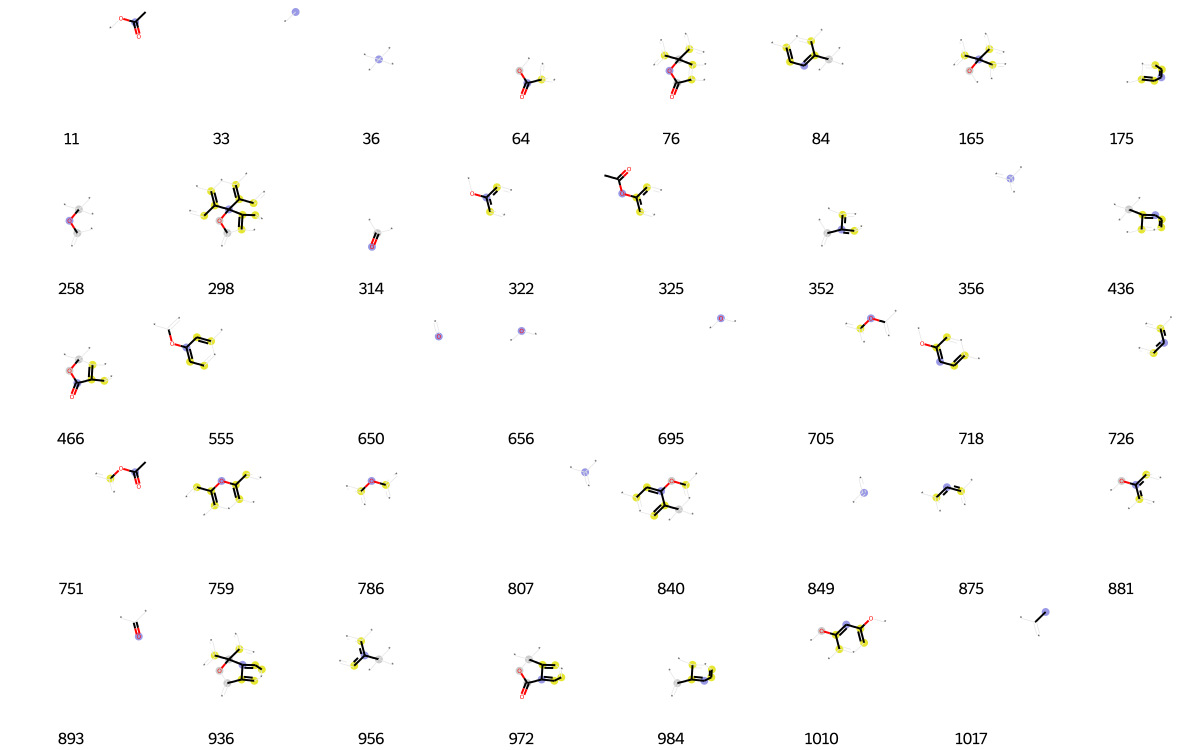

In [4649]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [4650]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[15,
 38,
 64,
 90,
 112,
 137,
 165,
 175,
 195,
 216,
 230,
 285,
 286,
 333,
 345,
 356,
 360,
 361,
 378,
 456,
 506,
 549,
 561,
 585,
 592,
 659,
 672,
 674,
 700,
 709,
 721,
 723,
 726,
 727,
 790,
 816,
 831,
 838,
 849,
 863,
 875,
 940]

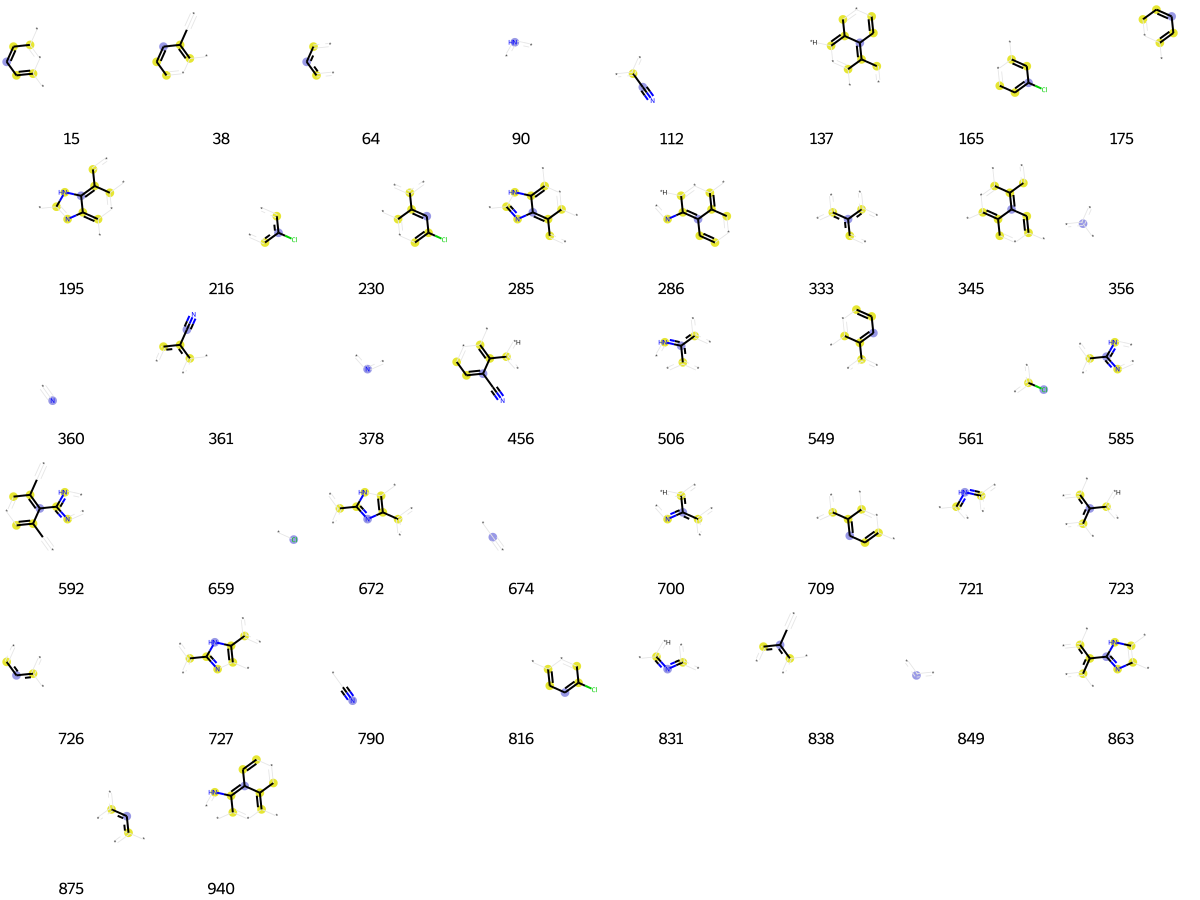

In [4651]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [4652]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[7,
 33,
 36,
 43,
 59,
 73,
 80,
 84,
 90,
 102,
 106,
 124,
 128,
 139,
 140,
 147,
 171,
 176,
 225,
 231,
 233,
 268,
 273,
 278,
 279,
 284,
 285,
 314,
 322,
 355,
 356,
 368,
 392,
 410,
 452,
 463,
 487,
 551,
 599,
 609,
 633,
 650,
 652,
 667,
 693,
 695,
 698,
 706,
 713,
 717,
 744,
 745,
 747,
 750,
 756,
 779,
 798,
 801,
 807,
 841,
 849,
 862,
 866,
 871,
 881,
 893,
 911,
 913,
 918,
 922,
 926,
 927,
 937,
 949,
 958,
 1019]

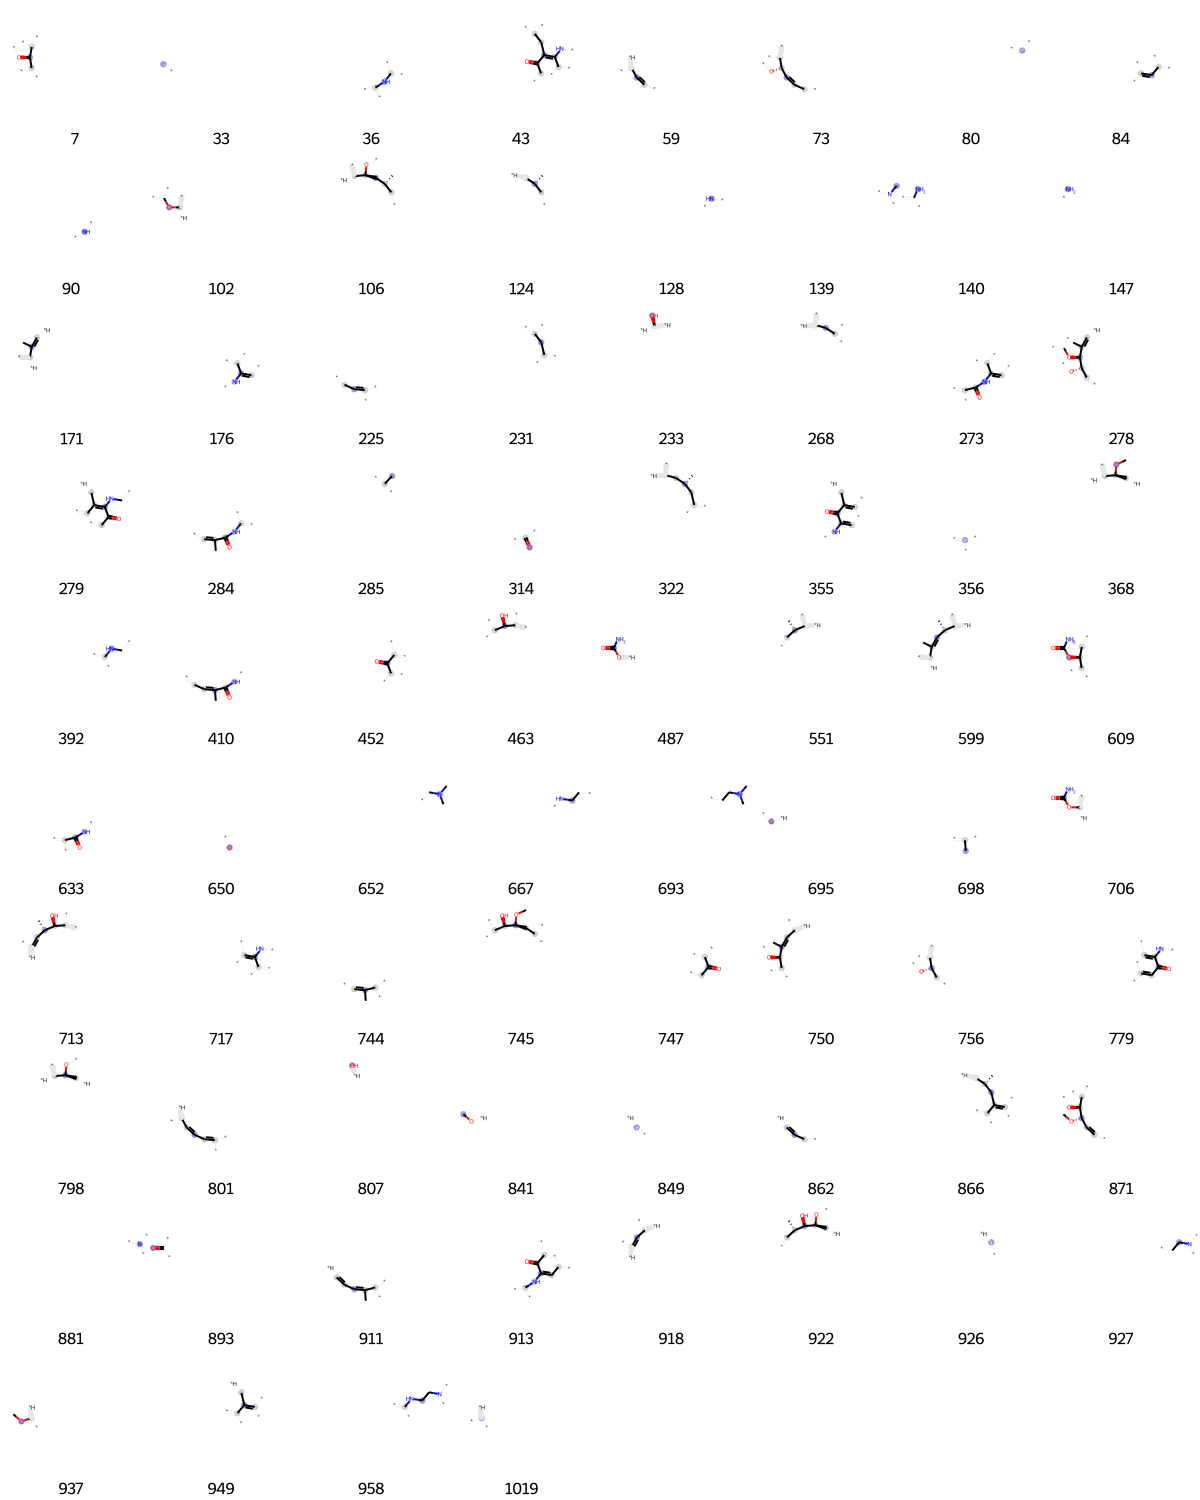

In [4653]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [4654]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 74,
 79,
 80,
 90,
 128,
 136,
 155,
 182,
 197,
 294,
 320,
 322,
 352,
 356,
 358,
 366,
 378,
 427,
 486,
 490,
 512,
 550,
 561,
 578,
 583,
 600,
 624,
 650,
 659,
 695,
 702,
 718,
 723,
 726,
 732,
 740,
 763,
 772,
 781,
 807,
 831,
 841,
 849,
 875,
 893,
 896,
 980,
 1014]

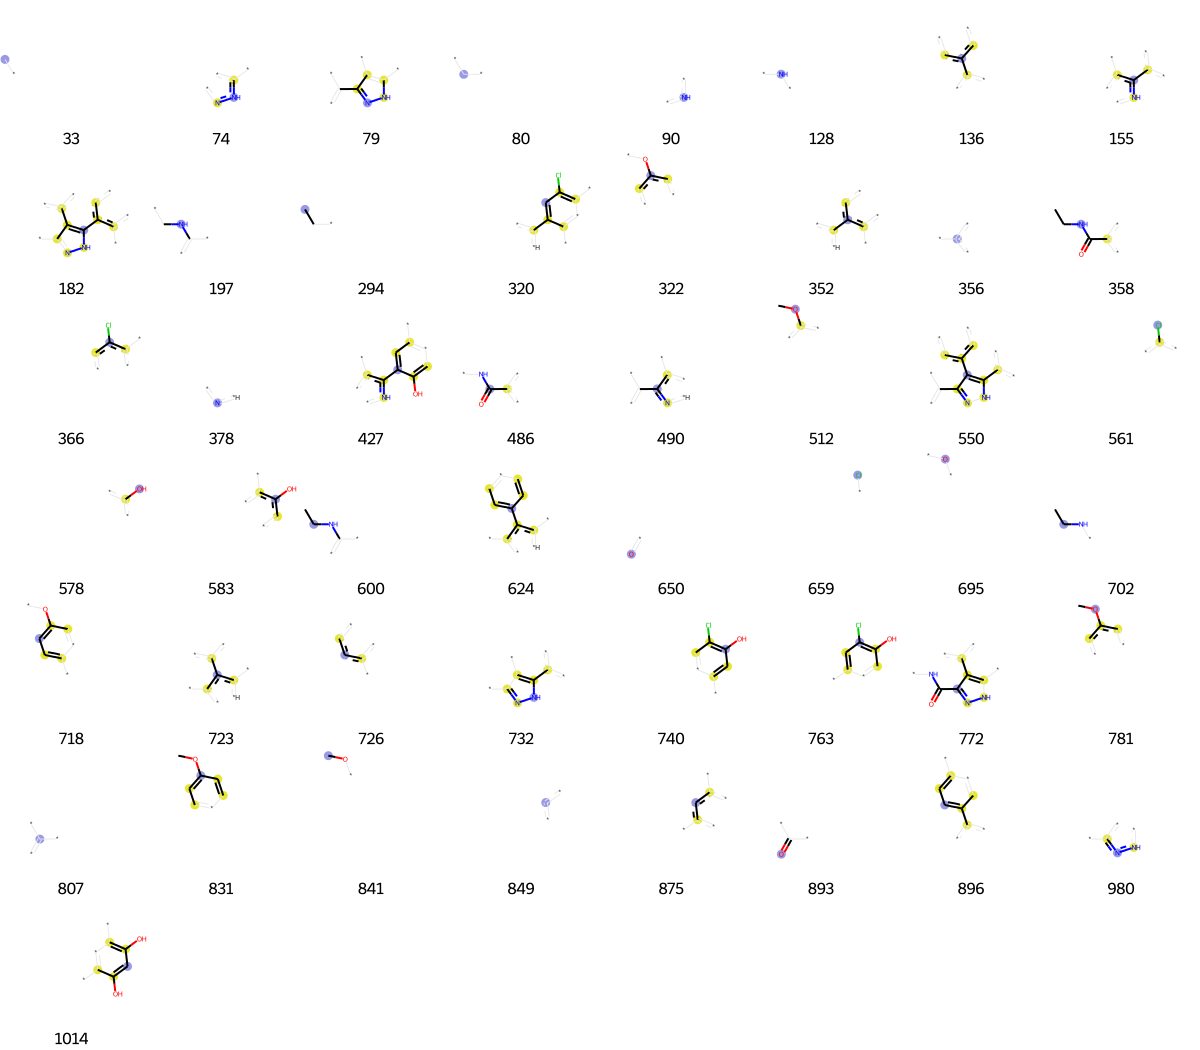

In [4655]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [4656]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[4,
 33,
 39,
 62,
 128,
 212,
 242,
 301,
 303,
 311,
 322,
 345,
 346,
 356,
 361,
 378,
 406,
 426,
 428,
 440,
 452,
 456,
 486,
 494,
 511,
 546,
 557,
 558,
 593,
 628,
 650,
 673,
 695,
 714,
 718,
 726,
 744,
 772,
 807,
 830,
 849,
 864,
 875,
 886,
 893,
 926,
 930,
 935,
 956,
 969,
 1019]

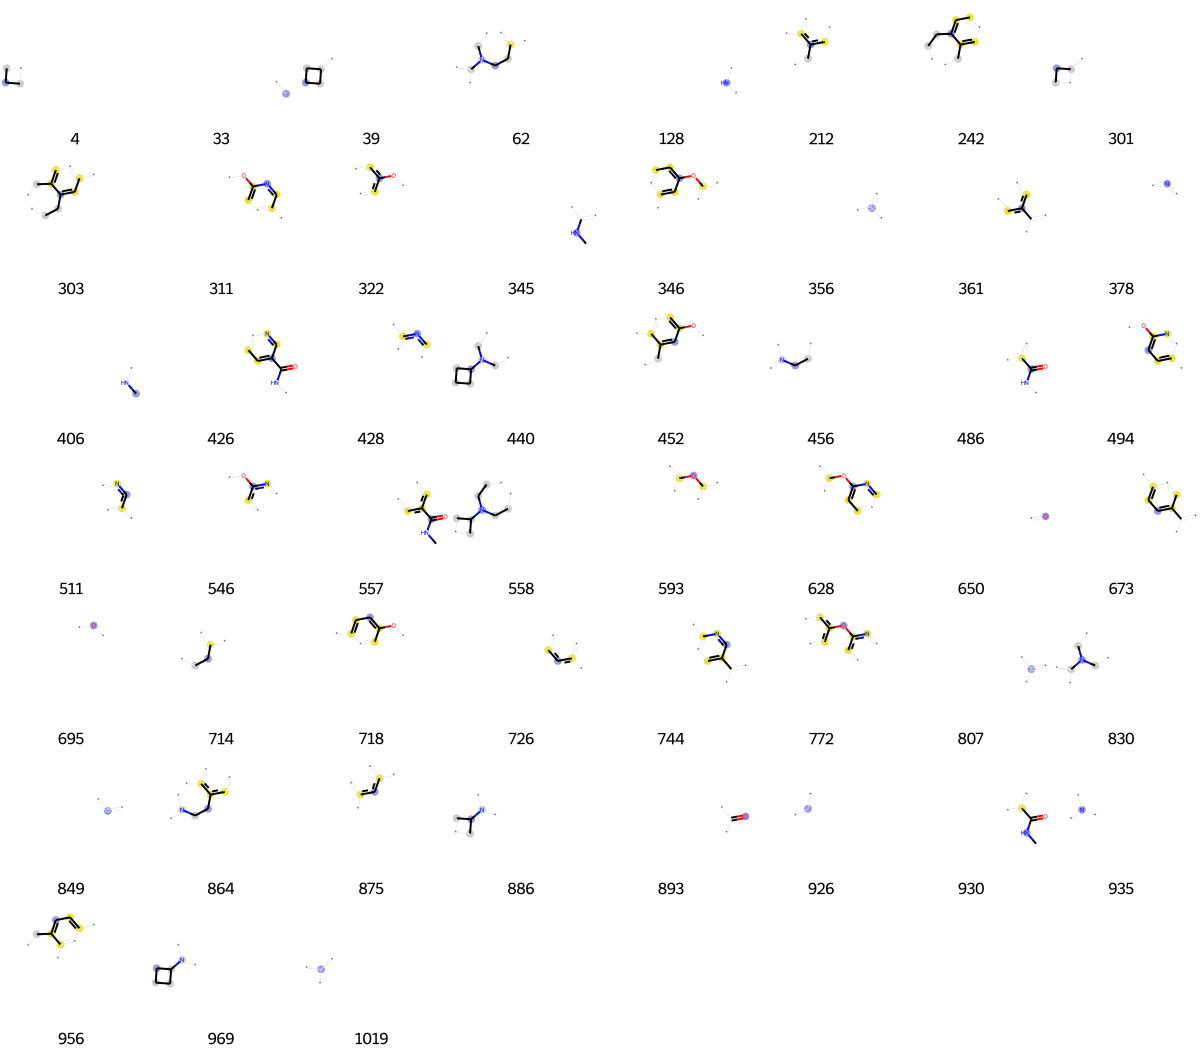

In [4657]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [4658]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33, 93, 136, 147, 275, 356, 367, 433, 698, 828, 849, 875, 945, 1013]

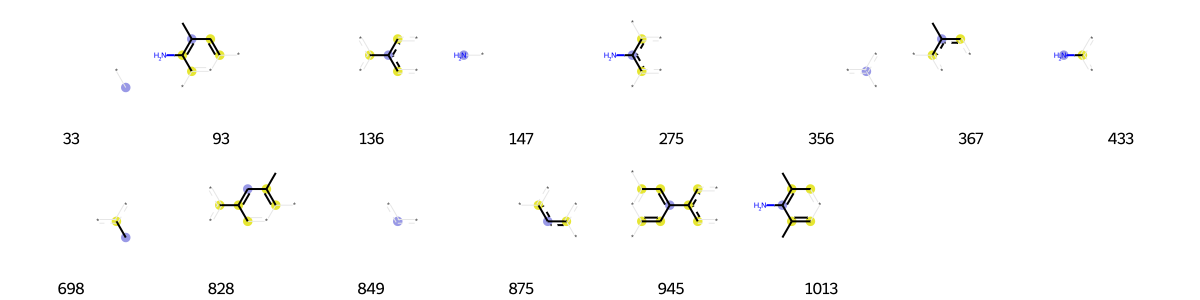

In [4659]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [4660]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[2,
 4,
 8,
 33,
 90,
 119,
 128,
 138,
 200,
 233,
 259,
 298,
 301,
 342,
 356,
 367,
 378,
 381,
 407,
 417,
 418,
 428,
 456,
 491,
 496,
 515,
 518,
 523,
 555,
 558,
 565,
 610,
 614,
 656,
 687,
 698,
 700,
 708,
 713,
 726,
 801,
 806,
 831,
 832,
 834,
 849,
 859,
 875,
 886,
 890,
 926,
 935,
 950,
 983,
 1014,
 1019]

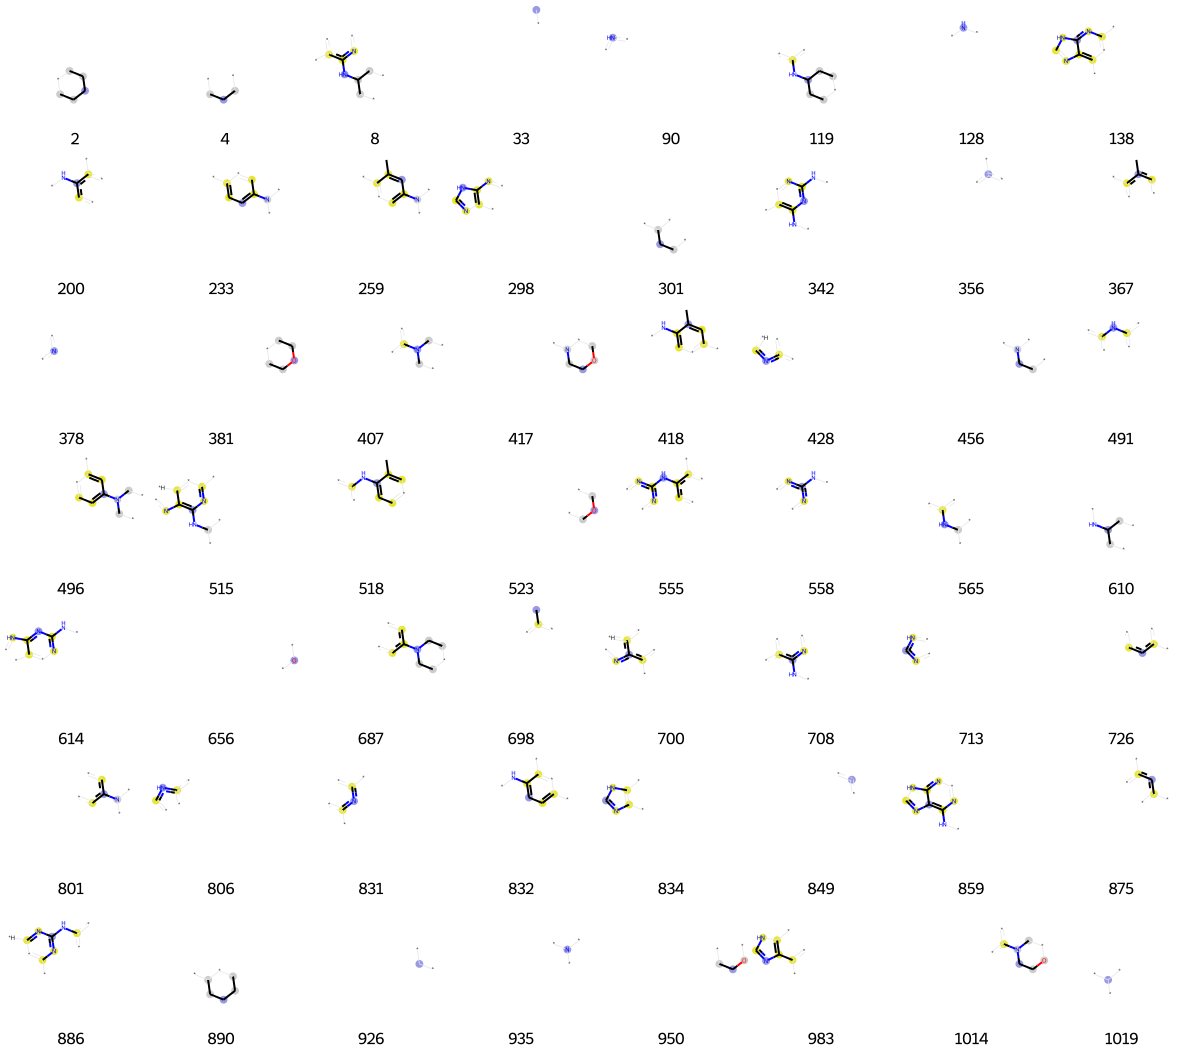

In [4661]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [4662]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 8,
 15,
 25,
 33,
 47,
 58,
 64,
 73,
 80,
 90,
 128,
 147,
 151,
 175,
 193,
 253,
 274,
 289,
 291,
 294,
 298,
 314,
 335,
 337,
 339,
 343,
 356,
 378,
 389,
 428,
 488,
 489,
 504,
 520,
 536,
 650,
 690,
 699,
 700,
 708,
 713,
 726,
 786,
 787,
 801,
 806,
 816,
 831,
 834,
 849,
 859,
 904,
 920,
 931,
 935,
 960,
 969,
 983]

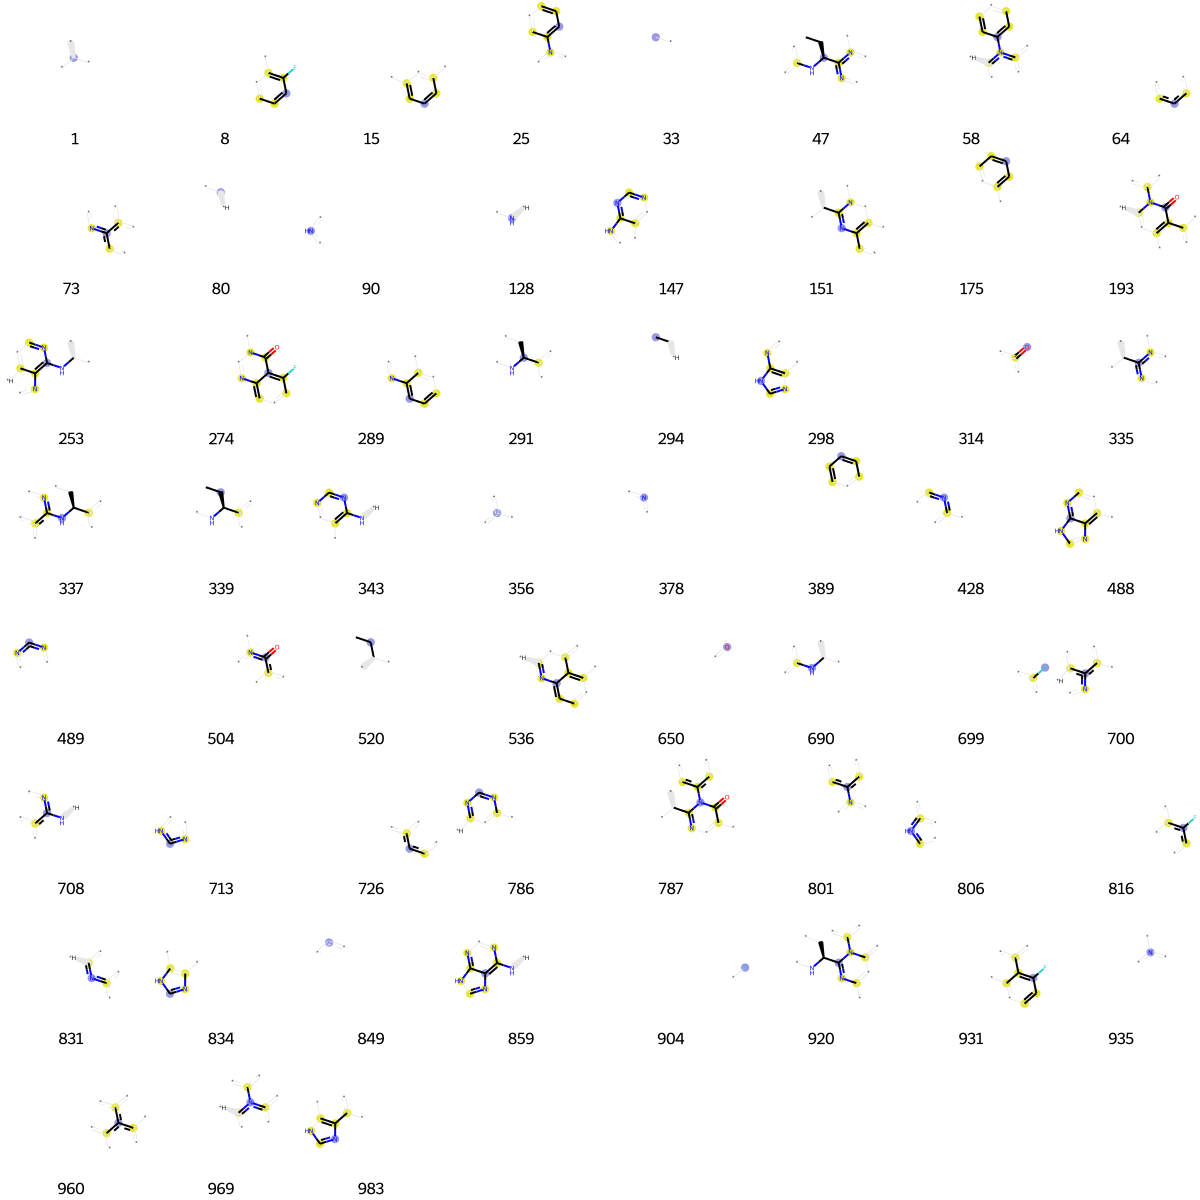

In [4663]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [4664]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[15,
 19,
 22,
 29,
 40,
 42,
 64,
 80,
 114,
 128,
 191,
 218,
 236,
 301,
 311,
 322,
 346,
 356,
 357,
 375,
 378,
 393,
 428,
 429,
 437,
 444,
 456,
 458,
 494,
 511,
 546,
 559,
 562,
 573,
 575,
 579,
 593,
 628,
 641,
 650,
 652,
 695,
 703,
 712,
 726,
 730,
 772,
 792,
 800,
 807,
 809,
 842,
 849,
 860,
 872,
 875,
 893,
 904,
 926,
 935,
 985,
 1019]

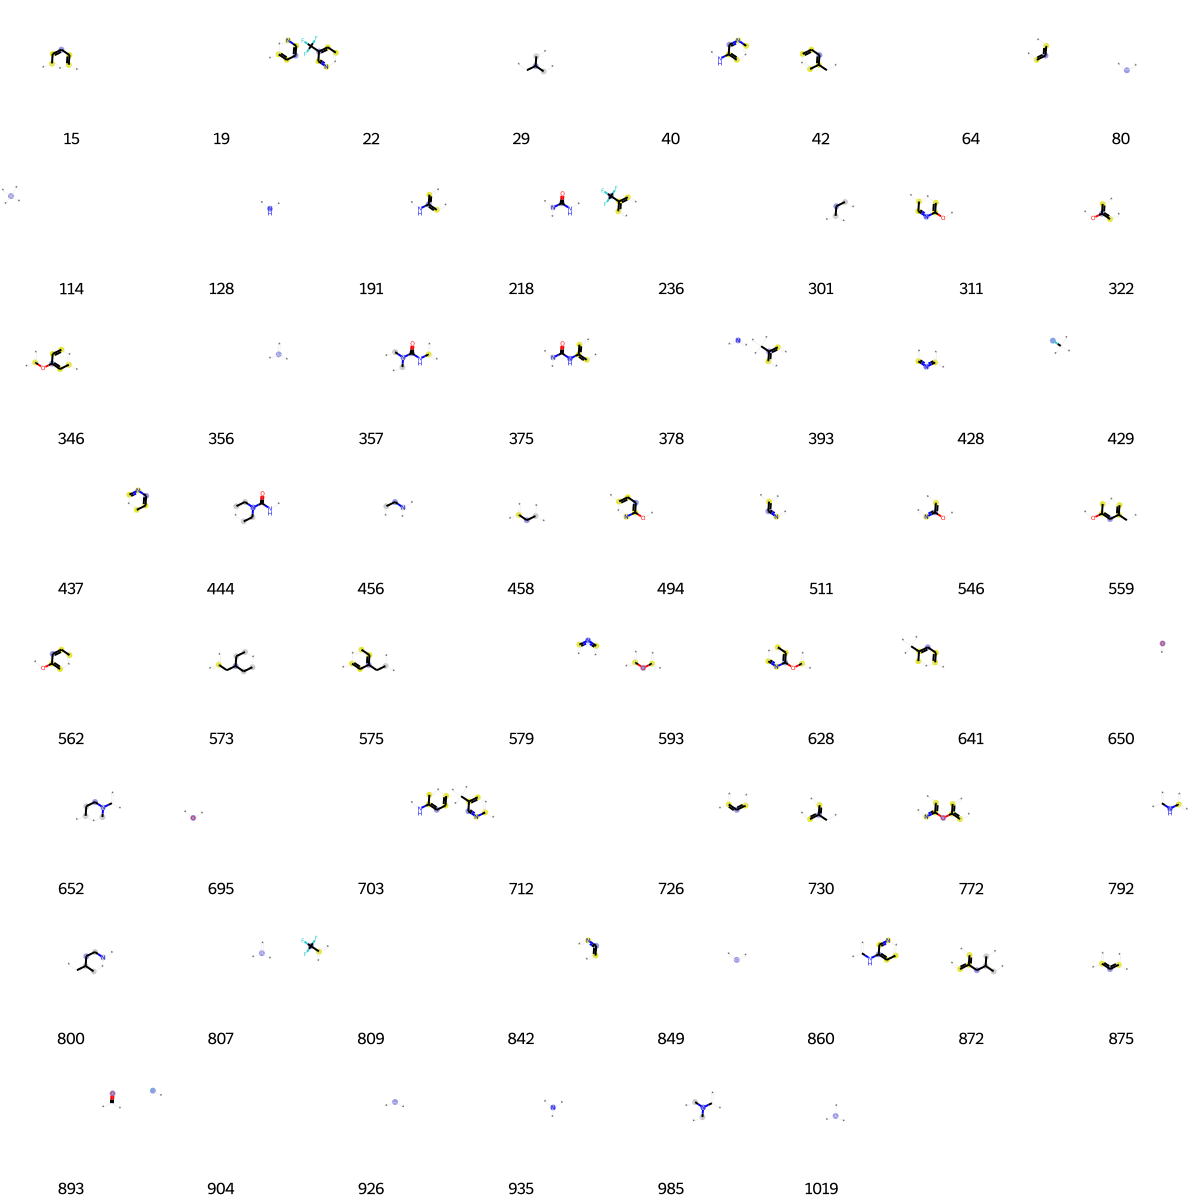

In [4665]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [4666]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[34,
 36,
 46,
 80,
 90,
 121,
 130,
 132,
 138,
 216,
 256,
 356,
 361,
 386,
 408,
 427,
 456,
 458,
 484,
 540,
 556,
 561,
 594,
 646,
 650,
 653,
 659,
 669,
 673,
 693,
 699,
 726,
 767,
 807,
 816,
 849,
 887,
 893,
 904,
 926,
 935,
 953,
 1021]

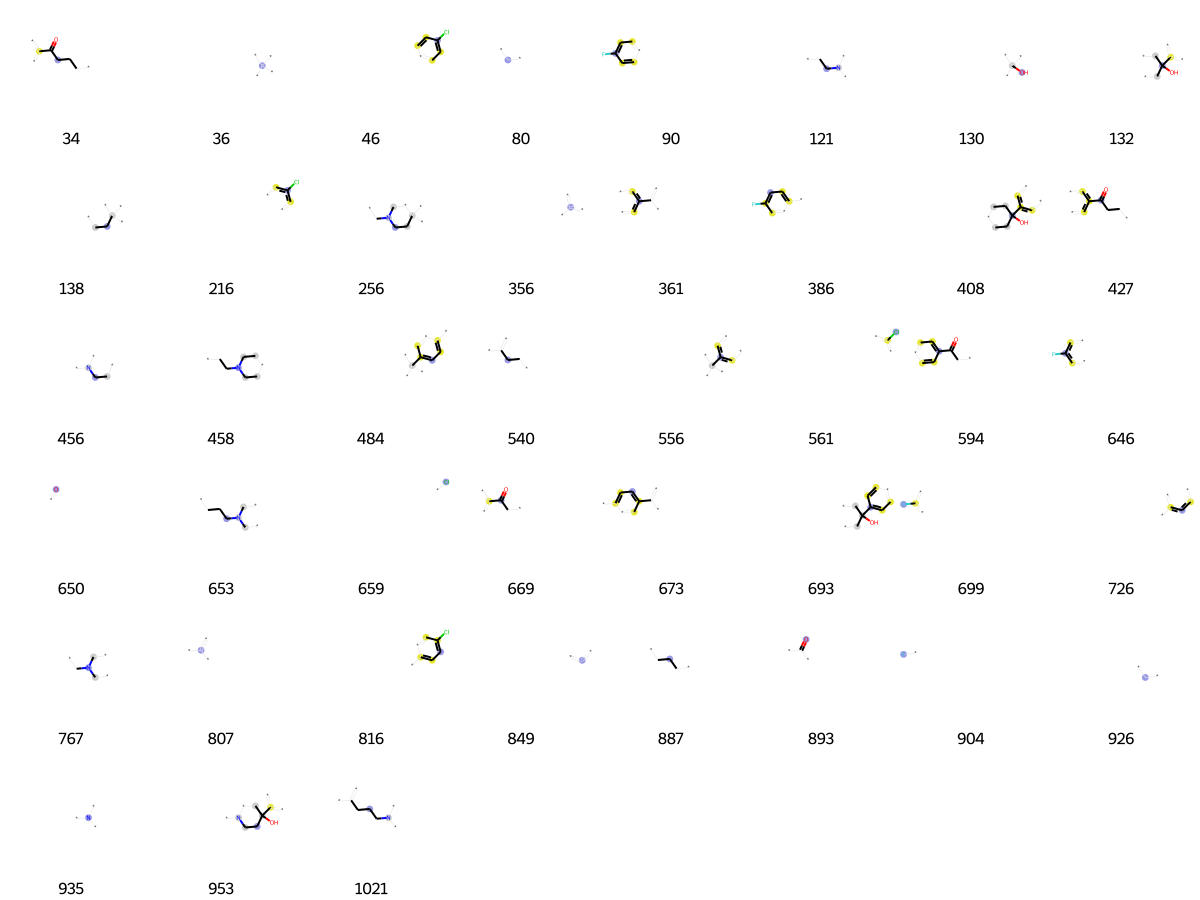

In [4667]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [4668]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33, 80, 256, 319, 378, 389, 414, 522, 562, 628, 650, 713, 807, 893]

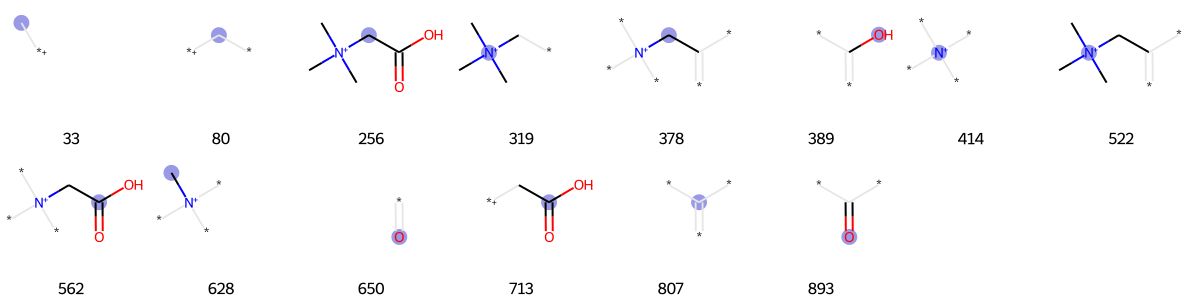

In [4669]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [4670]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[13,
 33,
 62,
 80,
 101,
 116,
 128,
 140,
 158,
 160,
 216,
 222,
 233,
 254,
 255,
 256,
 258,
 268,
 294,
 341,
 345,
 356,
 363,
 378,
 379,
 405,
 414,
 433,
 455,
 458,
 463,
 473,
 509,
 515,
 531,
 549,
 565,
 584,
 627,
 655,
 665,
 672,
 695,
 699,
 700,
 708,
 726,
 727,
 759,
 779,
 784,
 794,
 798,
 807,
 811,
 816,
 823,
 831,
 849,
 862,
 875,
 891,
 904,
 919,
 926,
 935,
 960,
 964,
 1001,
 1019]

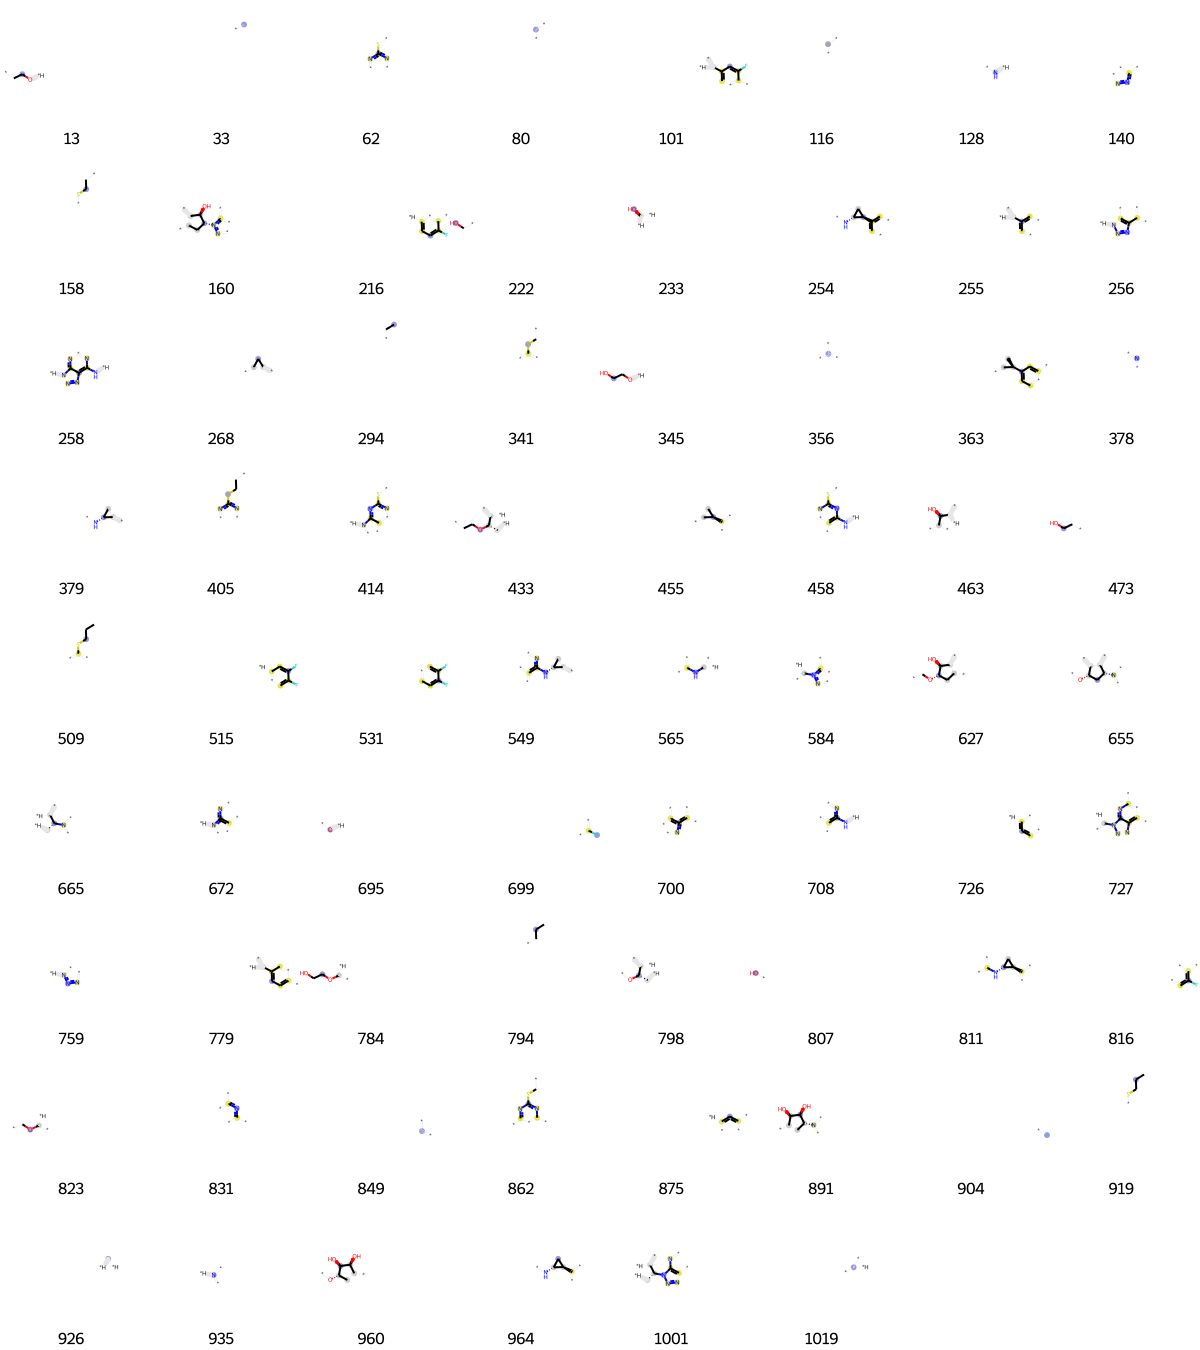

In [4671]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [4672]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[3,
 40,
 43,
 64,
 73,
 90,
 136,
 175,
 194,
 207,
 233,
 247,
 257,
 284,
 289,
 305,
 333,
 352,
 356,
 378,
 381,
 407,
 409,
 428,
 456,
 463,
 464,
 487,
 492,
 511,
 549,
 613,
 629,
 672,
 687,
 711,
 716,
 726,
 787,
 801,
 804,
 842,
 849,
 896,
 905,
 926,
 927,
 935,
 940,
 996]

In [4673]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[4,
 33,
 64,
 70,
 80,
 90,
 111,
 114,
 128,
 175,
 197,
 200,
 246,
 270,
 289,
 293,
 319,
 322,
 339,
 350,
 356,
 389,
 390,
 392,
 416,
 422,
 423,
 452,
 486,
 502,
 524,
 650,
 672,
 684,
 695,
 705,
 713,
 715,
 718,
 726,
 766,
 807,
 849,
 863,
 883,
 893,
 967]

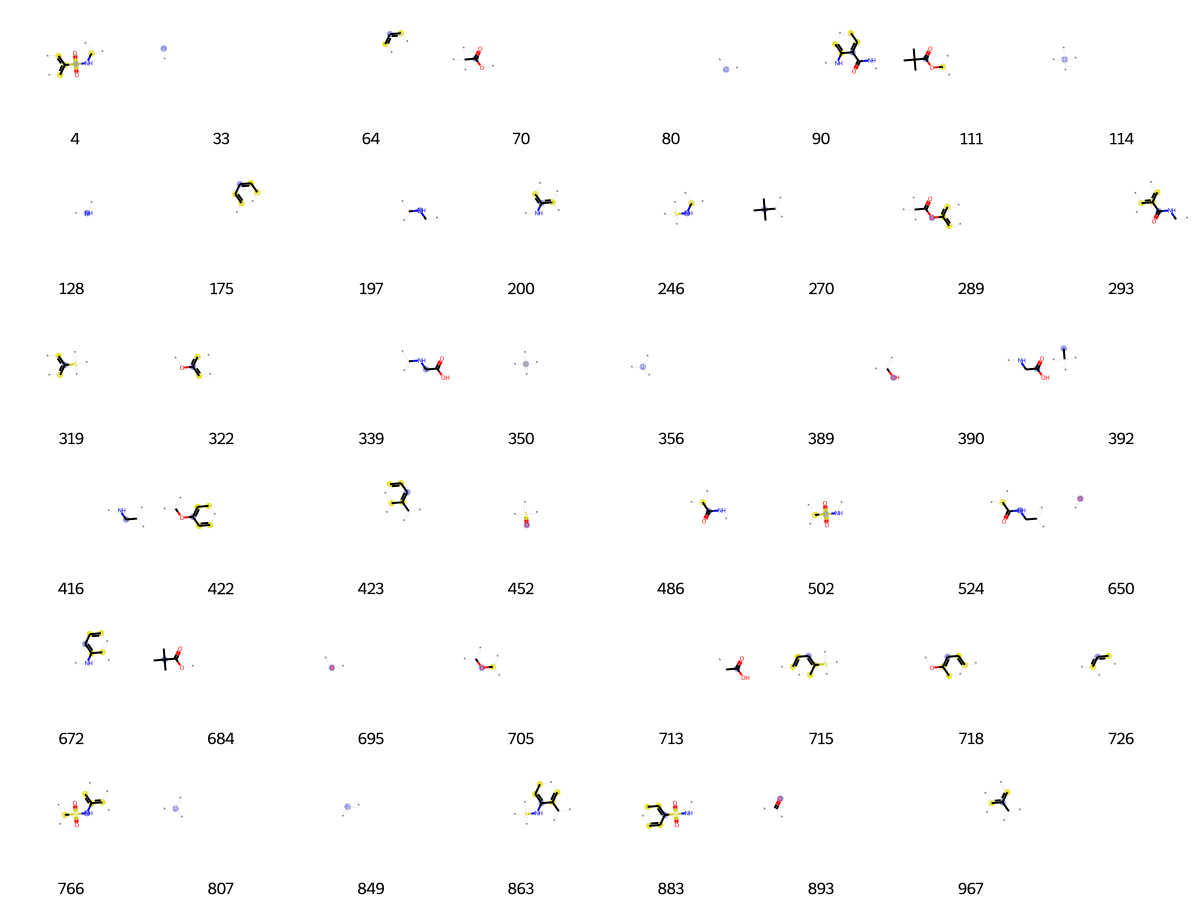

In [4674]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [4675]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 80,
 147,
 227,
 315,
 338,
 341,
 356,
 378,
 410,
 451,
 578,
 583,
 589,
 726,
 760,
 780,
 807,
 829,
 849,
 875,
 885,
 981]

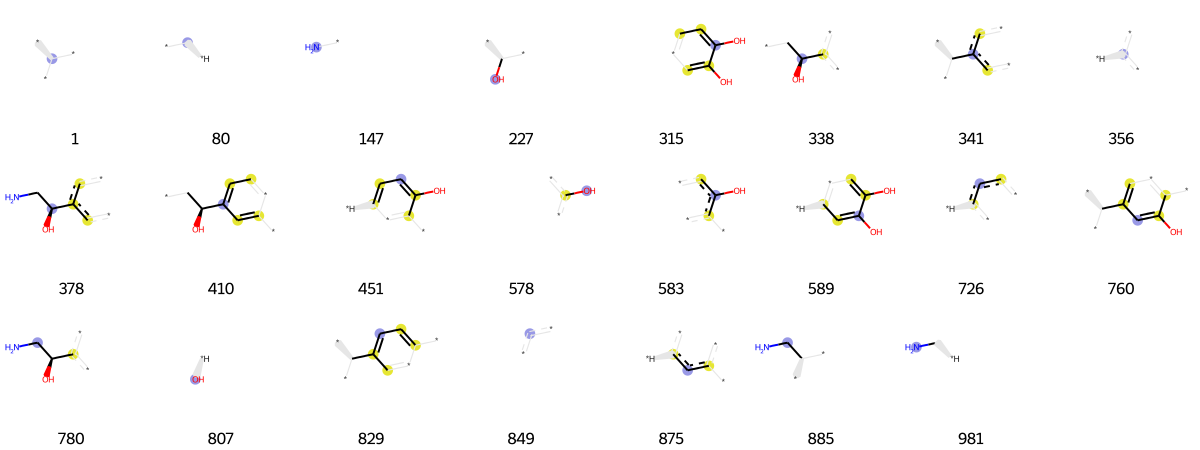

In [4676]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [4677]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 33,
 69,
 80,
 118,
 119,
 125,
 147,
 194,
 243,
 294,
 362,
 375,
 417,
 420,
 540,
 591,
 595,
 650,
 677,
 695,
 729,
 794,
 807,
 887,
 893,
 991]

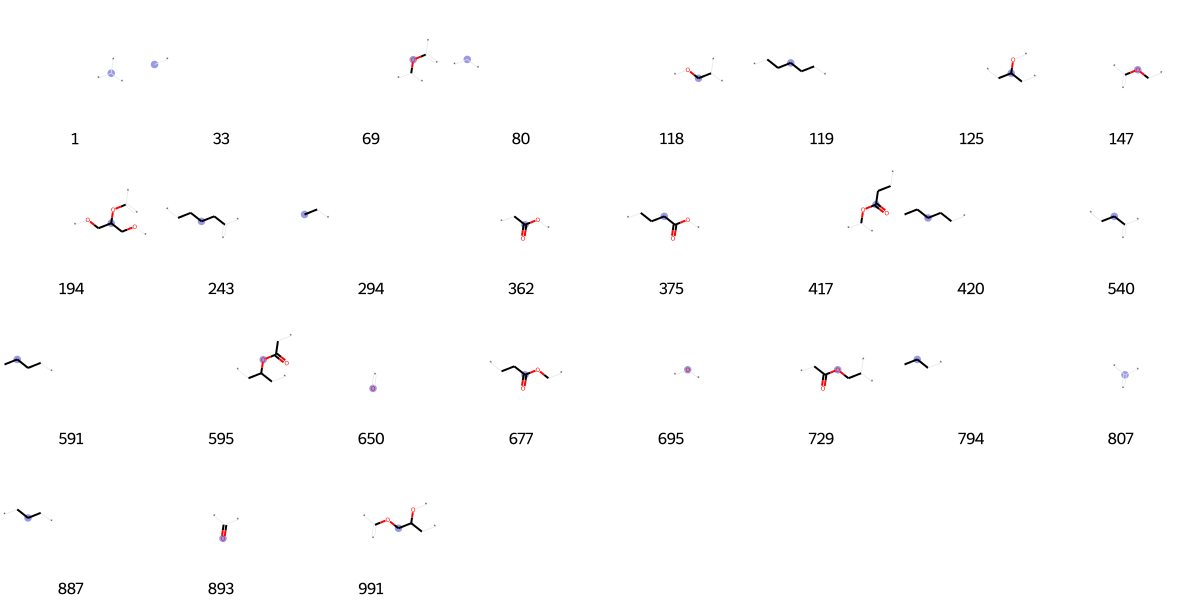

In [4678]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [4679]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 2,
 4,
 27,
 43,
 65,
 80,
 87,
 90,
 128,
 136,
 137,
 147,
 232,
 276,
 301,
 323,
 324,
 333,
 335,
 339,
 356,
 360,
 378,
 428,
 464,
 479,
 482,
 489,
 511,
 610,
 674,
 682,
 711,
 715,
 726,
 741,
 786,
 790,
 806,
 808,
 849,
 852,
 873,
 890,
 926,
 935,
 944,
 954,
 1019]

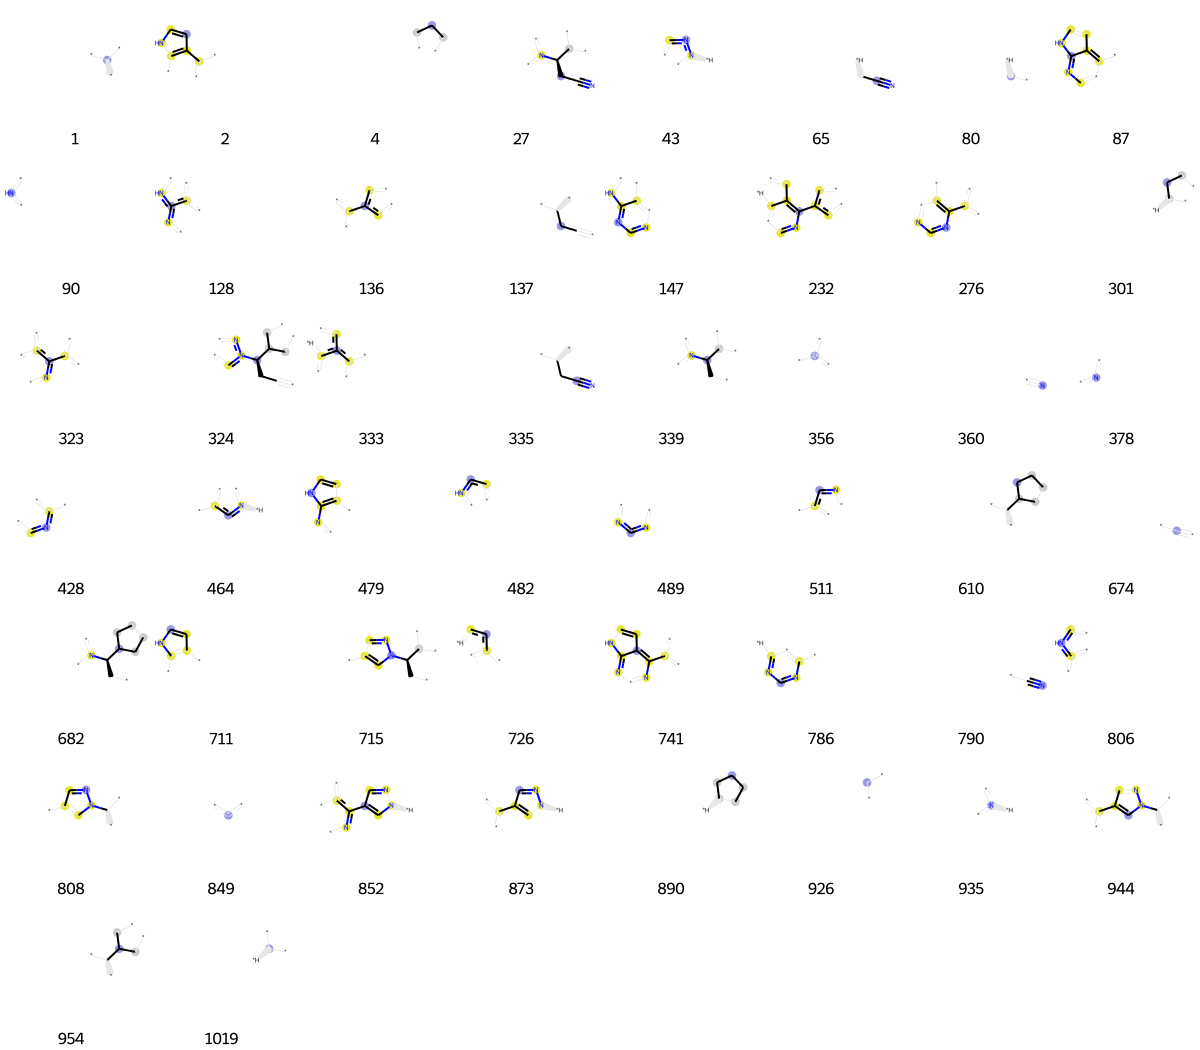

In [4680]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [4681]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[3,
 7,
 10,
 28,
 33,
 36,
 38,
 59,
 64,
 80,
 90,
 114,
 128,
 142,
 166,
 175,
 197,
 273,
 292,
 314,
 320,
 326,
 348,
 352,
 356,
 371,
 387,
 392,
 396,
 429,
 446,
 472,
 585,
 650,
 651,
 660,
 726,
 807,
 849,
 856,
 867,
 886,
 893,
 904,
 958,
 984,
 1001,
 1009,
 1019]

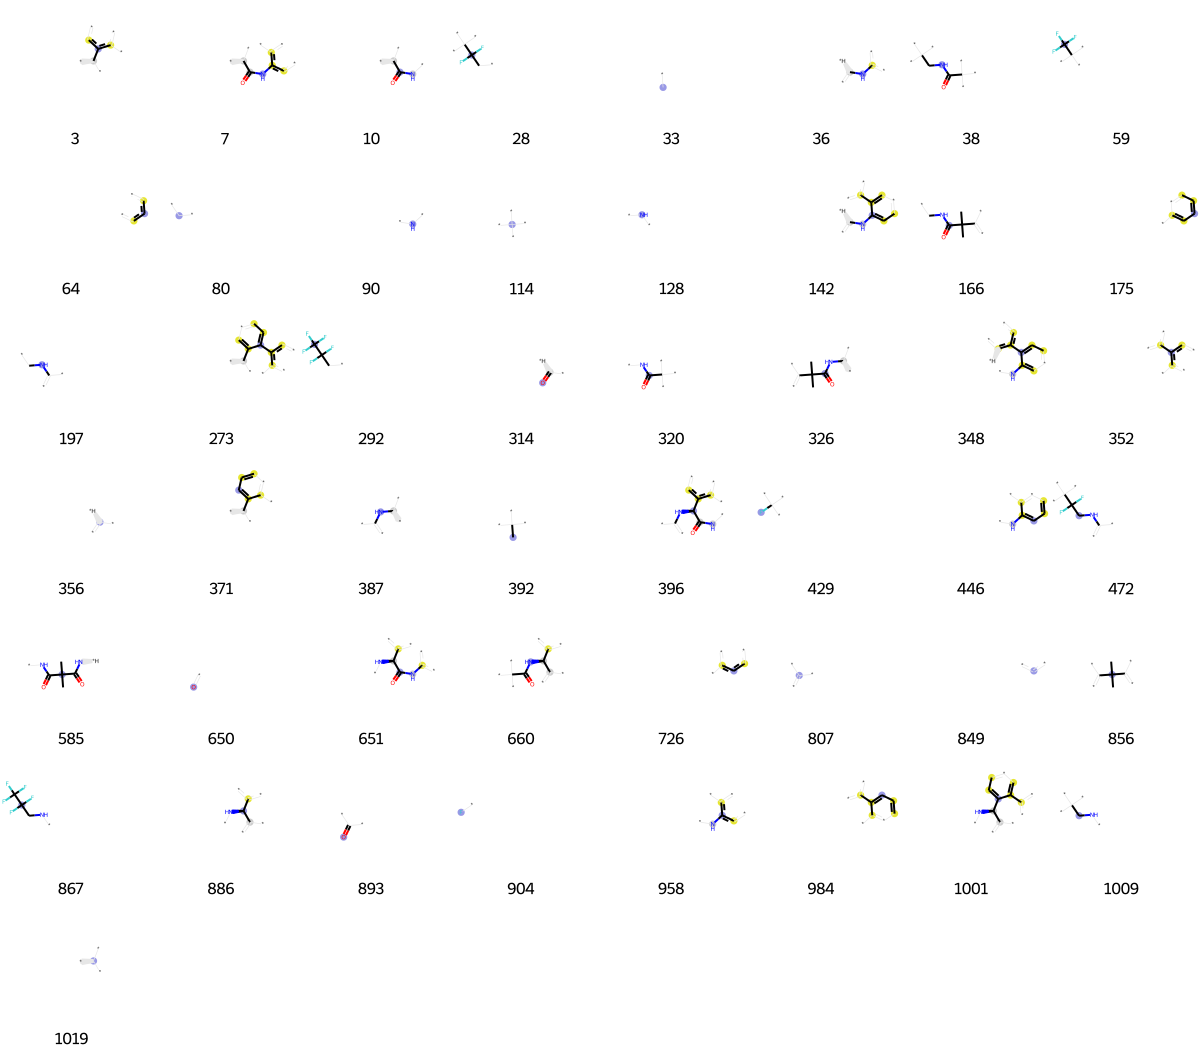

In [4682]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [4683]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[64,
 80,
 143,
 148,
 175,
 191,
 226,
 252,
 271,
 301,
 356,
 385,
 397,
 449,
 456,
 497,
 549,
 561,
 585,
 588,
 623,
 675,
 726,
 729,
 739,
 849,
 893,
 908,
 917,
 926,
 935,
 949,
 1019,
 1020]

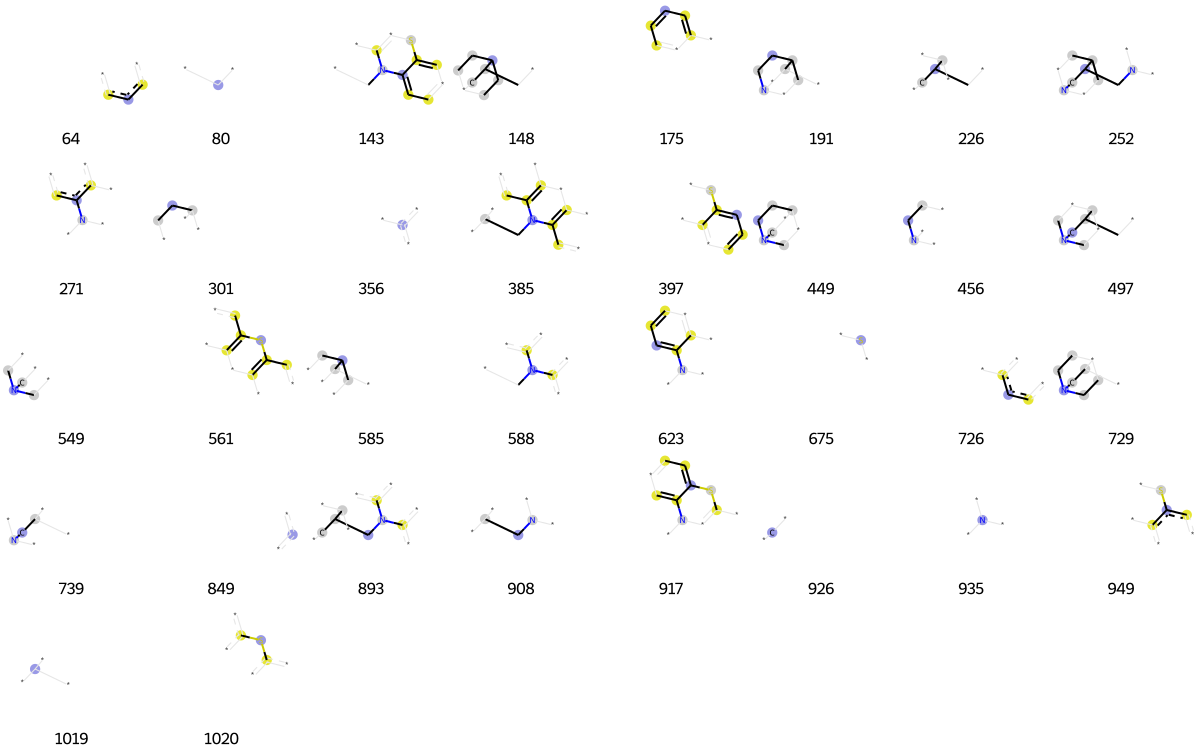

In [4684]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [4685]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[15,
 33,
 52,
 53,
 56,
 64,
 122,
 128,
 184,
 191,
 260,
 356,
 367,
 378,
 381,
 383,
 461,
 579,
 650,
 698,
 726,
 792,
 807,
 842,
 849,
 893,
 965,
 966,
 975]

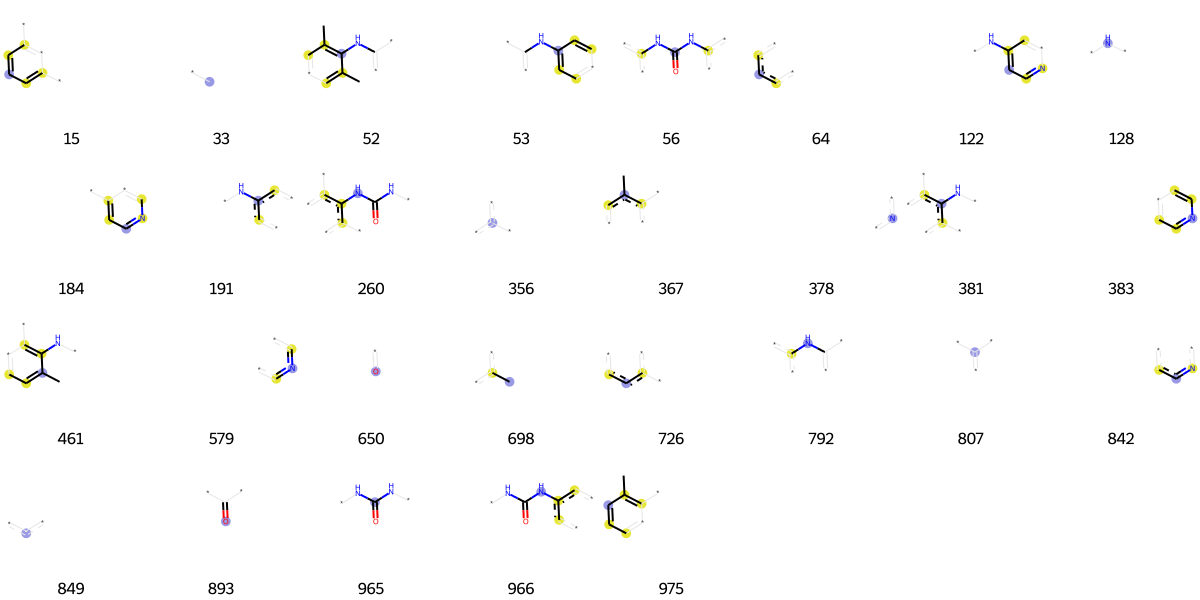

In [4686]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [4687]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[13,
 33,
 44,
 51,
 59,
 64,
 66,
 79,
 80,
 102,
 116,
 120,
 147,
 168,
 175,
 192,
 256,
 284,
 295,
 315,
 325,
 351,
 356,
 361,
 378,
 389,
 391,
 428,
 433,
 435,
 486,
 507,
 511,
 525,
 540,
 612,
 650,
 692,
 694,
 695,
 698,
 726,
 762,
 795,
 804,
 807,
 814,
 823,
 831,
 840,
 849,
 881,
 893,
 926,
 949,
 961,
 965,
 1002,
 1004,
 1017]

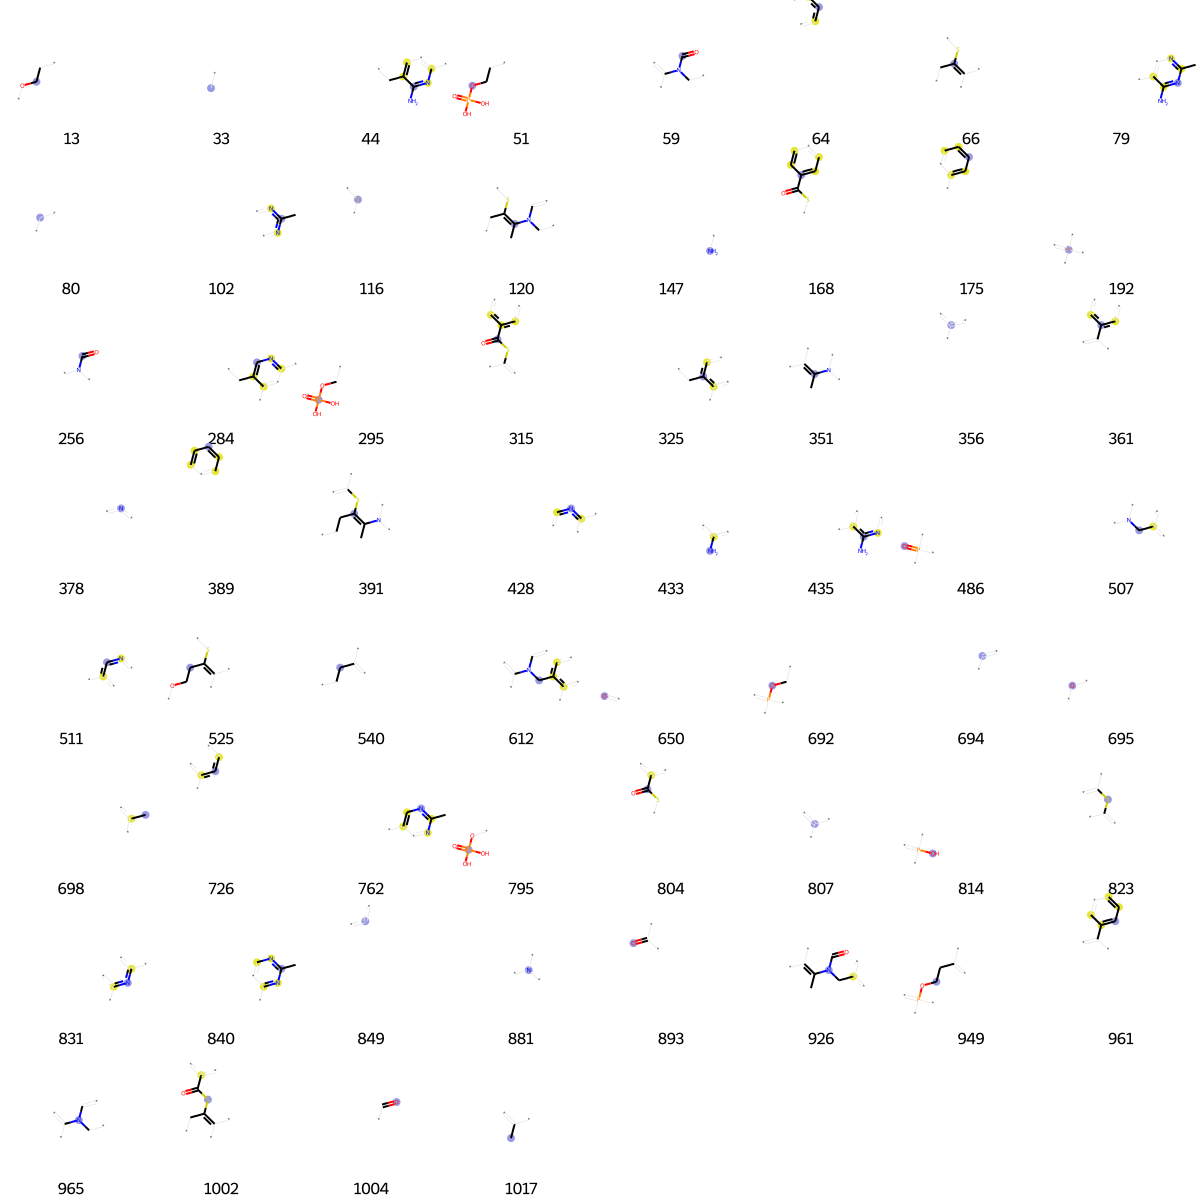

In [4688]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [4689]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[2,
 4,
 47,
 73,
 356,
 361,
 369,
 377,
 378,
 421,
 428,
 456,
 480,
 497,
 613,
 618,
 639,
 650,
 673,
 726,
 807,
 842,
 849,
 875,
 893,
 926,
 935,
 942,
 961,
 974,
 985]

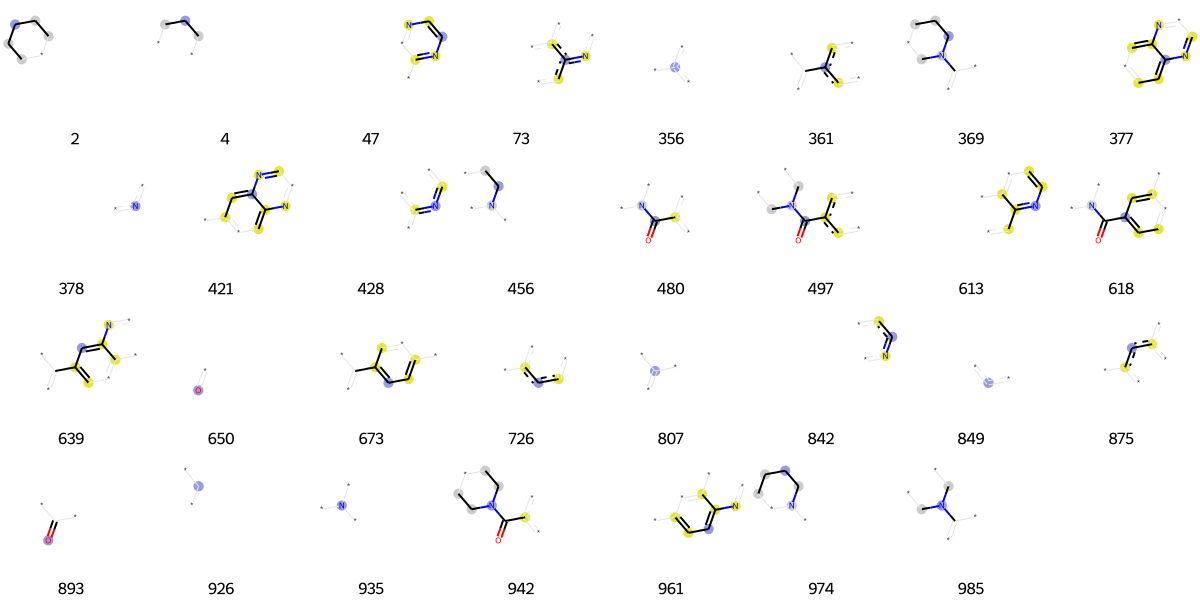

In [4690]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [4691]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[4,
 31,
 33,
 36,
 55,
 92,
 138,
 144,
 173,
 250,
 259,
 264,
 295,
 325,
 356,
 390,
 432,
 444,
 500,
 552,
 602,
 618,
 642,
 650,
 694,
 698,
 714,
 718,
 803,
 807,
 835,
 926,
 932,
 933,
 953,
 1004,
 1017]

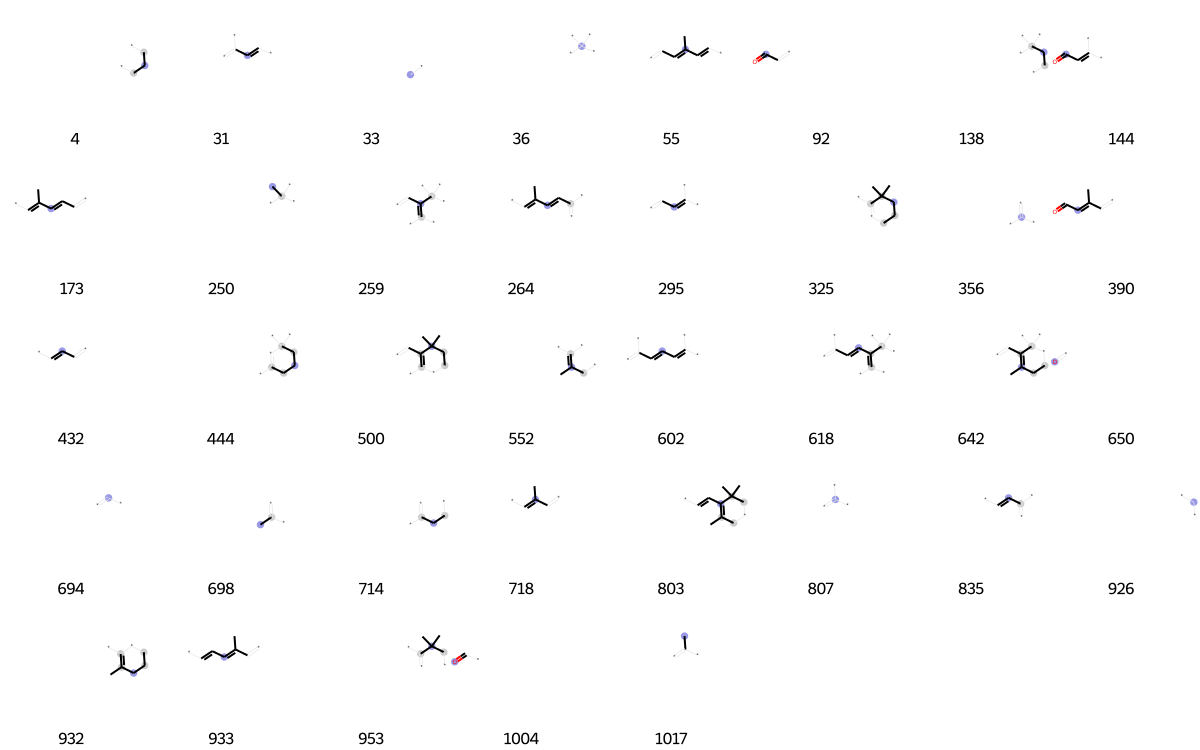

In [4692]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [4693]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[40,
 86,
 94,
 154,
 165,
 185,
 216,
 307,
 356,
 366,
 561,
 576,
 578,
 583,
 593,
 659,
 695,
 726,
 807,
 816,
 849,
 875,
 946,
 992]

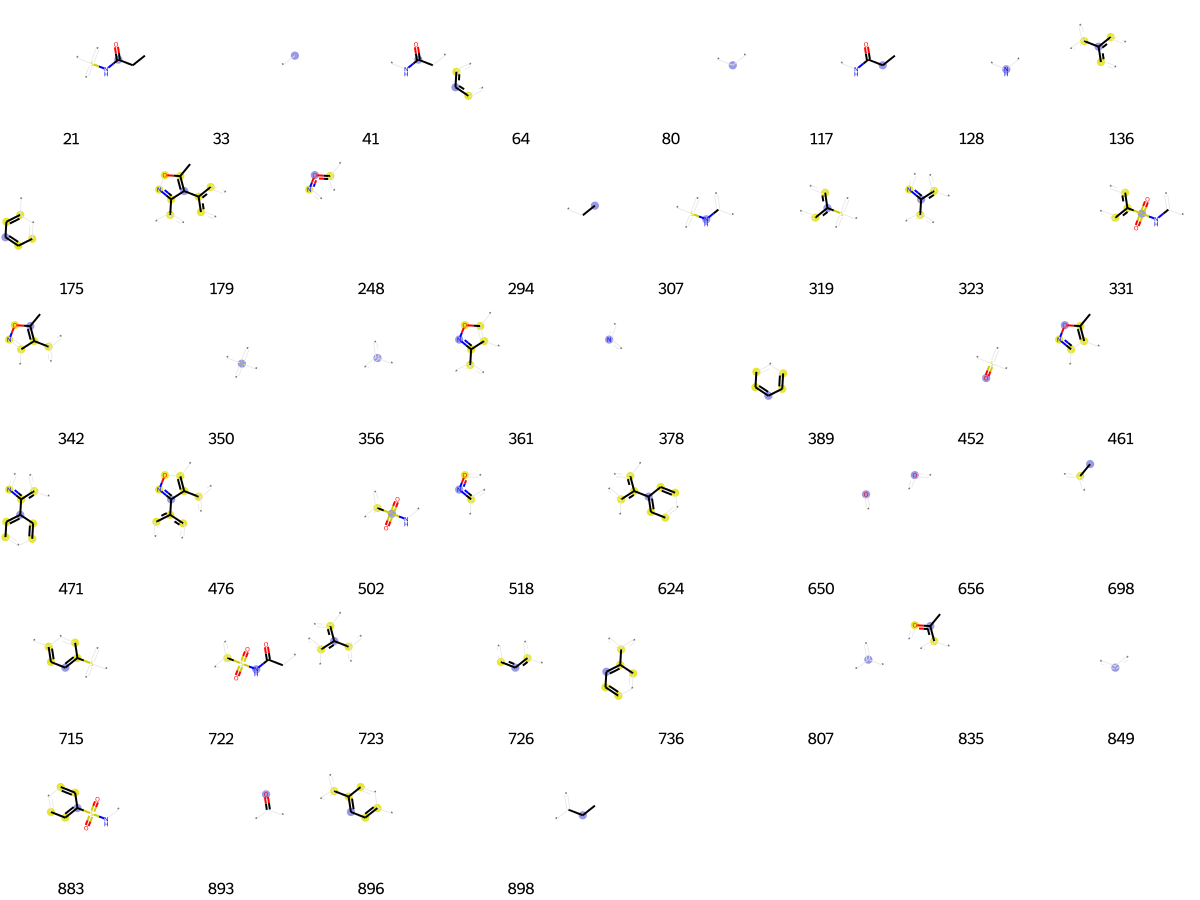

In [4694]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [4695]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 80,
 89,
 160,
 188,
 193,
 204,
 209,
 219,
 259,
 294,
 301,
 311,
 342,
 356,
 420,
 486,
 521,
 570,
 578,
 583,
 591,
 624,
 698,
 713,
 714,
 730,
 794,
 807,
 835,
 849,
 875,
 887,
 918,
 926,
 955,
 978,
 1007,
 1017,
 1019,
 1022]

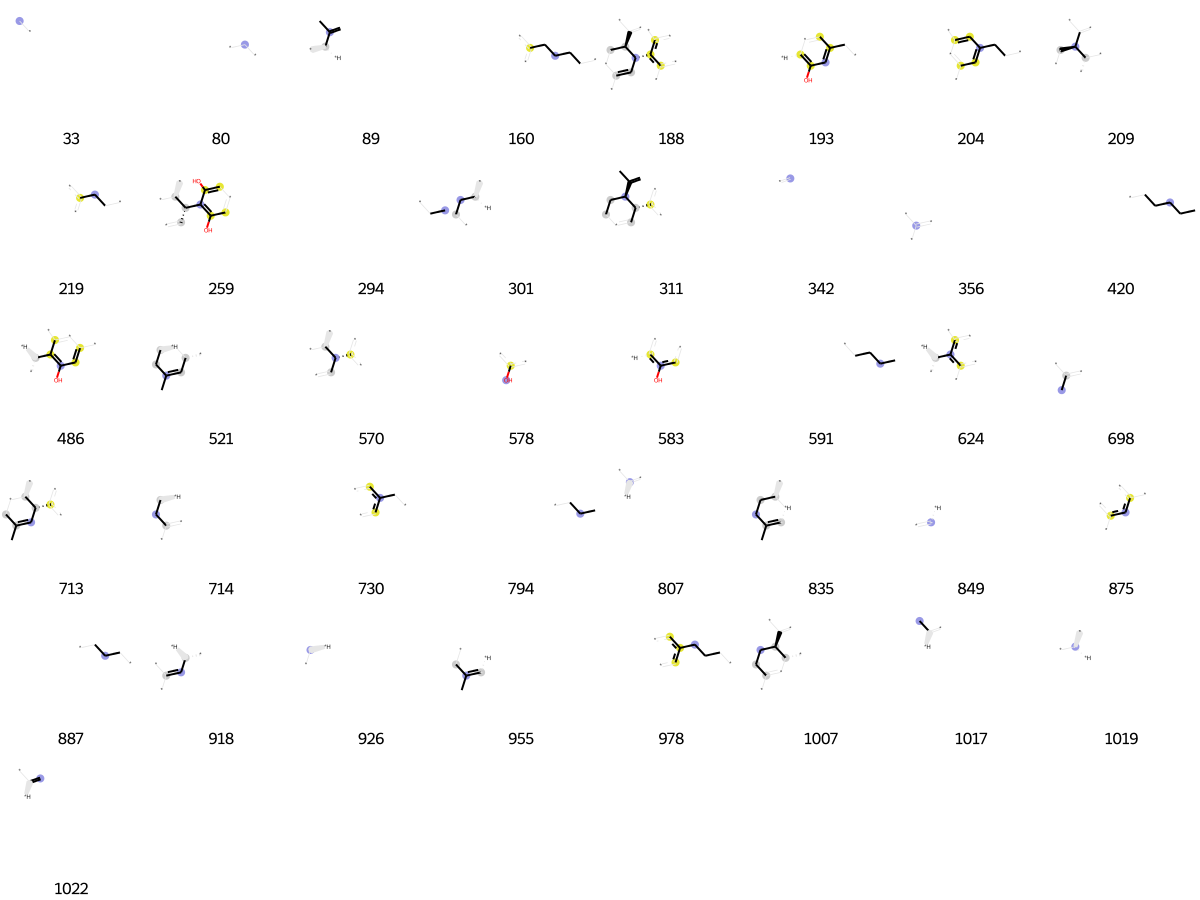

In [4696]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [4697]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[45,
 48,
 64,
 80,
 151,
 158,
 165,
 175,
 185,
 216,
 261,
 325,
 333,
 356,
 366,
 378,
 389,
 456,
 490,
 549,
 561,
 592,
 603,
 650,
 659,
 717,
 726,
 741,
 807,
 816,
 849,
 850,
 875,
 893,
 932,
 935,
 965,
 966,
 979,
 1016]

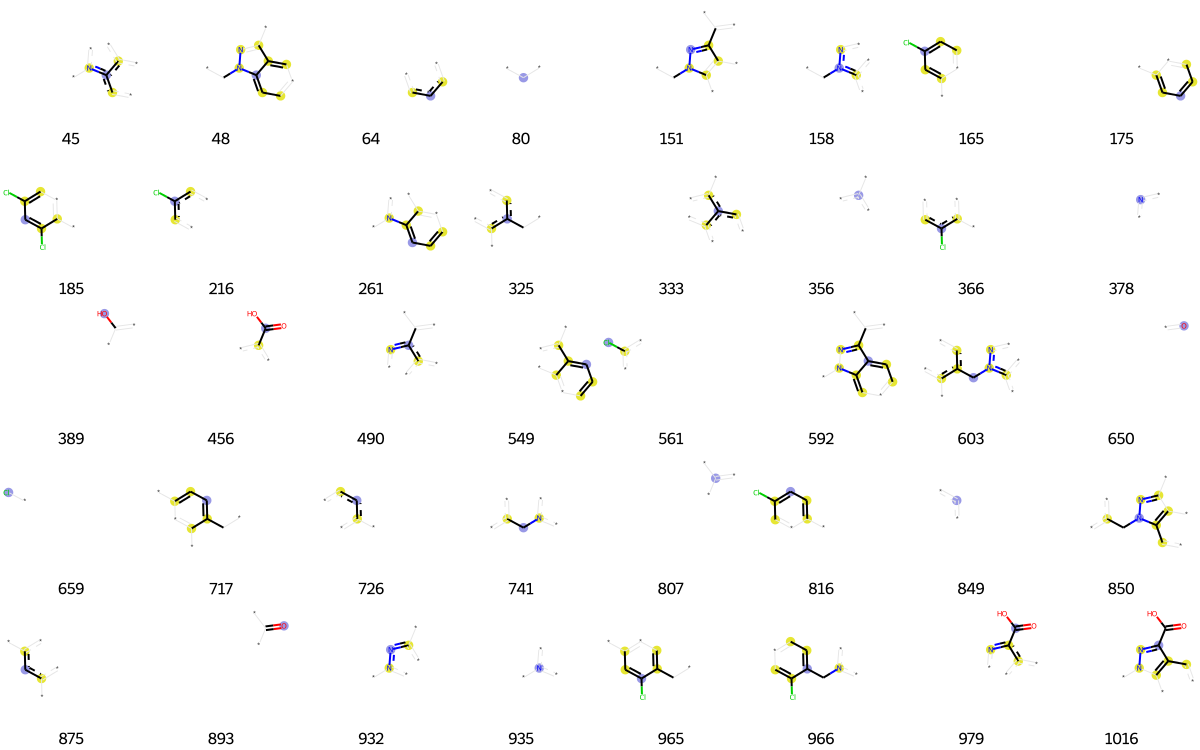

In [4698]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [4699]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 108,
 147,
 289,
 341,
 356,
 389,
 578,
 607,
 650,
 709,
 726,
 745,
 754,
 786,
 807,
 820,
 829,
 849,
 893,
 1022]

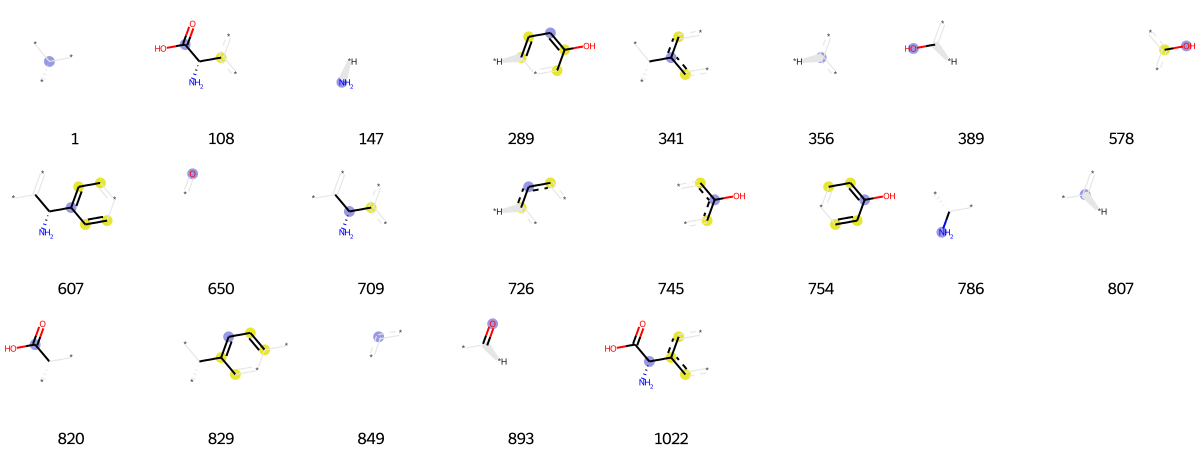

In [4700]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [4701]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[3,
 33,
 36,
 40,
 105,
 118,
 138,
 212,
 233,
 249,
 250,
 289,
 301,
 356,
 408,
 453,
 455,
 512,
 519,
 562,
 578,
 583,
 614,
 622,
 636,
 695,
 713,
 714,
 728,
 735,
 760,
 769,
 807,
 823,
 826,
 841,
 849,
 875,
 887,
 917,
 926,
 927,
 946,
 1019]

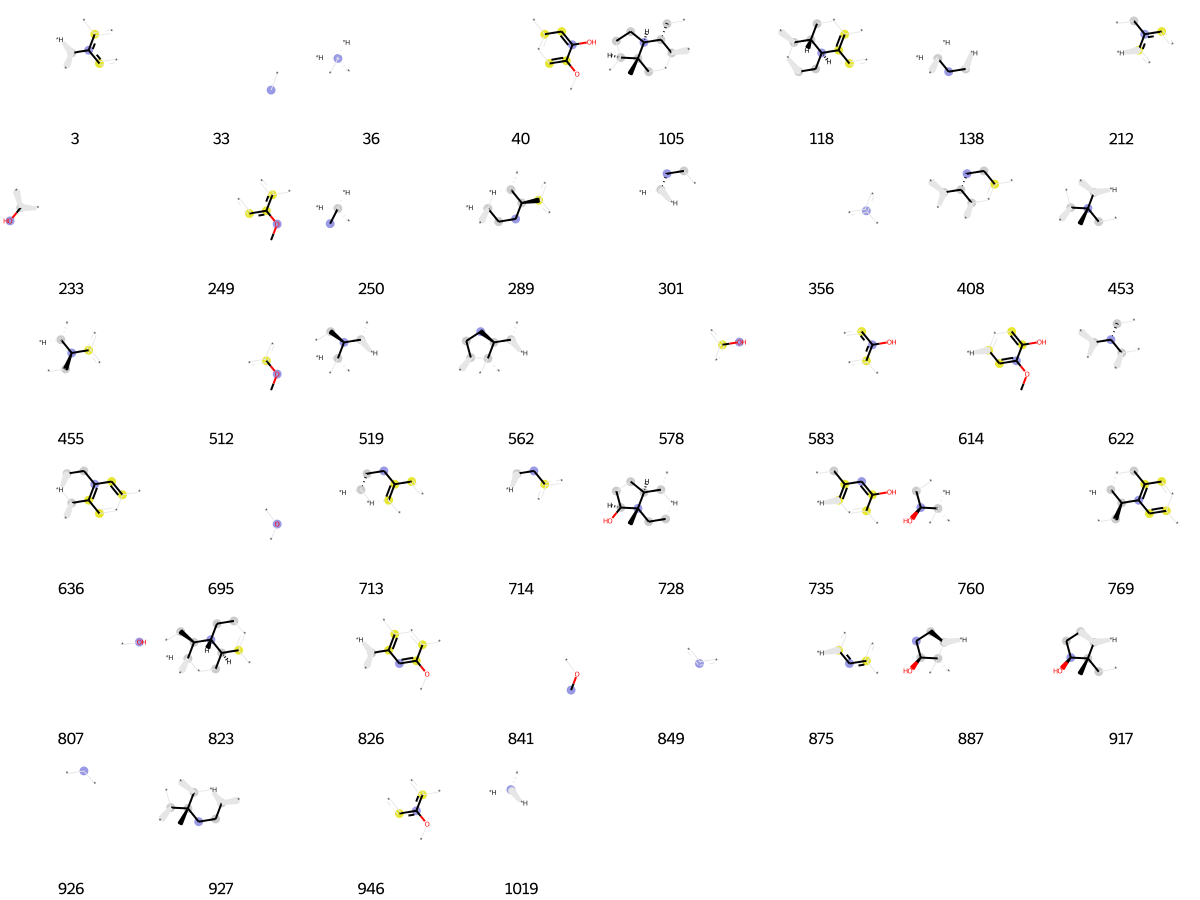

In [4702]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [4703]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[11,
 64,
 80,
 92,
 97,
 104,
 110,
 128,
 130,
 133,
 149,
 164,
 175,
 197,
 255,
 310,
 325,
 333,
 351,
 356,
 368,
 369,
 378,
 407,
 428,
 441,
 448,
 452,
 456,
 484,
 489,
 490,
 549,
 565,
 580,
 618,
 623,
 643,
 656,
 700,
 726,
 730,
 738,
 755,
 764,
 776,
 782,
 784,
 785,
 786,
 807,
 839,
 849,
 875,
 881,
 926,
 935,
 985]

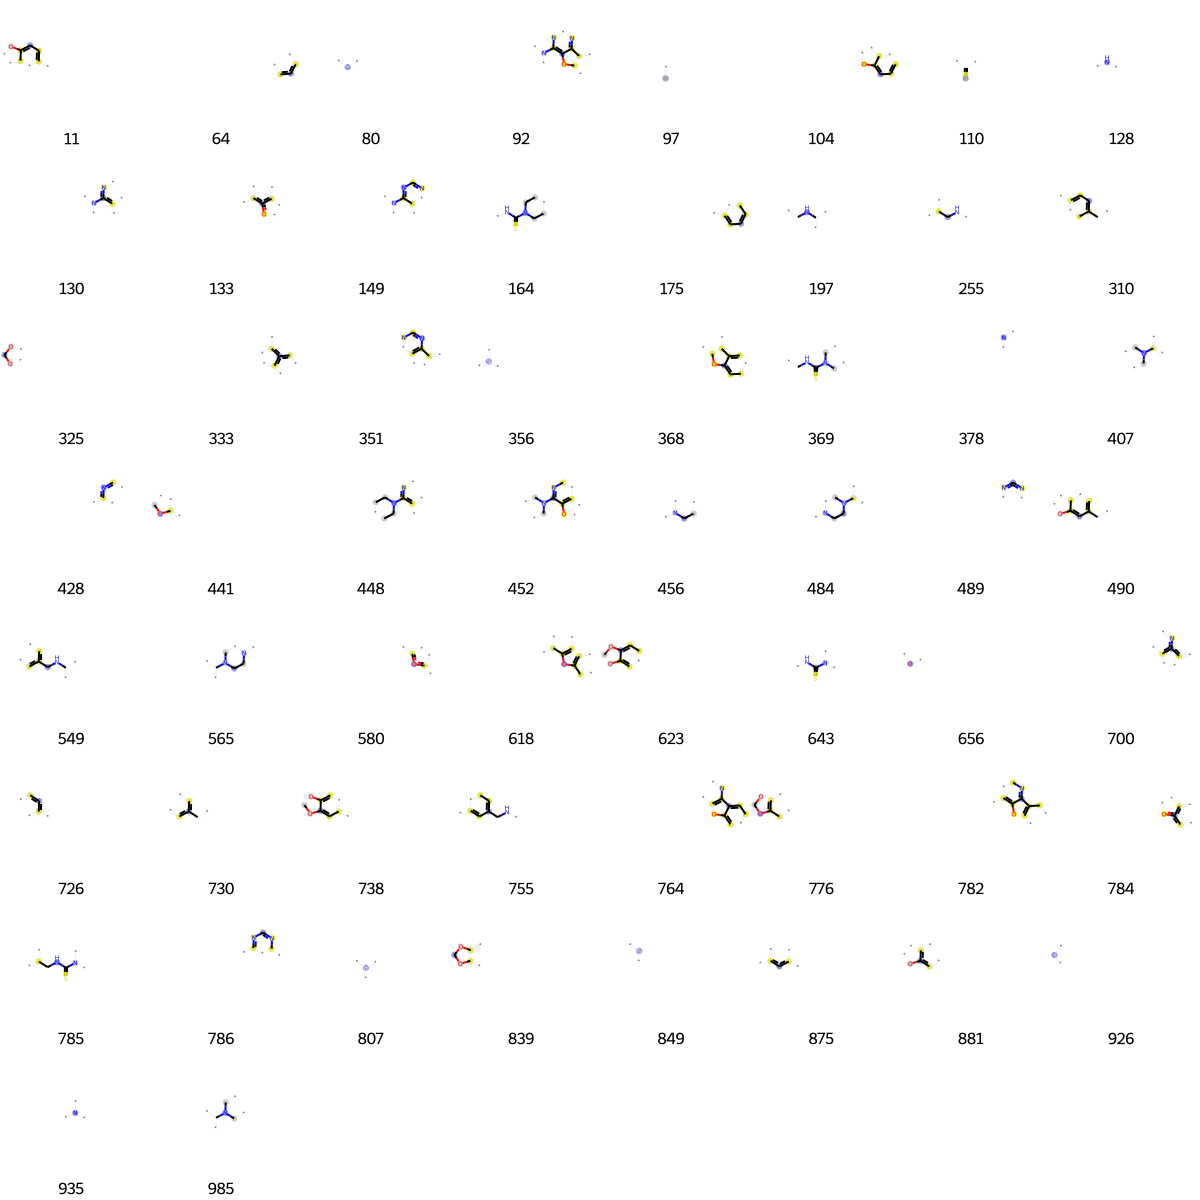

In [4704]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [4705]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[4,
 33,
 41,
 61,
 65,
 80,
 99,
 114,
 128,
 158,
 163,
 191,
 236,
 252,
 260,
 276,
 280,
 288,
 304,
 310,
 314,
 356,
 361,
 367,
 378,
 381,
 456,
 478,
 552,
 580,
 624,
 650,
 656,
 687,
 698,
 707,
 714,
 792,
 796,
 798,
 807,
 831,
 835,
 893,
 924,
 926,
 935,
 960,
 1020]

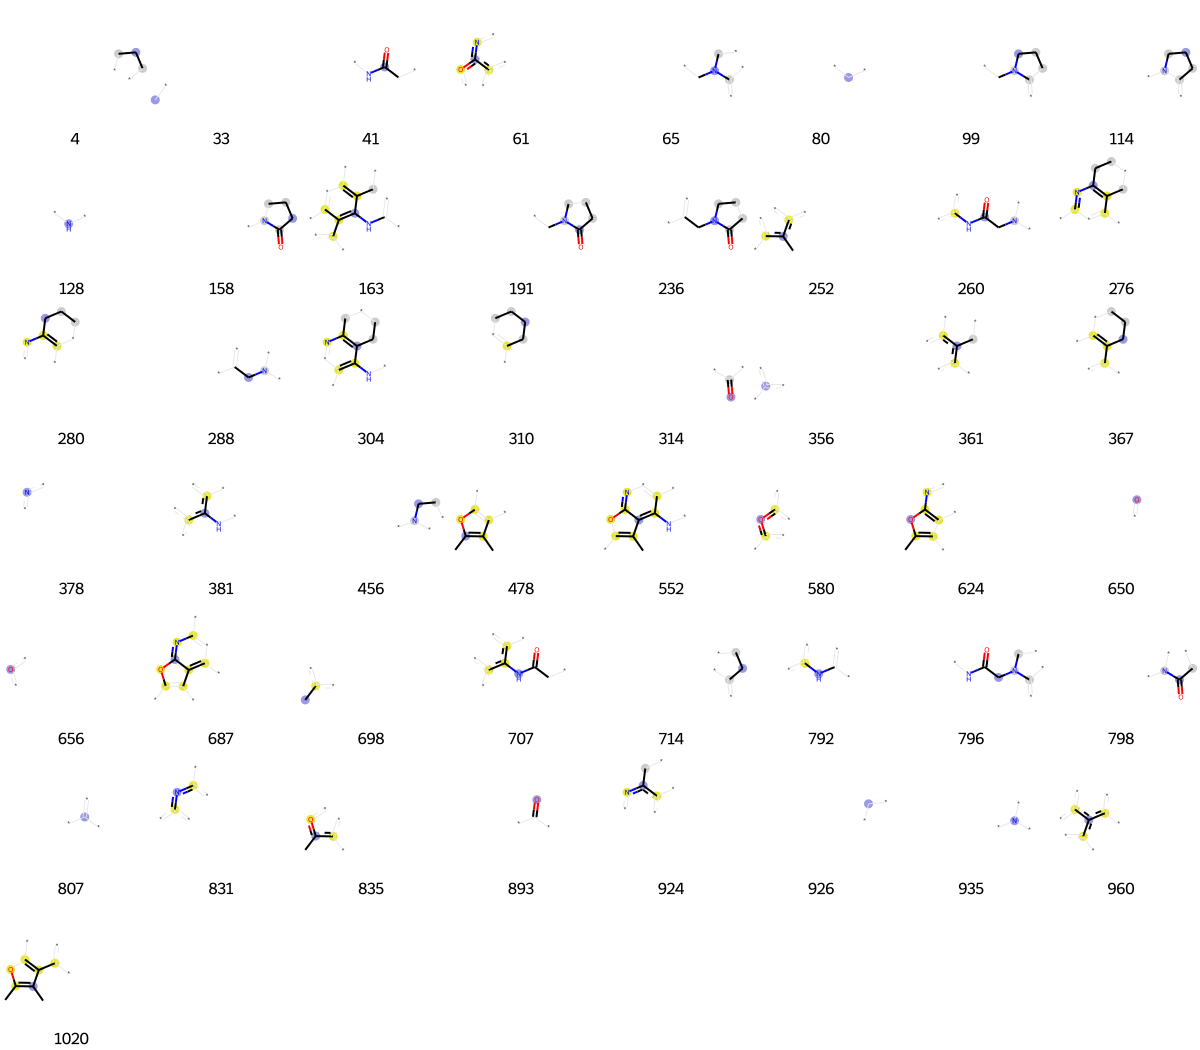

In [4706]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [4707]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[15,
 19,
 33,
 41,
 56,
 60,
 64,
 74,
 80,
 121,
 128,
 191,
 195,
 200,
 325,
 335,
 356,
 378,
 386,
 421,
 428,
 456,
 509,
 511,
 565,
 573,
 576,
 650,
 672,
 689,
 695,
 698,
 699,
 707,
 726,
 741,
 767,
 768,
 784,
 792,
 807,
 841,
 843,
 849,
 860,
 893,
 904,
 926,
 935,
 965,
 966,
 985]

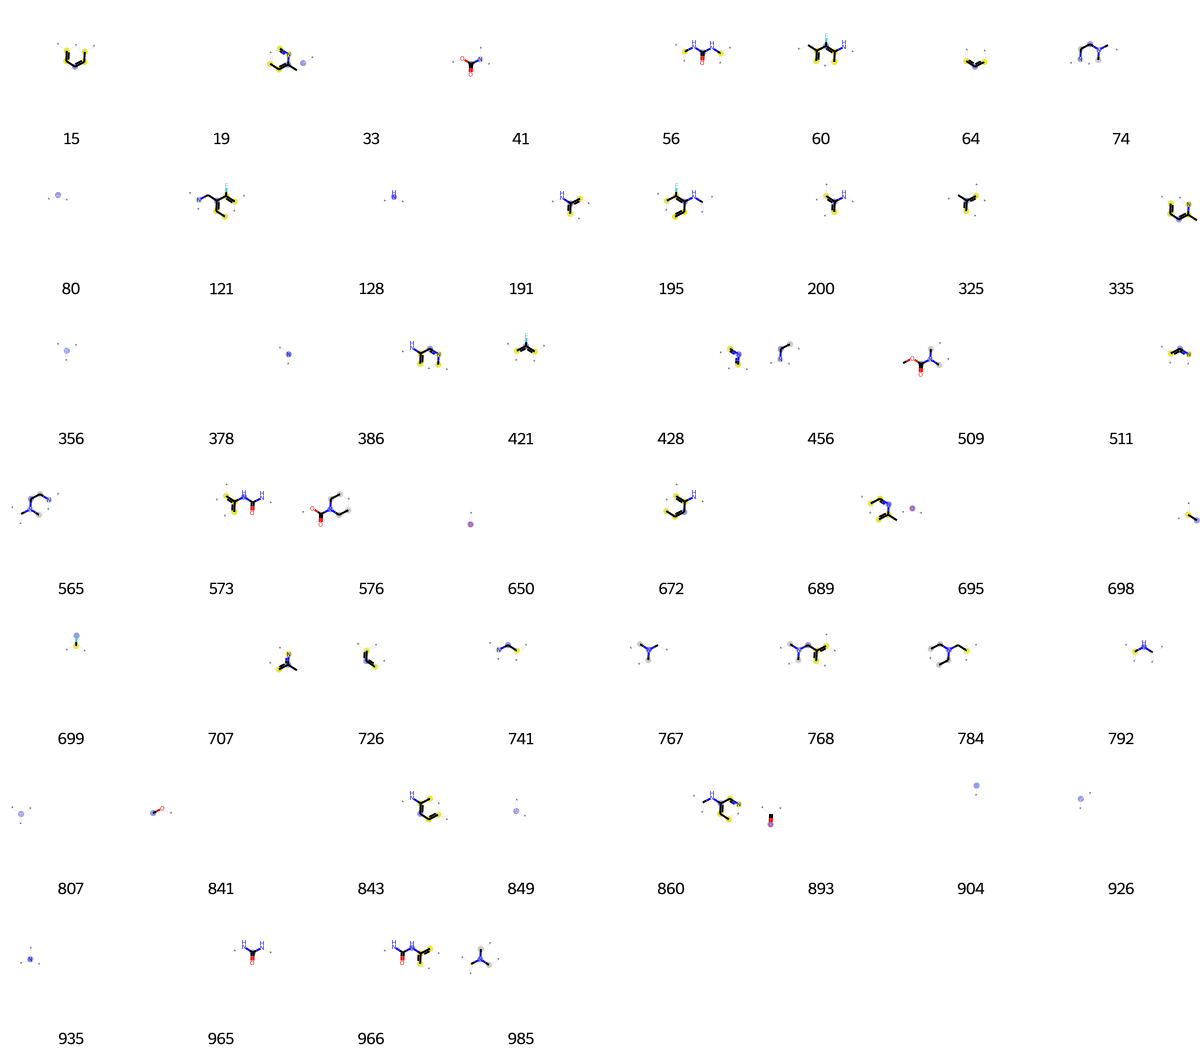

In [4708]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [4709]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[4,
 74,
 103,
 104,
 234,
 241,
 263,
 276,
 301,
 314,
 356,
 446,
 456,
 500,
 514,
 547,
 551,
 585,
 598,
 622,
 649,
 650,
 665,
 684,
 724,
 739,
 816,
 830,
 849,
 908,
 926,
 930,
 935,
 937,
 976,
 1019]

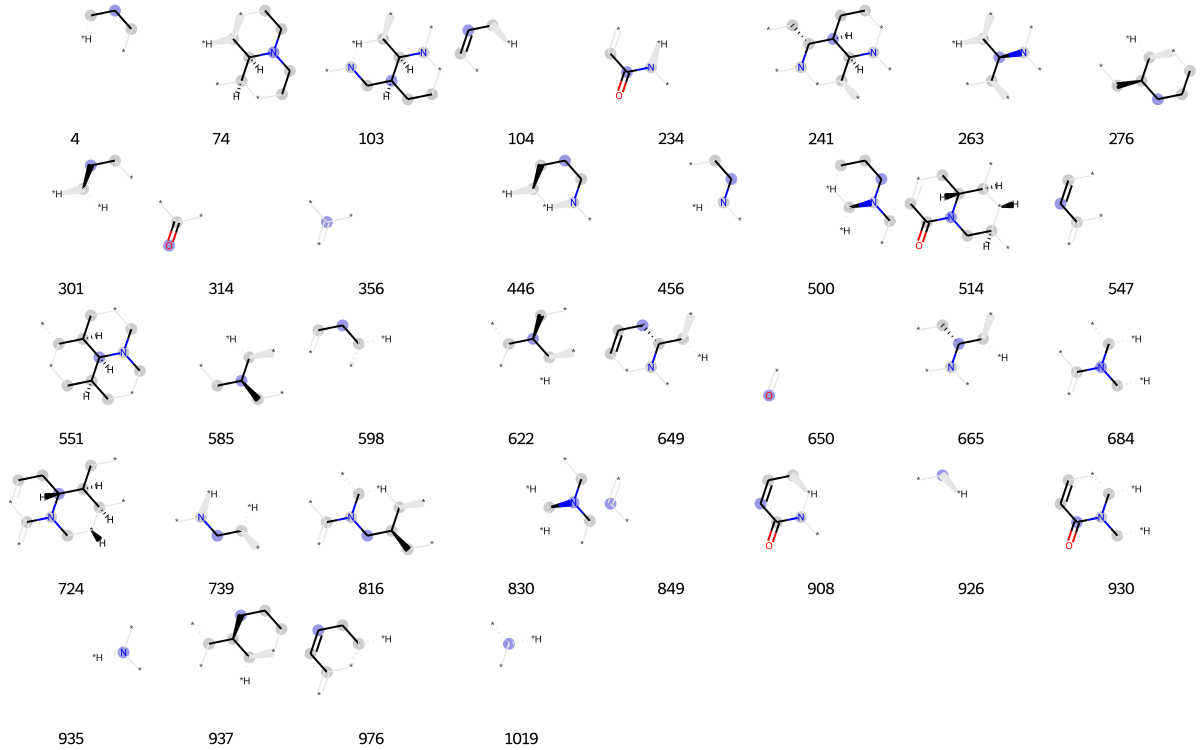

In [4710]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [4711]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 2,
 4,
 33,
 53,
 80,
 89,
 102,
 105,
 114,
 118,
 128,
 191,
 227,
 301,
 322,
 356,
 387,
 392,
 410,
 421,
 428,
 430,
 554,
 603,
 606,
 610,
 631,
 650,
 658,
 695,
 718,
 726,
 792,
 807,
 843,
 849,
 890,
 893,
 926,
 965,
 966,
 1014,
 1018,
 1019]

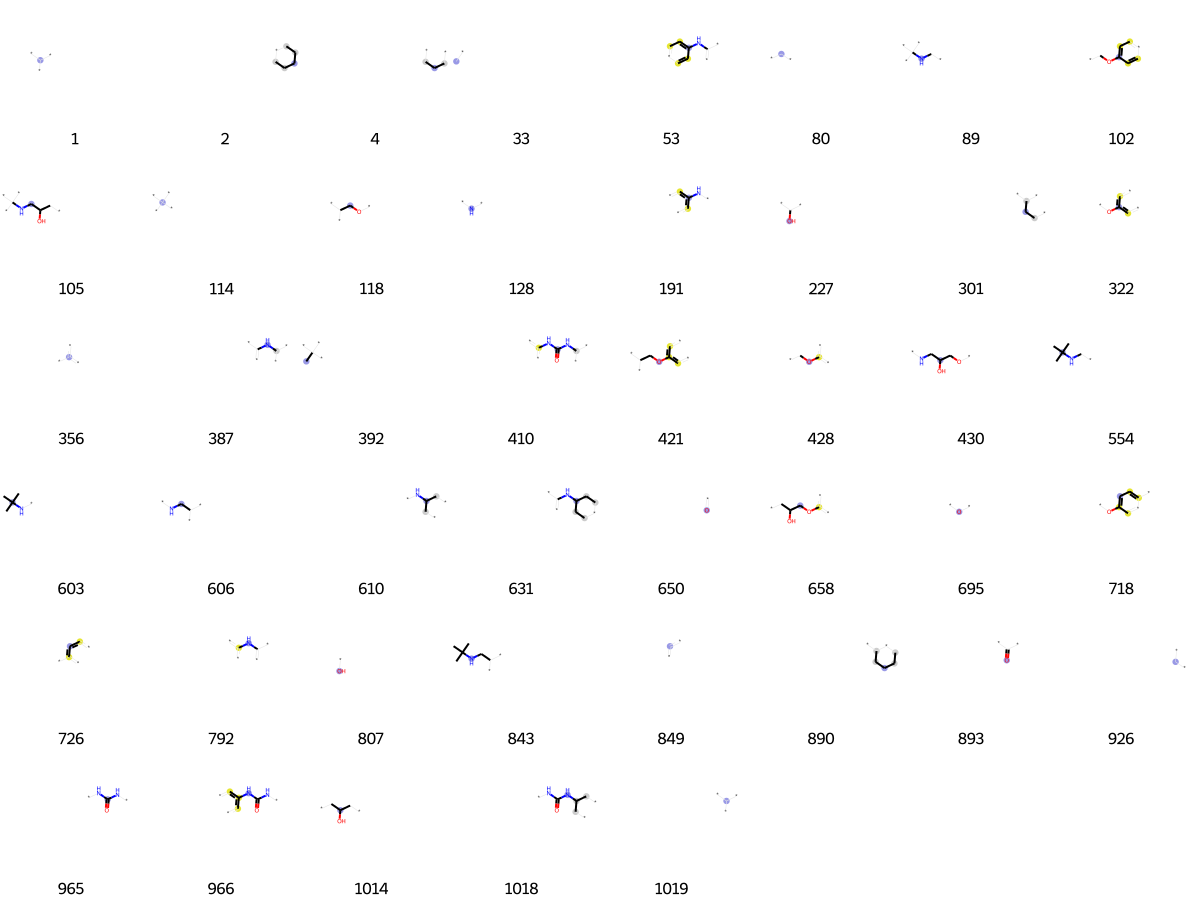

In [4712]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [4713]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[25,
 31,
 33,
 67,
 80,
 99,
 102,
 139,
 163,
 233,
 284,
 322,
 356,
 389,
 416,
 428,
 477,
 479,
 558,
 635,
 643,
 650,
 684,
 694,
 695,
 713,
 718,
 726,
 793,
 807,
 835,
 849,
 875,
 876,
 878,
 893,
 925,
 931,
 946,
 967,
 980,
 1009,
 1017]

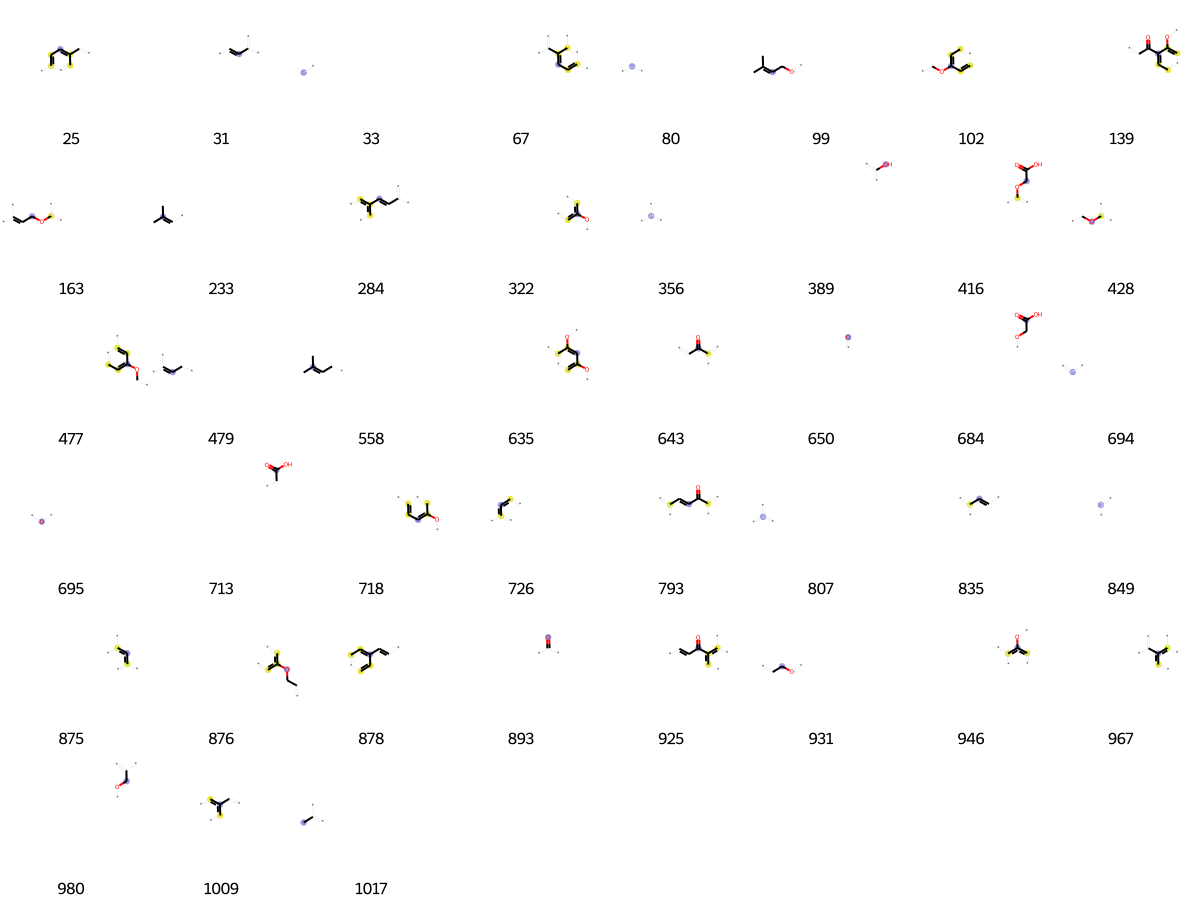

In [4714]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [4715]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[33,
 72,
 73,
 81,
 121,
 128,
 139,
 144,
 147,
 191,
 228,
 267,
 329,
 333,
 350,
 356,
 367,
 371,
 378,
 392,
 400,
 428,
 429,
 452,
 458,
 466,
 491,
 524,
 558,
 562,
 583,
 621,
 650,
 667,
 680,
 691,
 695,
 698,
 709,
 726,
 742,
 787,
 795,
 831,
 833,
 842,
 843,
 849,
 875,
 881,
 894,
 932,
 933,
 935,
 950,
 960]

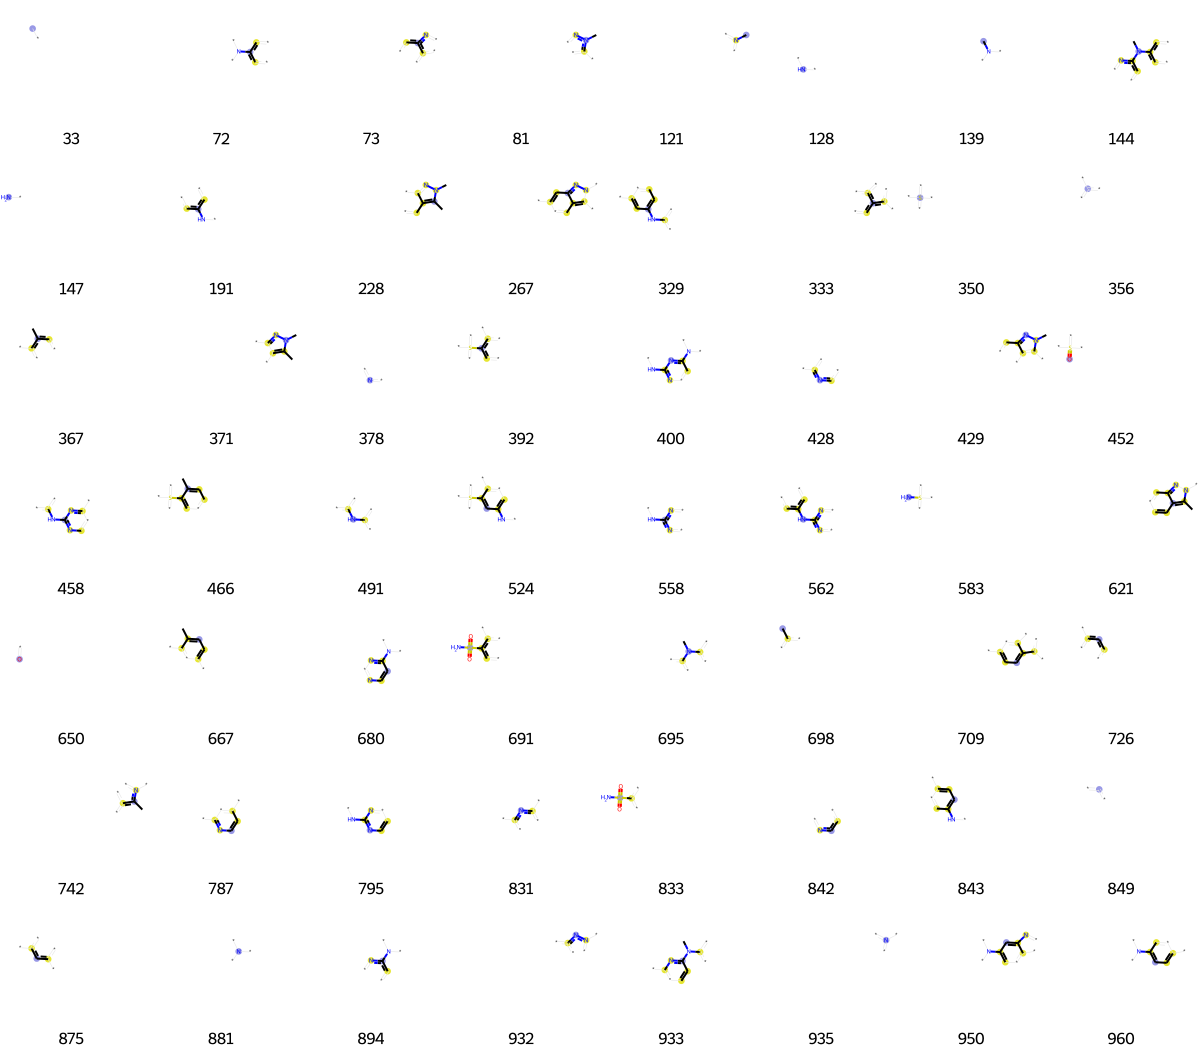

In [4716]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])